## Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import time
from time import time
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')



## Import the dataset

In [2]:
# Load the datasets
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Display the first few rows of the training dataset
train_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   
3         NaN                           NaN  ...                       NaN   
4         NaN          STATE INSURANCE FUND  ...                      16.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   
3                               NaN                        NaN   
4   HAND TOOL, UTENSIL; NOT POWERED                       43.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   
3                               NaN                    NaN   
4                          PUNCTURE                   36.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   
3                           NaN      NaN               NaN               NaN   
4                     FINGER(S)    12603               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  
3                   NaN  
4                   1.0  

[5 rows x 33 columns]

## Data Exploration

In [3]:
# Check for general info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

- The dataset contains 593,471 rows and 33 columns.
- Columns such as C-3 Date, First Hearing Date and IME-4 Count have a high percentage of missing values.
- The OIICS Nature of Injury Description column seems to have no data at all.

In [4]:
# Get descriptive statistics for numerical columns
train_df.describe()

Age at Injury  Average Weekly Wage     Birth Year  Claim Identifier  \
count  574026.000000         5.453750e+05  544948.000000      5.934710e+05   
mean       42.114270         4.910883e+02    1886.767604      2.366760e+07   
std        14.256432         6.092918e+03     414.644423      1.079271e+08   
min         0.000000         0.000000e+00       0.000000      5.393066e+06   
25%        31.000000         0.000000e+00    1965.000000      5.593414e+06   
50%        42.000000         0.000000e+00    1977.000000      5.791212e+06   
75%        54.000000         8.410000e+02    1989.000000      5.991000e+06   
max       117.000000         2.828079e+06    2018.000000      9.998917e+08   

         IME-4 Count  Industry Code  OIICS Nature of Injury Description  \
count  132803.000000  564068.000000                                 0.0   
mean        3.207337      58.645305                                 NaN   
std         2.832303      19.644175                                 NaN   
min         1.000000      11.000000                                 NaN   
25%         1.000000      45.000000                                 NaN   
50%         2.000000      61.000000                                 NaN   
75%         4.000000      71.000000                                 NaN   
max        73.000000      92.000000                                 NaN   

       WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count              558386.000000               558369.000000   
mean                   54.381143                   41.013839   
std                    25.874281                   22.207521   
min                     1.000000                    1.000000   
25%                    31.000000                   16.000000   
50%                    56.000000                   49.000000   
75%                    75.000000                   52.000000   
max                    99.000000                   91.000000   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count           556944.000000      574026.000000         574026.000000  
mean                39.738146           0.046665              3.006559  
std                 22.365940           0.210921              2.000801  
min                 -9.000000           0.000000              0.000000  
25%                 33.000000           0.000000              1.000000  
50%                 38.000000           0.000000              3.000000  
75%                 53.000000           0.000000              5.000000  
max                 99.000000           1.000000              6.000000

- Age at Injury: The minimum age is 0, which may indicate wrong data entries, while the maximum is 117, possibly reflecting an outlier or rare case.
- Average Weekly Wage: There is a wide variation in wages, with a mean of around $491 and standard deviation of $6,093. The minimum wage is 0, which suggests that there are missing or incorrect values, while the maximum is extremely high at over $2.8 million, indicating potential outliers.
- Birth Year: The mean birth year is 1886, which is likely incorrect. This could be due to missing or inaccurate data, as seen by the minimum value of 0. 
- Claim Identifier: This is the unique ID for each claim, which will be used as Index
- IME-4 Count: This variable has most values clustered between 1 and 4. The maximum value of 73 seems like an outlier.
- WCIO Codes (Cause of Injury, Nature of Injury, Part of Body): These categorical codes vary in range from 1 to 99, and seem to have wrong data such as -9 (for Part of Body), which may need further investigation or handling.
- Agreement Reached: Most entries have a value of 0 (no agreement), with only 4.6% having an agreement (1). This imbalance might affect model training.
- Number of Dependents: The average is around 3 dependents, with values ranging from 0 to 6, which seems reasonable.

In [5]:
# Check for missing values in each column
train_df.isnull().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [6]:
# Check for duplicate rows 
duplicate_rows = train_df[train_df.duplicated()]

# Display duplicate rows if any
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicate rows: 0


Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 33 columns]

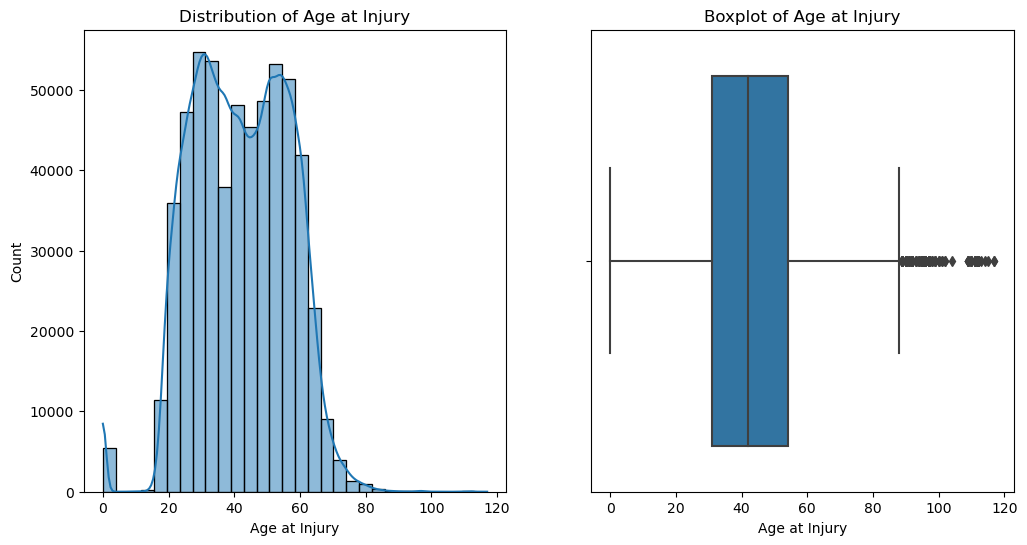

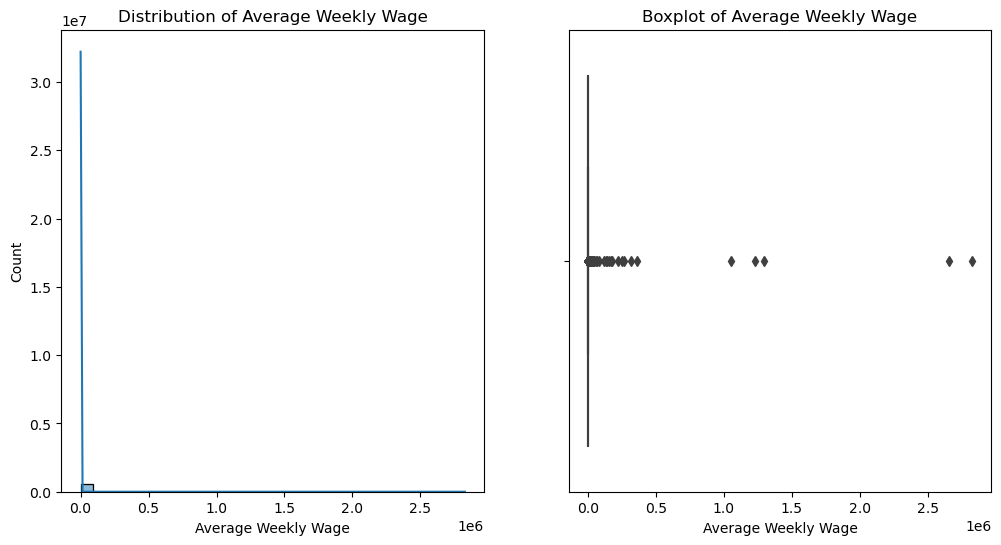

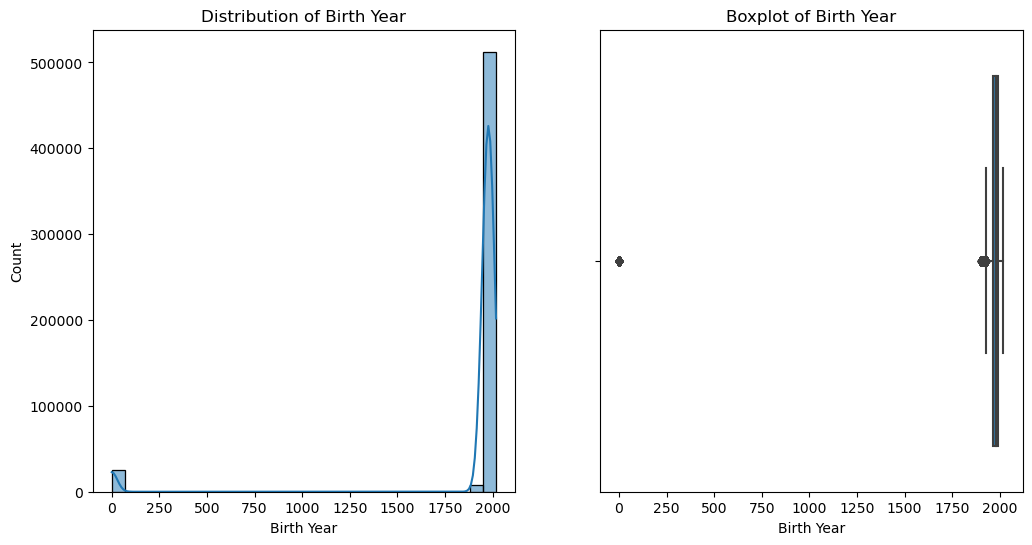

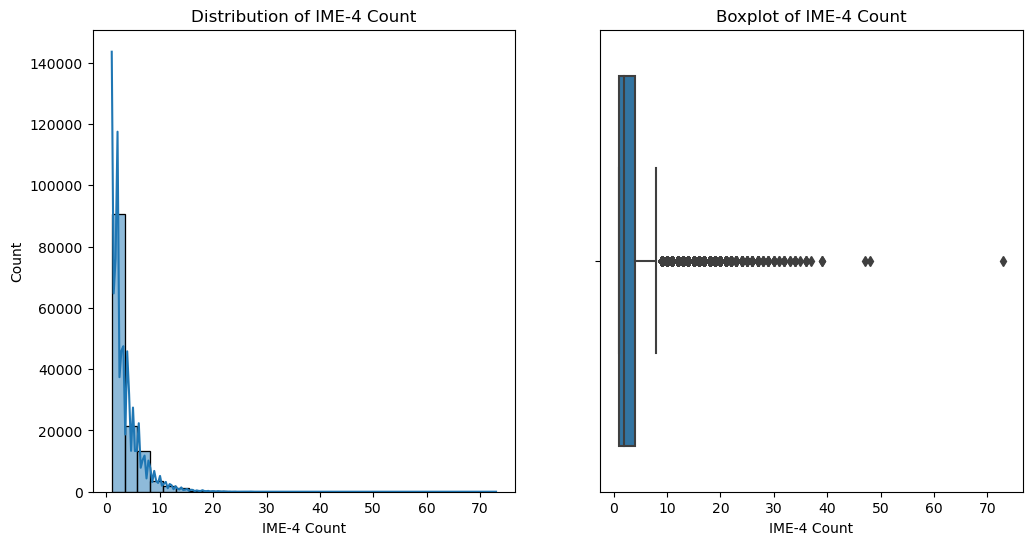

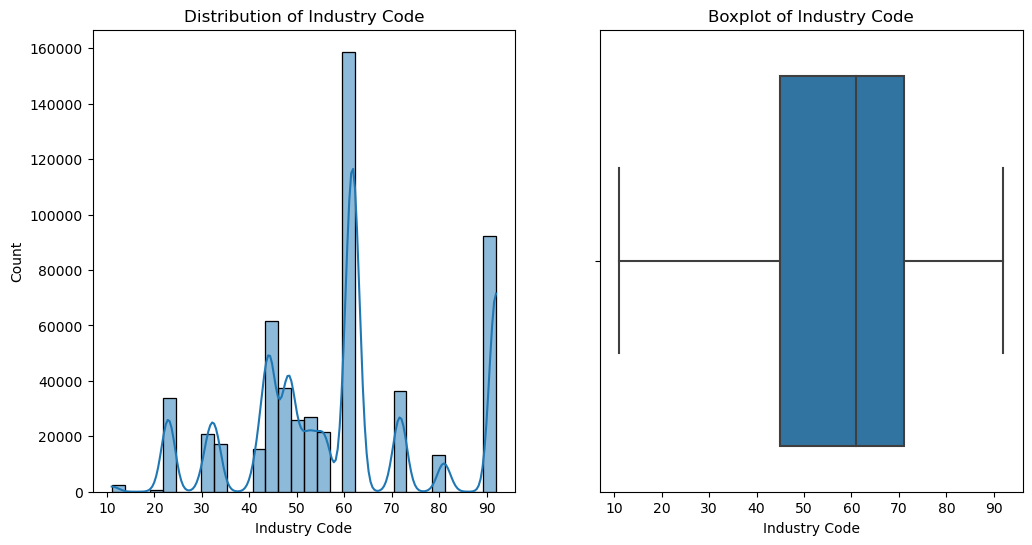

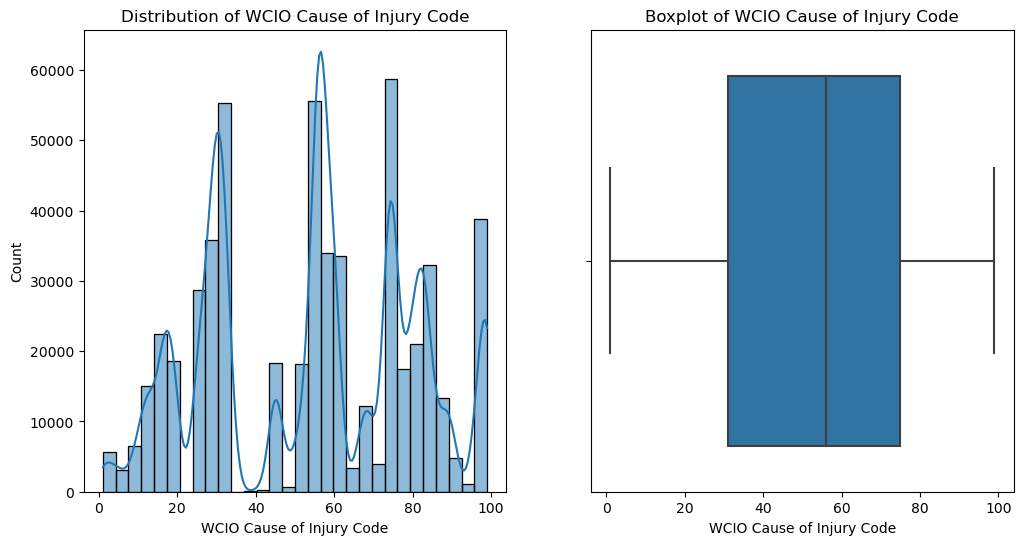

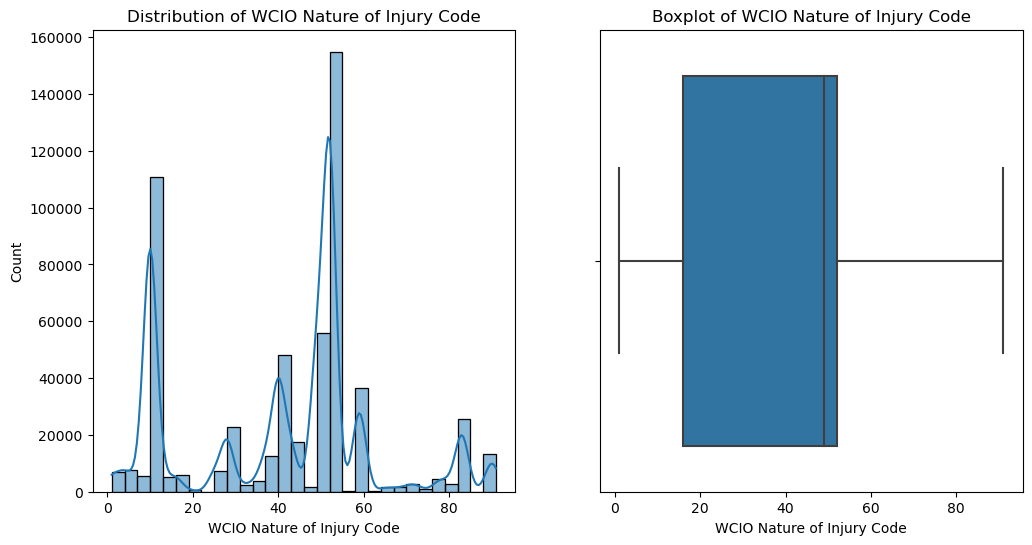

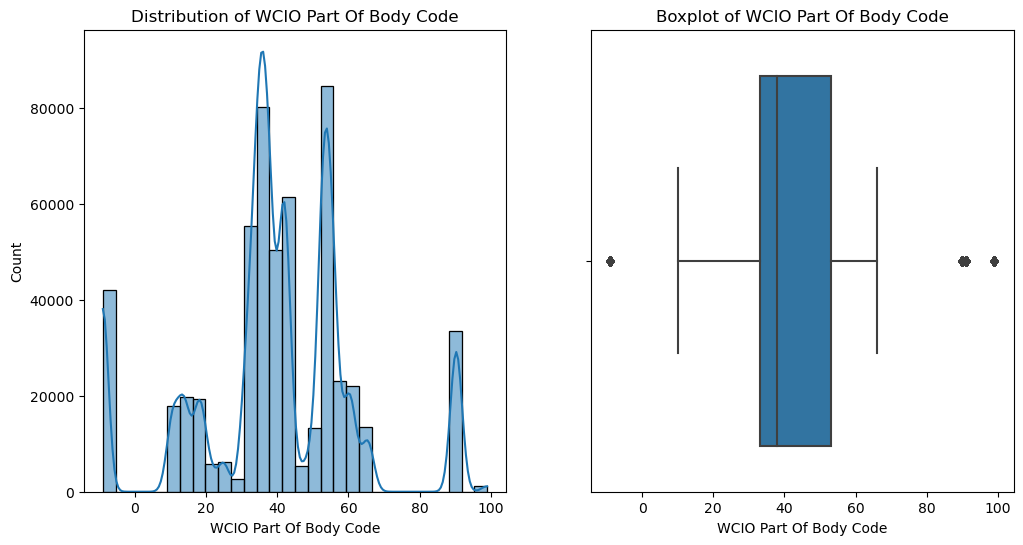

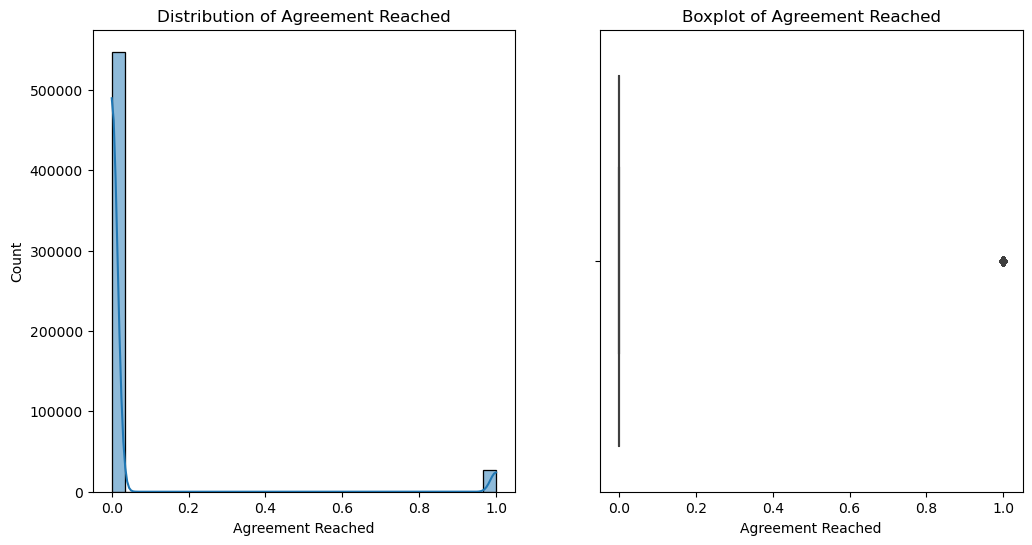

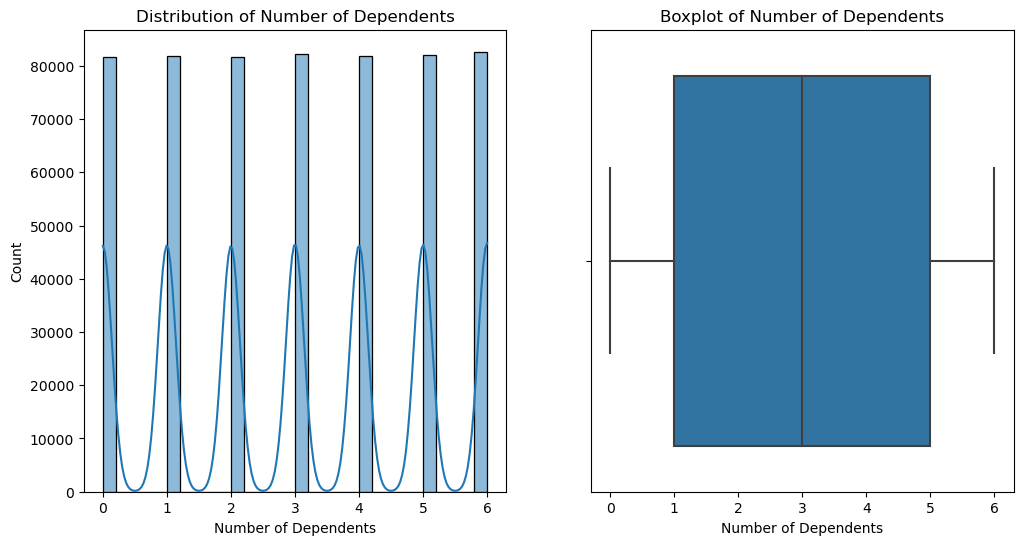

In [7]:
numerical_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 
                  'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
                  'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']

# Plotting histograms and boxplots for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    
    plt.show()

Data Visualization after feedback: Numer Cols

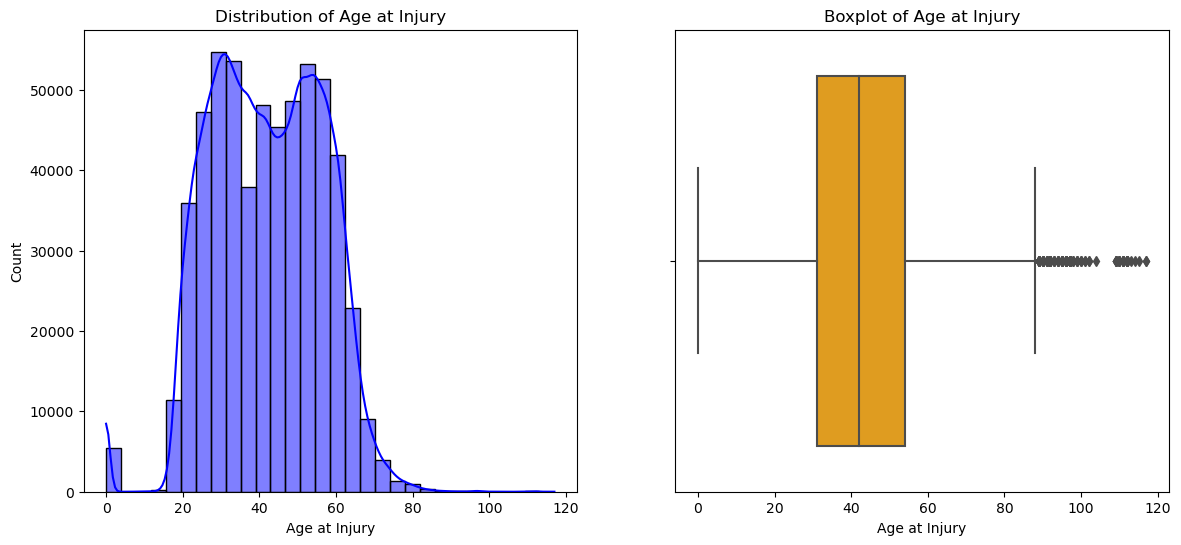

### Interpretation of Age at Injury ###
- The mean value is 42.11 and the median is 42.00.
- The distribution is approximately symmetrical.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



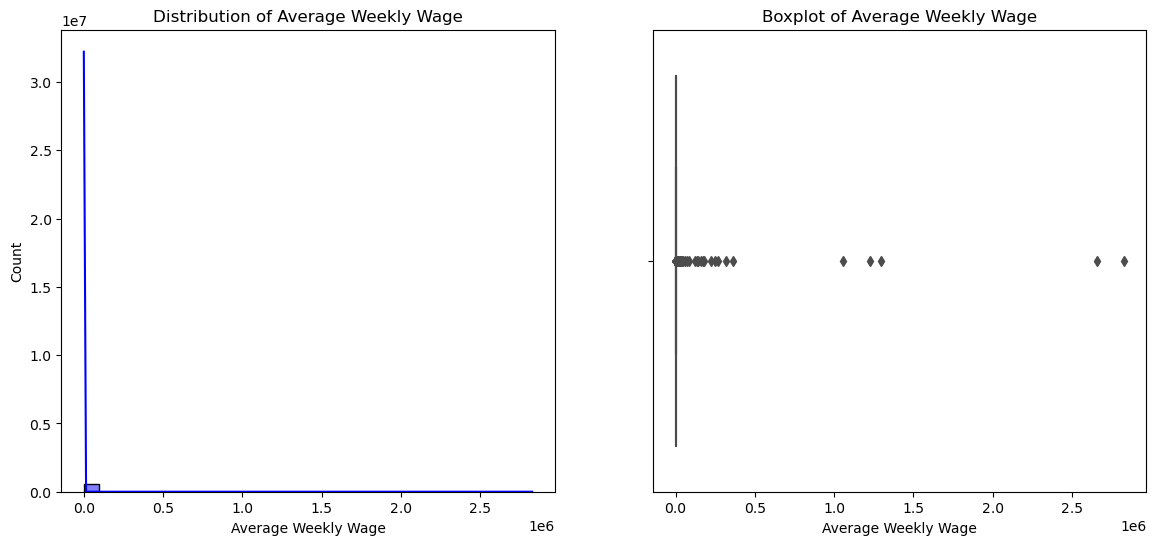

### Interpretation of Average Weekly Wage ###
- The mean value is 491.09 and the median is 0.00.
- The distribution is highly right-skewed, with a concentration of lower values.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



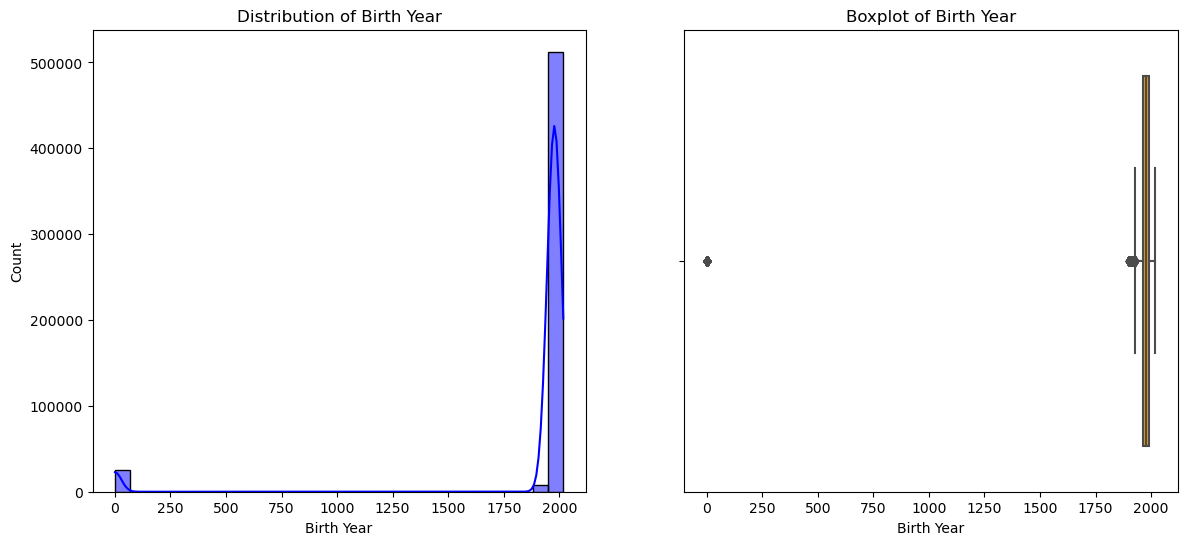

### Interpretation of Birth Year ###
- The mean value is 1886.77 and the median is 1977.00.
- The distribution is highly left-skewed, with a concentration of higher values.
- The mean is lower than the median, suggesting a left-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



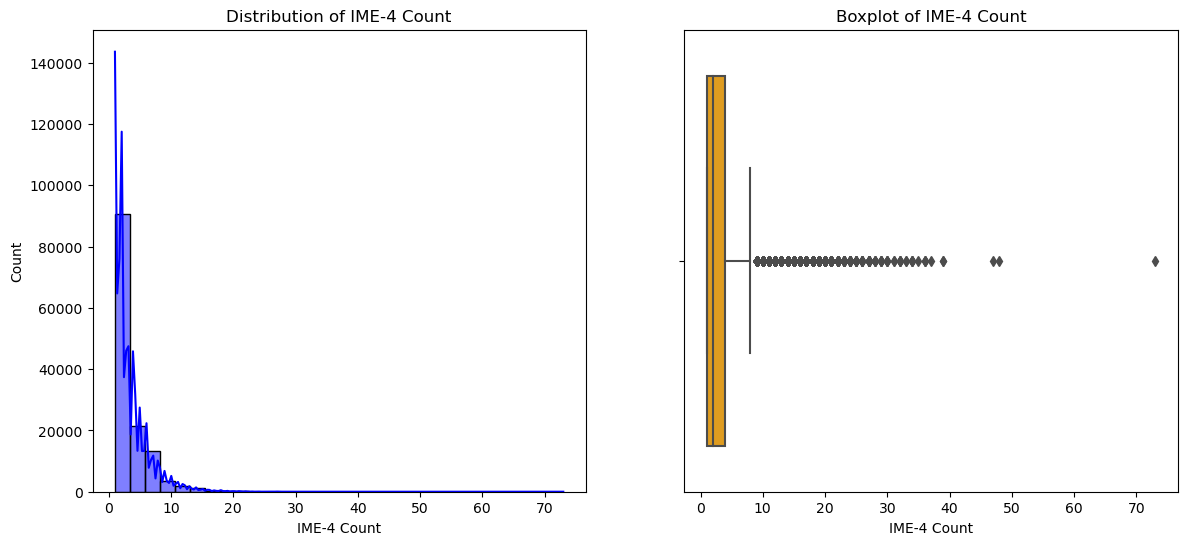

### Interpretation of IME-4 Count ###
- The mean value is 3.21 and the median is 2.00.
- The distribution is highly right-skewed, with a concentration of lower values.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



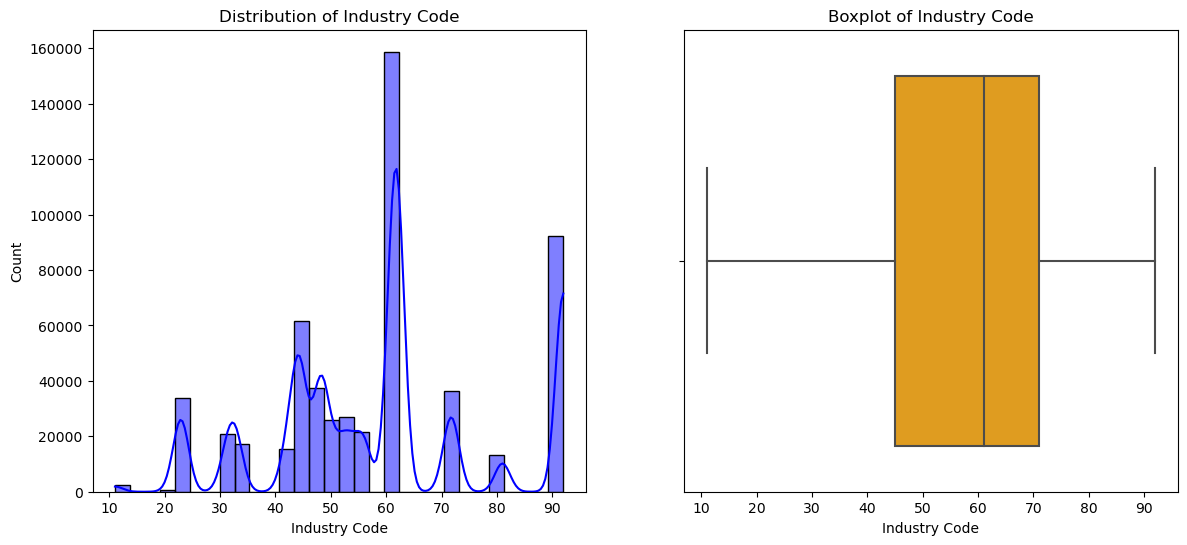

### Interpretation of Industry Code ###
- The mean value is 58.65 and the median is 61.00.
- The distribution is approximately symmetrical.
- The mean is lower than the median, suggesting a left-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



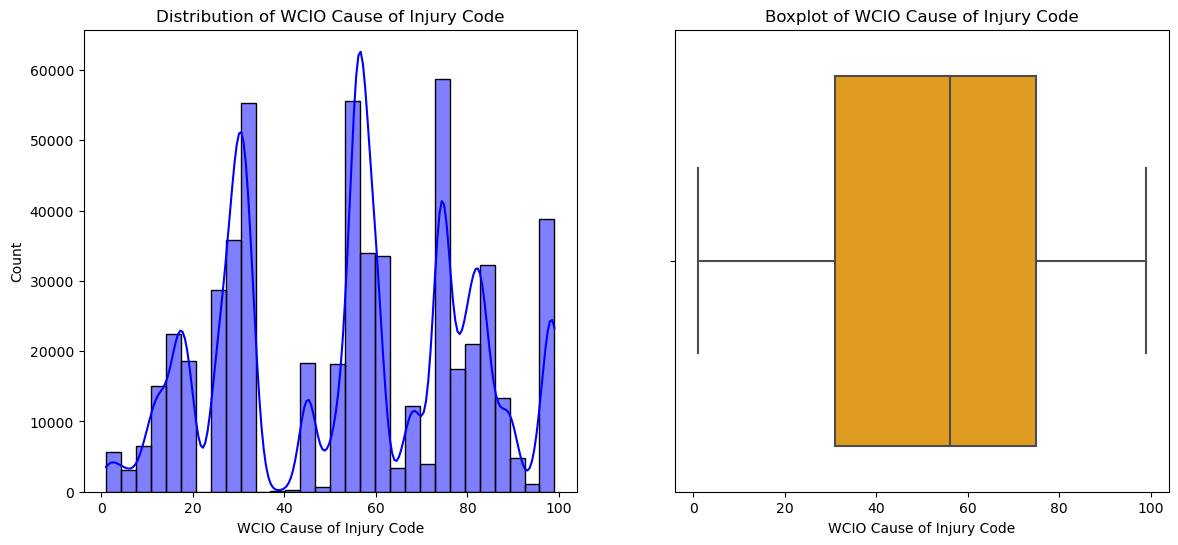

### Interpretation of WCIO Cause of Injury Code ###
- The mean value is 54.38 and the median is 56.00.
- The distribution is approximately symmetrical.
- The mean is lower than the median, suggesting a left-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



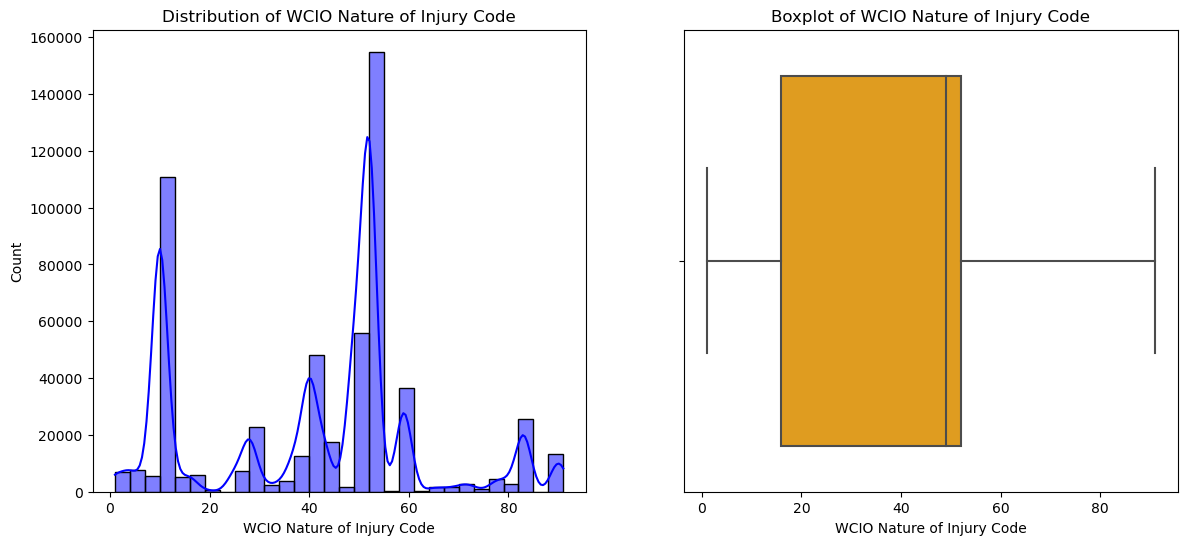

### Interpretation of WCIO Nature of Injury Code ###
- The mean value is 41.01 and the median is 49.00.
- The distribution is approximately symmetrical.
- The mean is lower than the median, suggesting a left-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



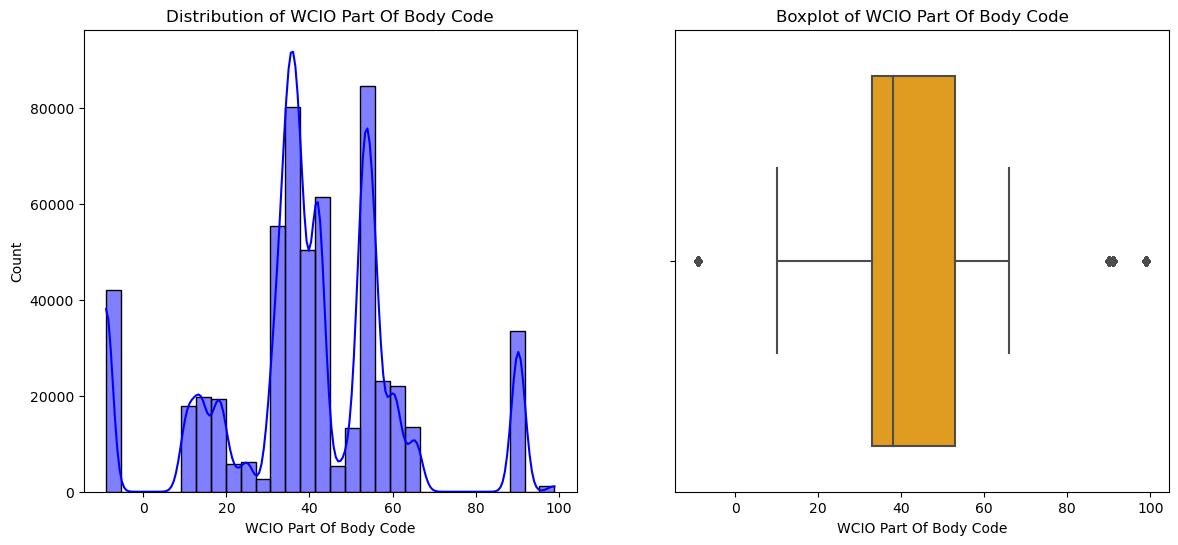

### Interpretation of WCIO Part Of Body Code ###
- The mean value is 39.74 and the median is 38.00.
- The distribution is approximately symmetrical.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



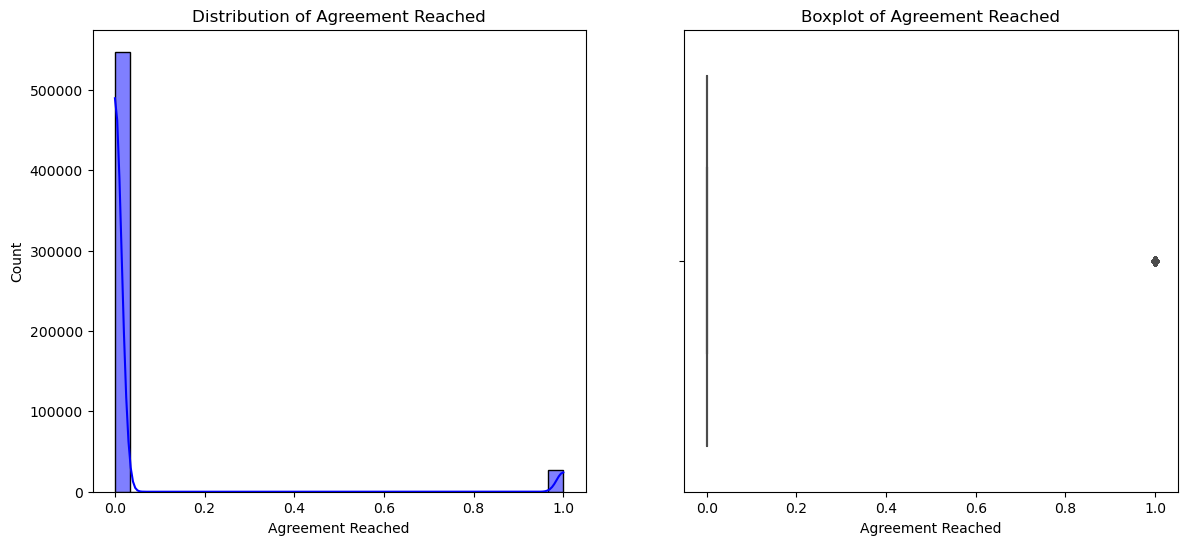

### Interpretation of Agreement Reached ###
- The mean value is 0.05 and the median is 0.00.
- The distribution is highly right-skewed, with a concentration of lower values.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



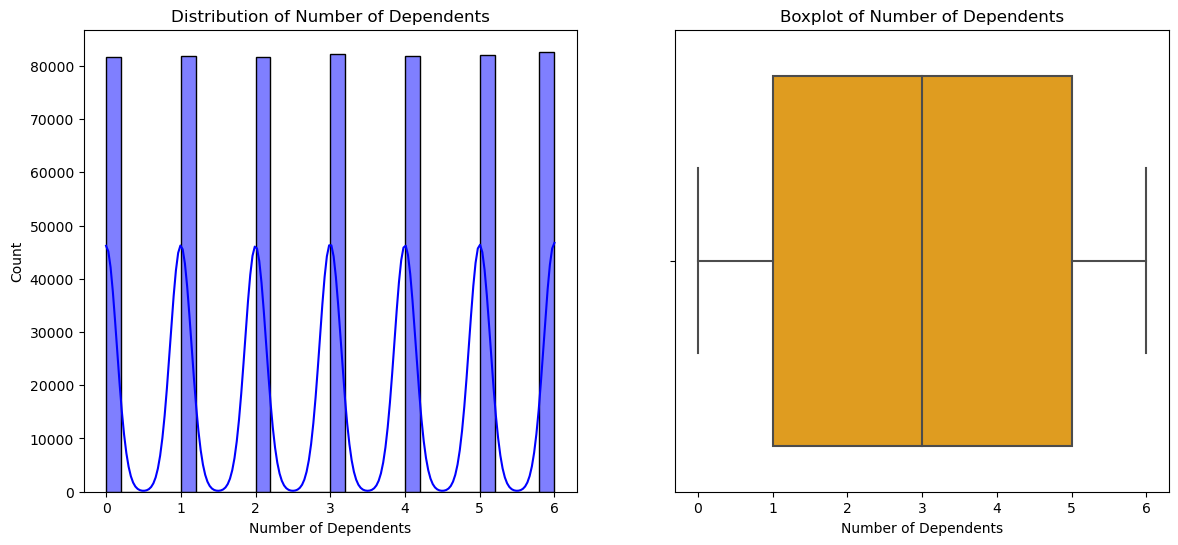

### Interpretation of Number of Dependents ###
- The mean value is 3.01 and the median is 3.00.
- The distribution is approximately symmetrical.
- The mean is higher than the median, suggesting a right-skewed distribution.
- Observations from the histogram and boxplot:
  - The histogram shows the overall distribution of values.
  - The boxplot highlights the central tendency and spread of the data.



In [8]:
numerical_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 
                  'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
                  'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']

for col in numerical_cols:
    # Plot histograms and boxplots
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col].dropna(), color='orange')
    plt.title(f'Boxplot of {col}')
    
    plt.show()
    
    # Interpretation of results
    print(f"### Interpretation of {col} ###")
    mean = train_df[col].mean()
    median = train_df[col].median()
    skewness = train_df[col].skew()

    print(f"- The mean value is {mean:.2f} and the median is {median:.2f}.")
    if skewness > 1:
        print(f"- The distribution is highly right-skewed, with a concentration of lower values.")
    elif skewness < -1:
        print(f"- The distribution is highly left-skewed, with a concentration of higher values.")
    else:
        print(f"- The distribution is approximately symmetrical.")
    
    if mean > median:
        print("- The mean is higher than the median, suggesting a right-skewed distribution.")
    elif mean < median:
        print("- The mean is lower than the median, suggesting a left-skewed distribution.")
    else:
        print("- The mean and median are equal, indicating a symmetric distribution.")
    
    print(f"- Observations from the histogram and boxplot:")
    print("  - The histogram shows the overall distribution of values.")
    print("  - The boxplot highlights the central tendency and spread of the data.")
    print()


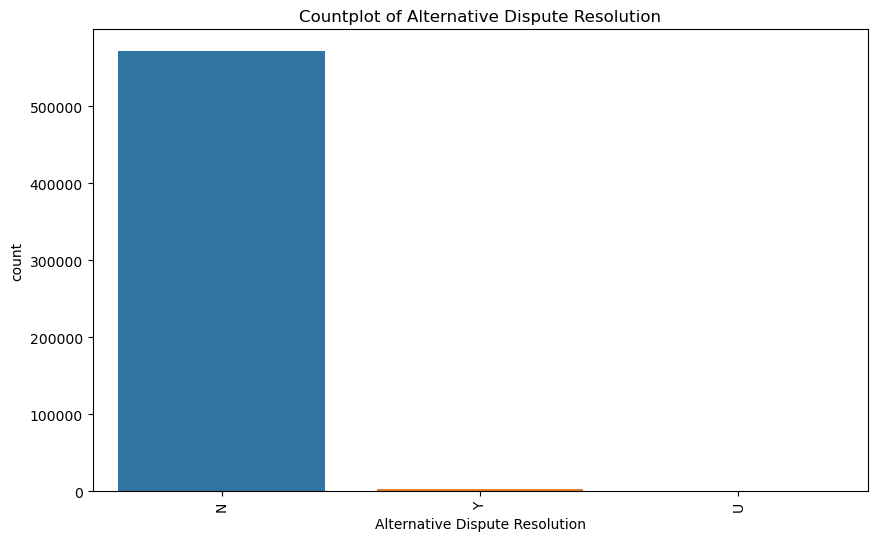

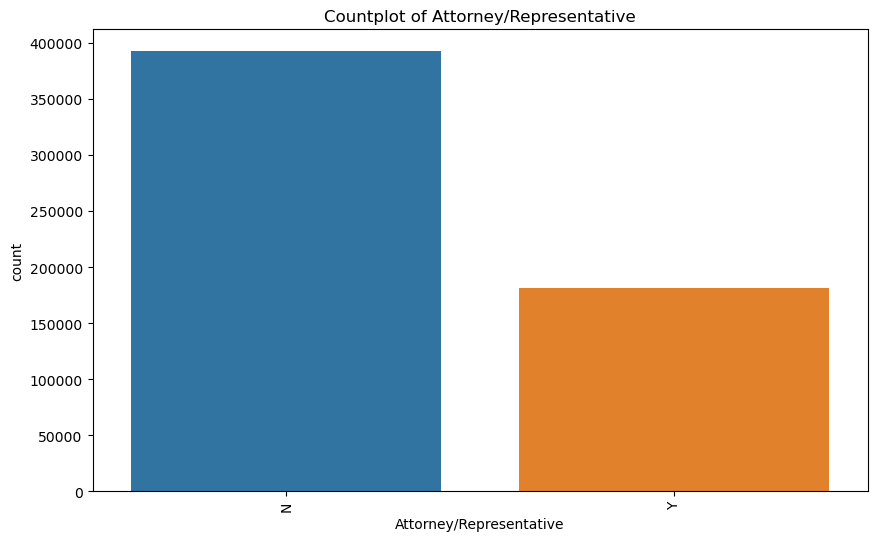

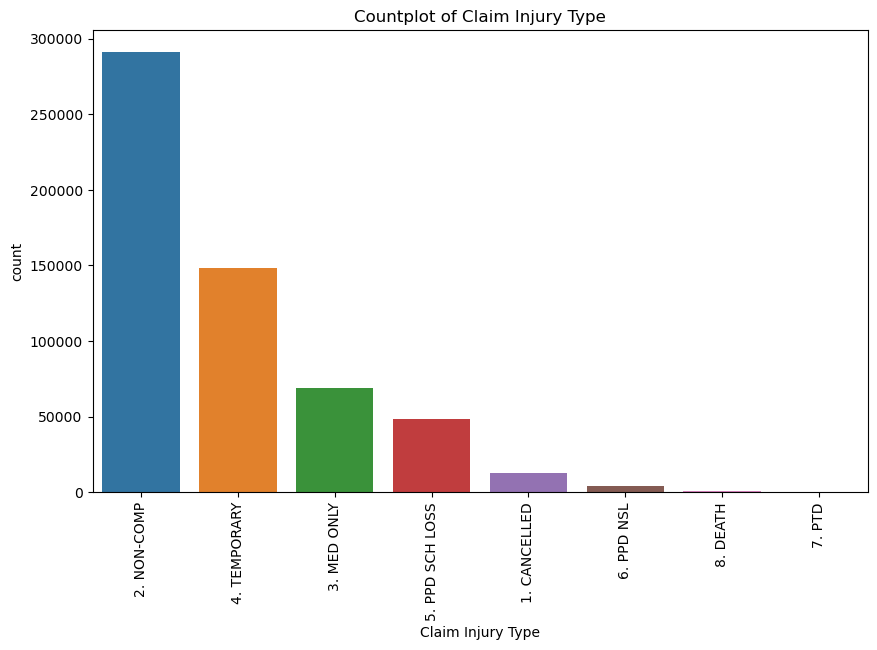

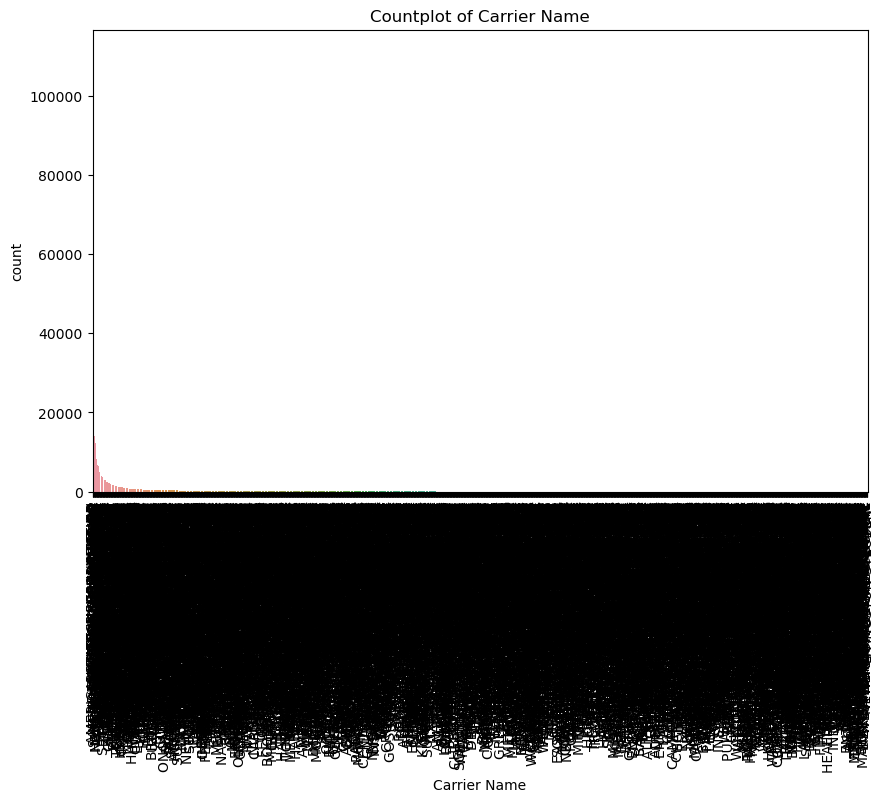

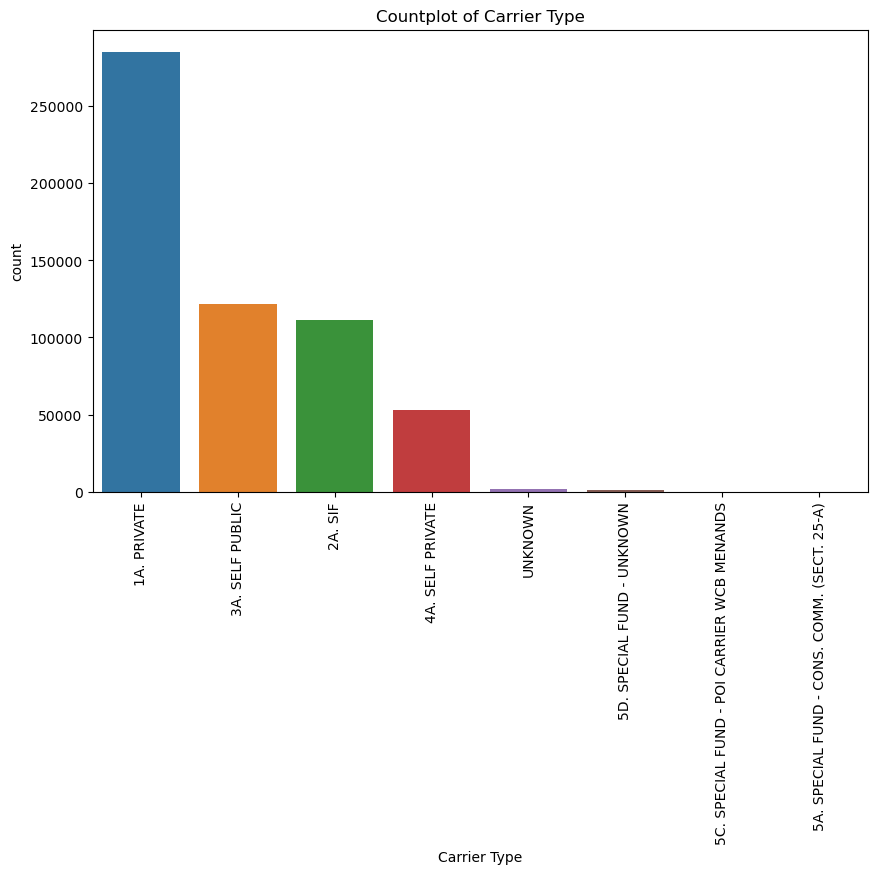

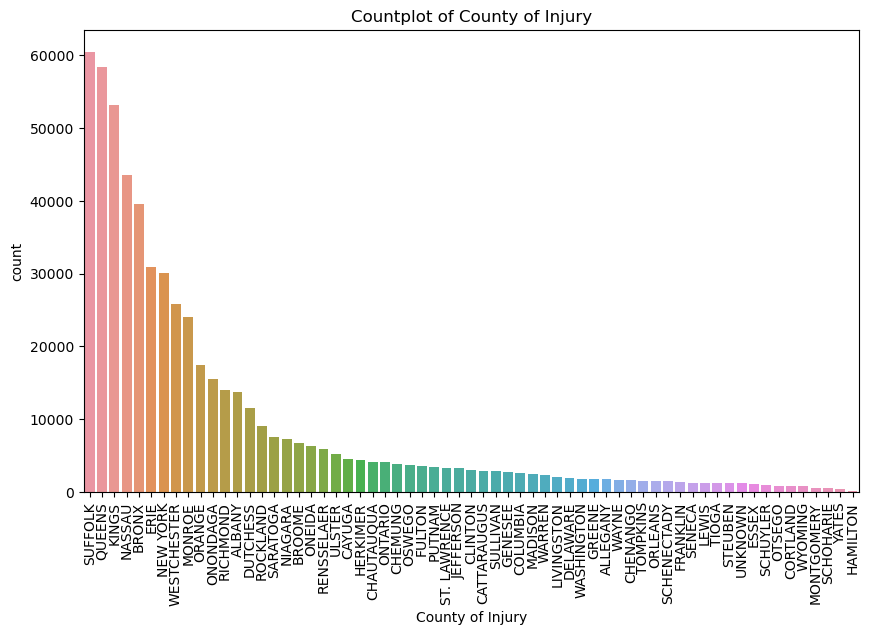

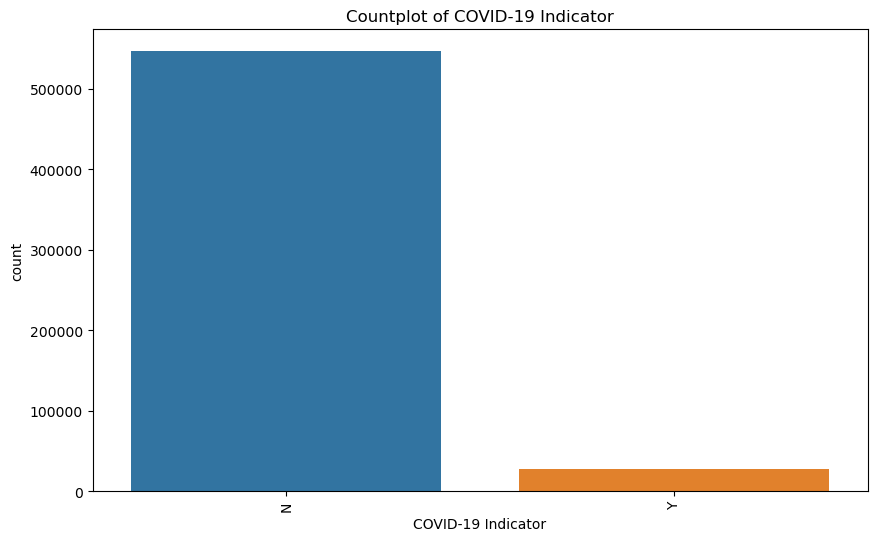

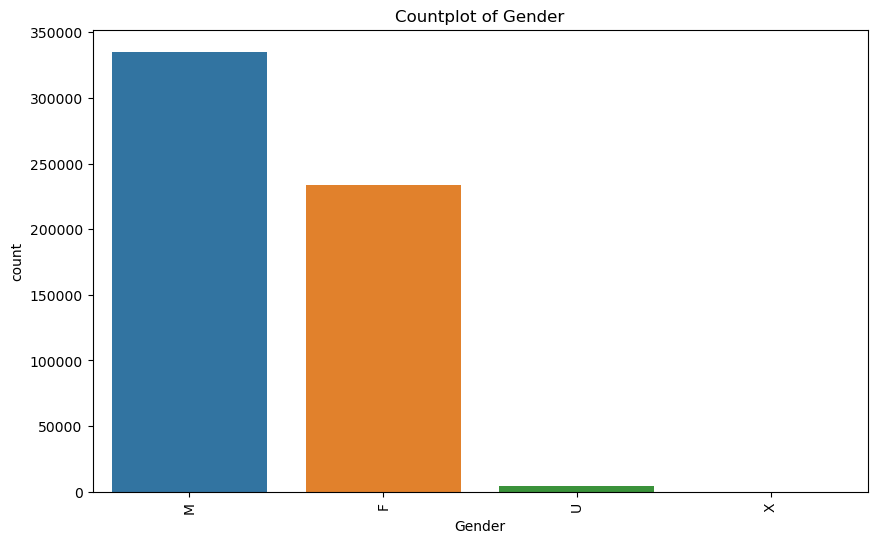

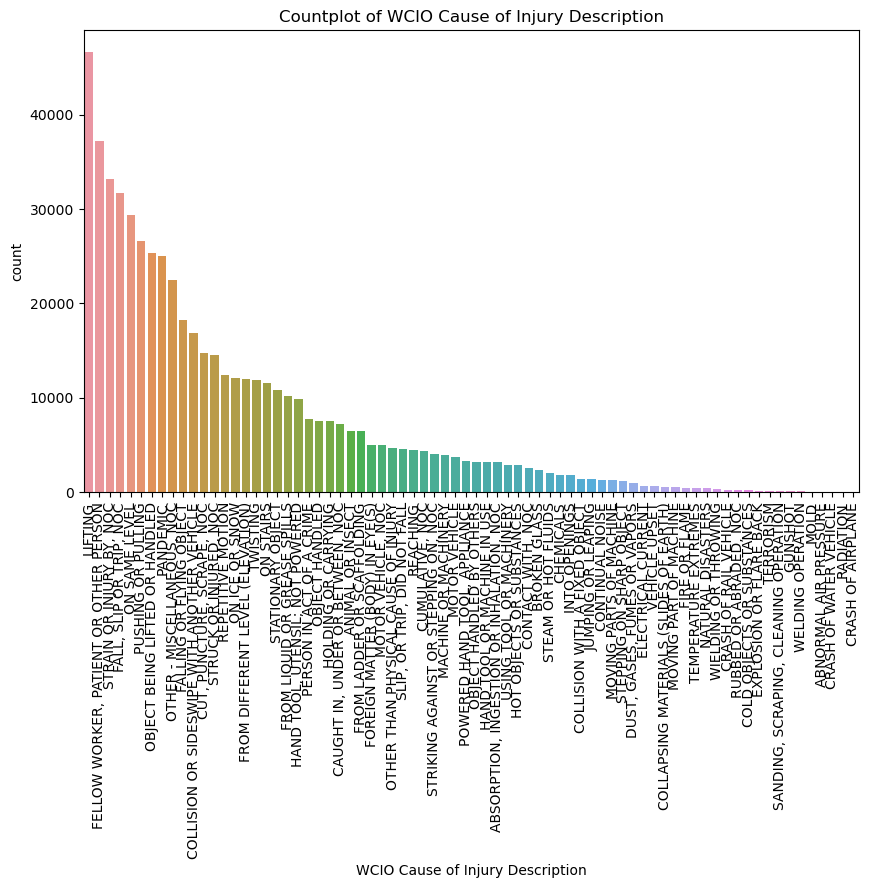

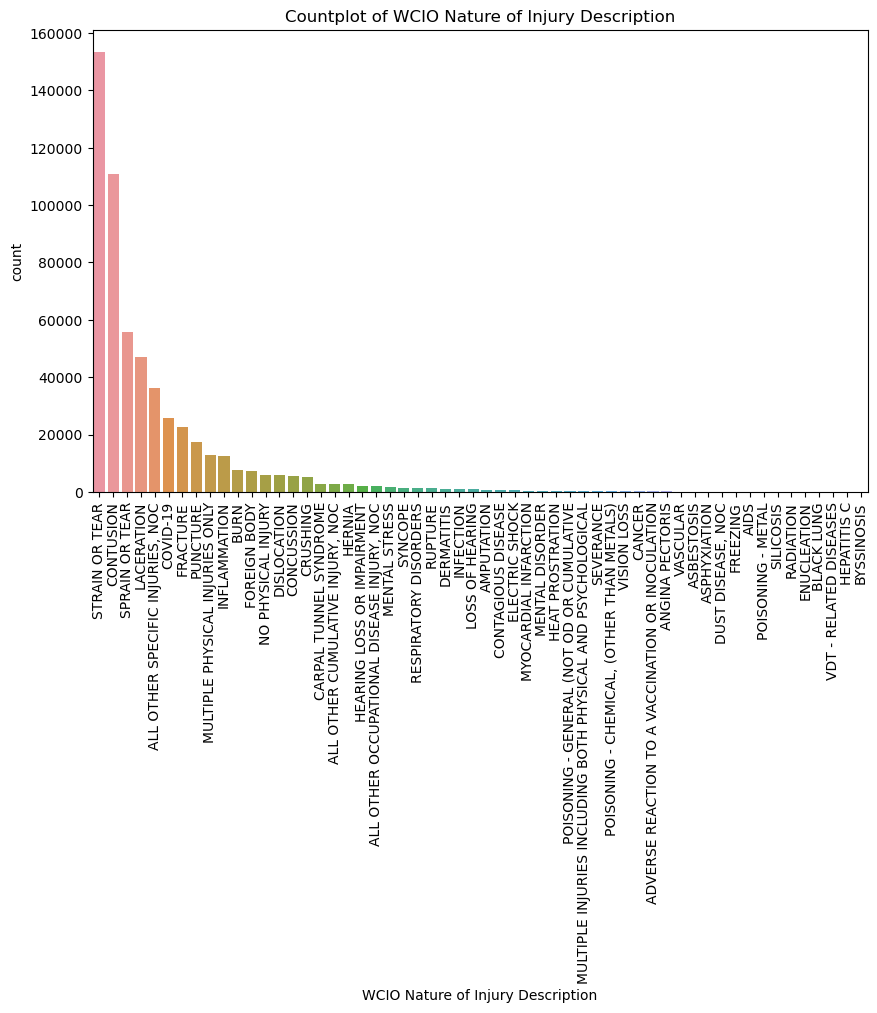

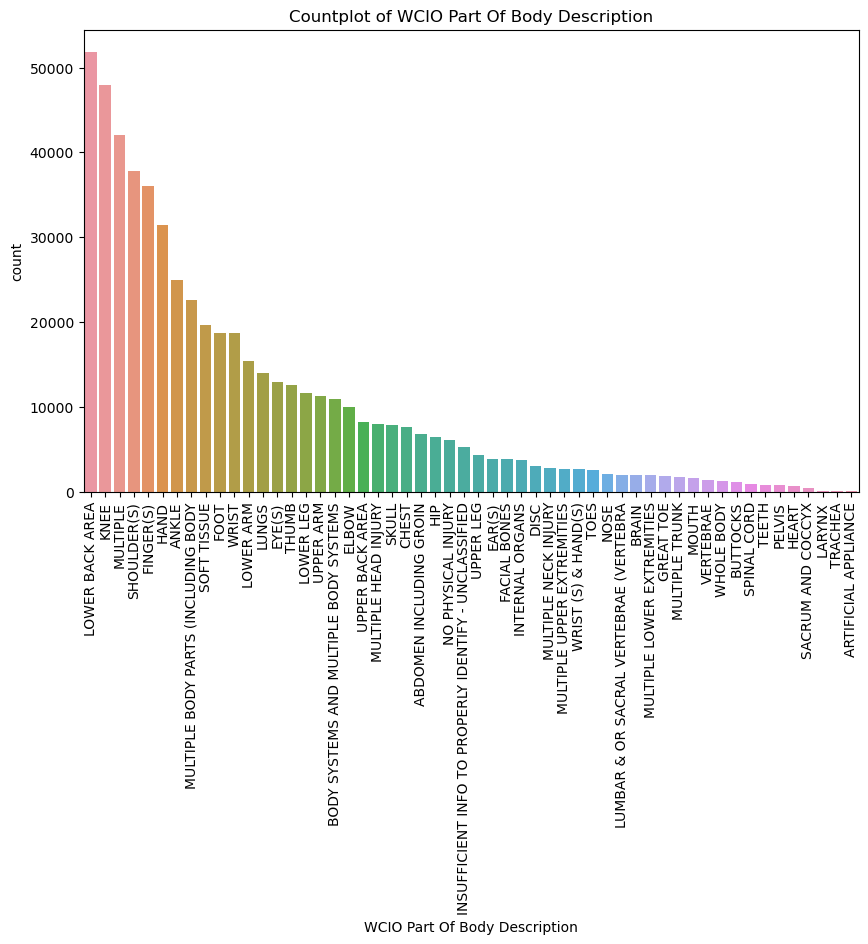

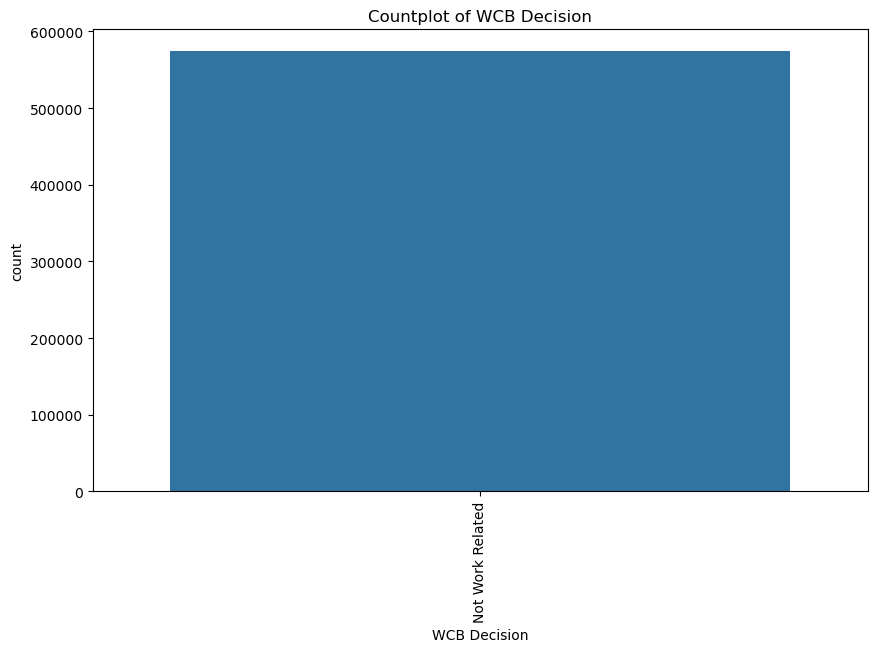

In [9]:
categorical_cols = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Claim Injury Type',
                    'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 
                    'Gender', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
                    'WCIO Part Of Body Description', 'WCB Decision']

# Plotting bar plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

Data Visualization after feedback: Categ Cols (With Others)

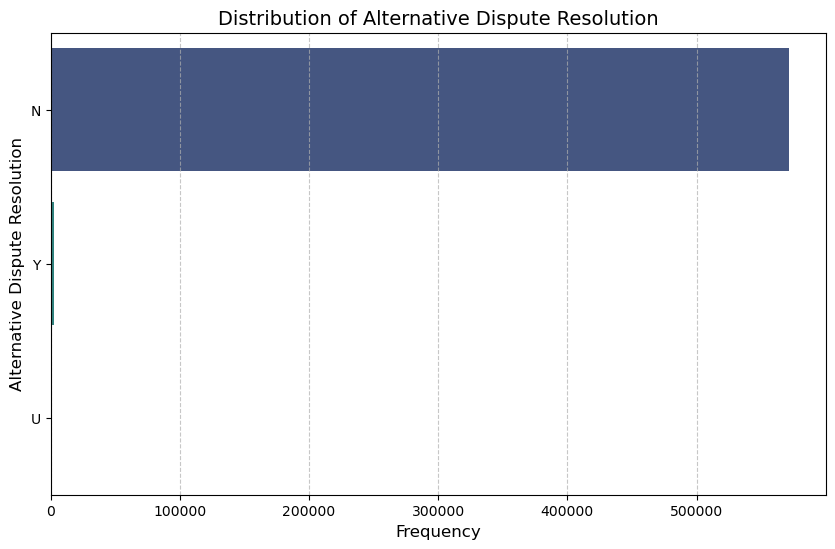

Interpretation for Alternative Dispute Resolution:
  - The most common category is 'N' with 571412 occurrences.
  - Other significant categories include:
    - 'Y' with 2609 occurrences.


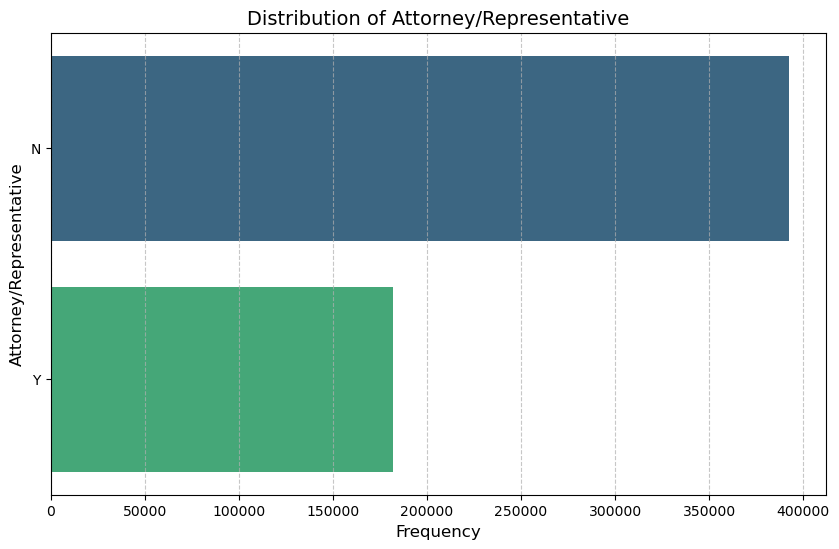

Interpretation for Attorney/Representative:
  - The most common category is 'N' with 392291 occurrences.
  - Other significant categories include:


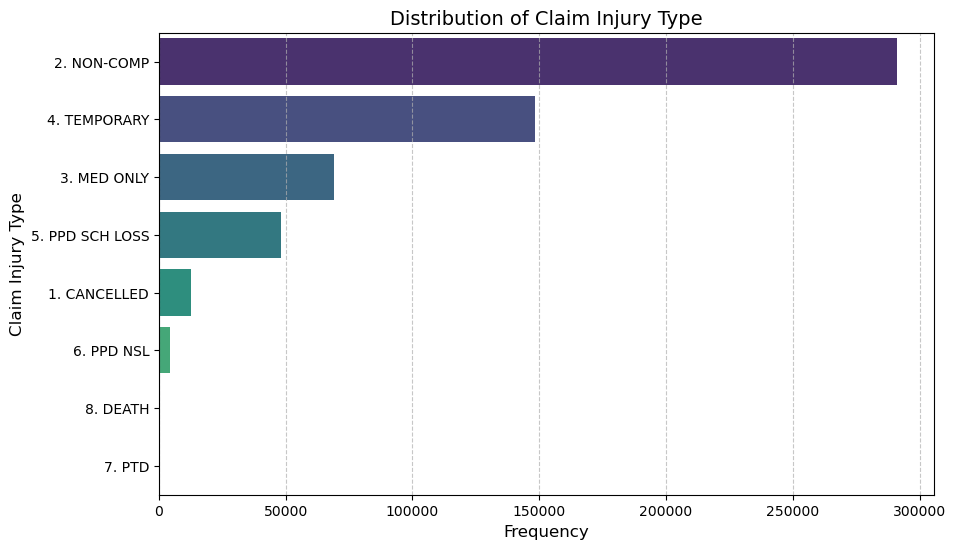

Interpretation for Claim Injury Type:
  - The most common category is '2. NON-COMP' with 291078 occurrences.
  - Other significant categories include:
    - '4. TEMPORARY' with 148507 occurrences.
    - '3. MED ONLY' with 68906 occurrences.
    - '5. PPD SCH LOSS' with 48280 occurrences.
    - '1. CANCELLED' with 12477 occurrences.
    - '6. PPD NSL' with 4211 occurrences.
    - '8. DEATH' with 470 occurrences.


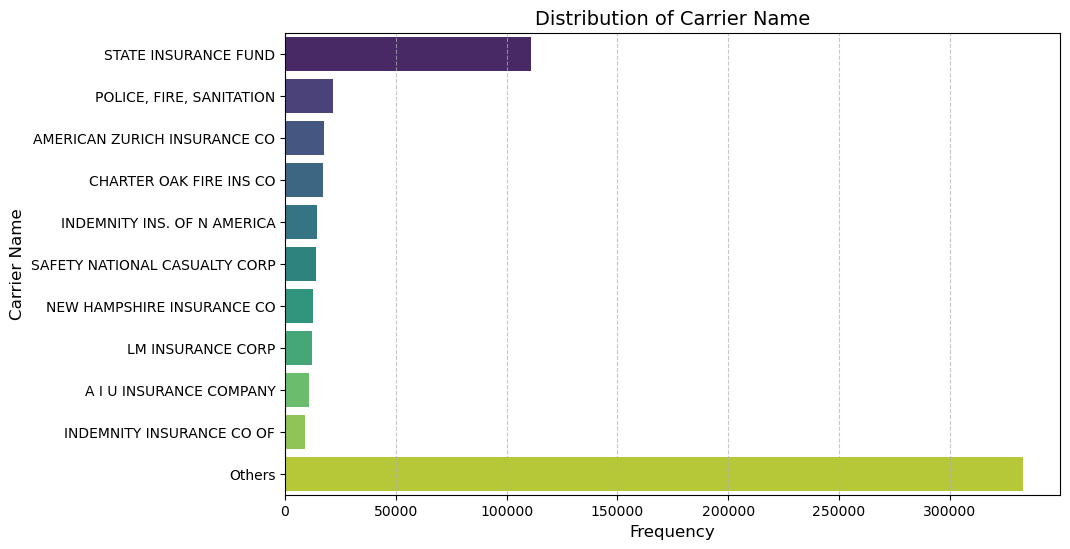

Interpretation for Carrier Name:
  - The most common category is 'STATE INSURANCE FUND' with 111144 occurrences.
  - Other significant categories include:
    - 'POLICE, FIRE, SANITATION' with 21602 occurrences.
    - 'AMERICAN ZURICH INSURANCE CO' with 17540 occurrences.
    - 'CHARTER OAK FIRE INS CO' with 17176 occurrences.
    - 'INDEMNITY INS. OF N AMERICA' with 14366 occurrences.
    - 'SAFETY NATIONAL CASUALTY CORP' with 13941 occurrences.
    - 'NEW HAMPSHIRE INSURANCE CO' with 12736 occurrences.
    - 'LM INSURANCE CORP' with 12274 occurrences.
    - 'A I U INSURANCE COMPANY' with 11038 occurrences.
    - 'INDEMNITY INSURANCE CO OF' with 9126 occurrences.
  - The 'Others' category includes 333083 occurrences combined from smaller categories.


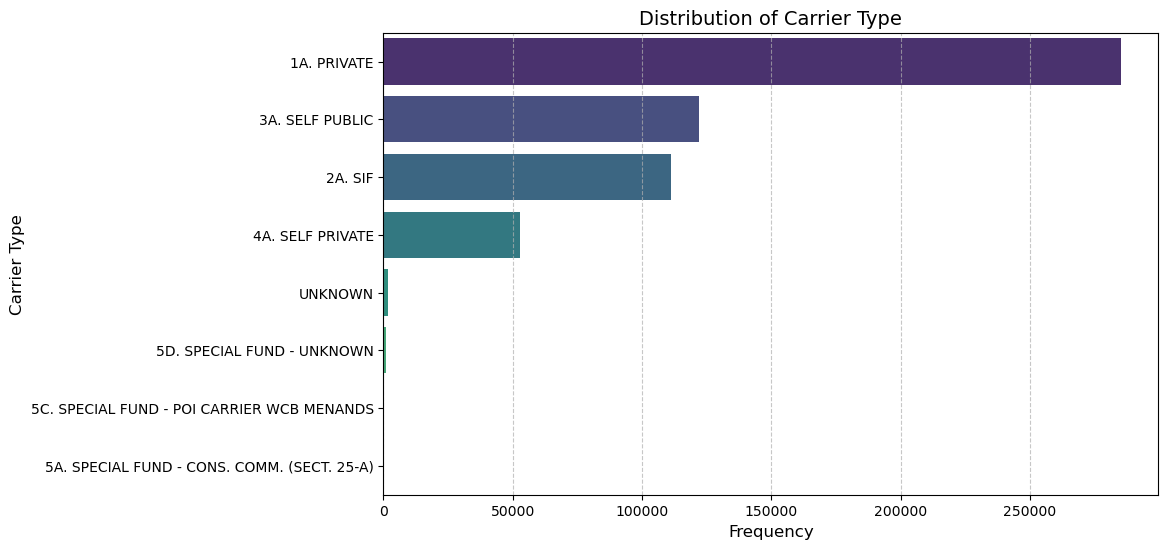

Interpretation for Carrier Type:
  - The most common category is '1A. PRIVATE' with 285368 occurrences.
  - Other significant categories include:
    - '3A. SELF PUBLIC' with 121920 occurrences.
    - '2A. SIF' with 111144 occurrences.
    - '4A. SELF PRIVATE' with 52788 occurrences.
    - 'UNKNOWN' with 1774 occurrences.
    - '5D. SPECIAL FUND - UNKNOWN' with 1023 occurrences.
    - '5C. SPECIAL FUND - POI CARRIER WCB MENANDS' with 5 occurrences.


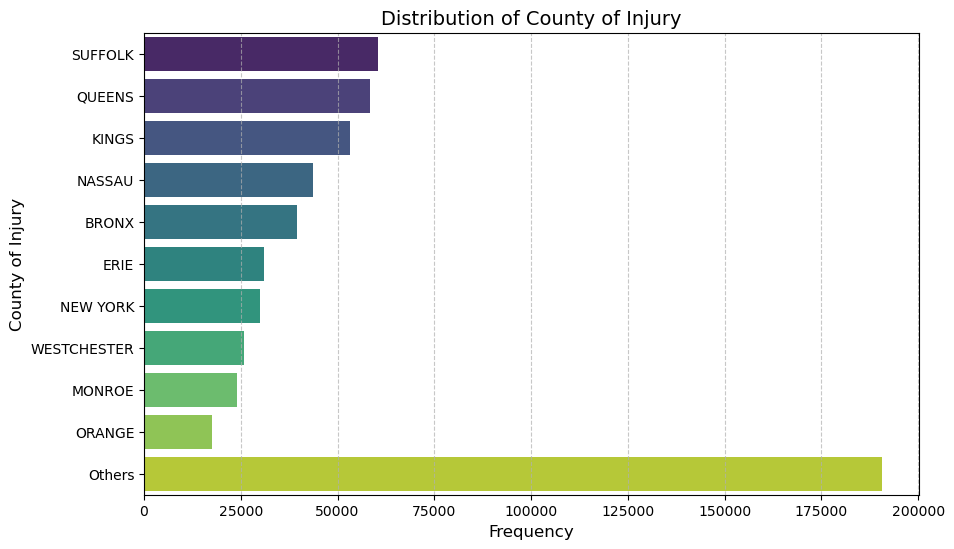

Interpretation for County of Injury:
  - The most common category is 'SUFFOLK' with 60430 occurrences.
  - Other significant categories include:
    - 'QUEENS' with 58333 occurrences.
    - 'KINGS' with 53207 occurrences.
    - 'NASSAU' with 43580 occurrences.
    - 'BRONX' with 39618 occurrences.
    - 'ERIE' with 30874 occurrences.
    - 'NEW YORK' with 30014 occurrences.
    - 'WESTCHESTER' with 25754 occurrences.
    - 'MONROE' with 24071 occurrences.
    - 'ORANGE' with 17450 occurrences.
  - The 'Others' category includes 190695 occurrences combined from smaller categories.


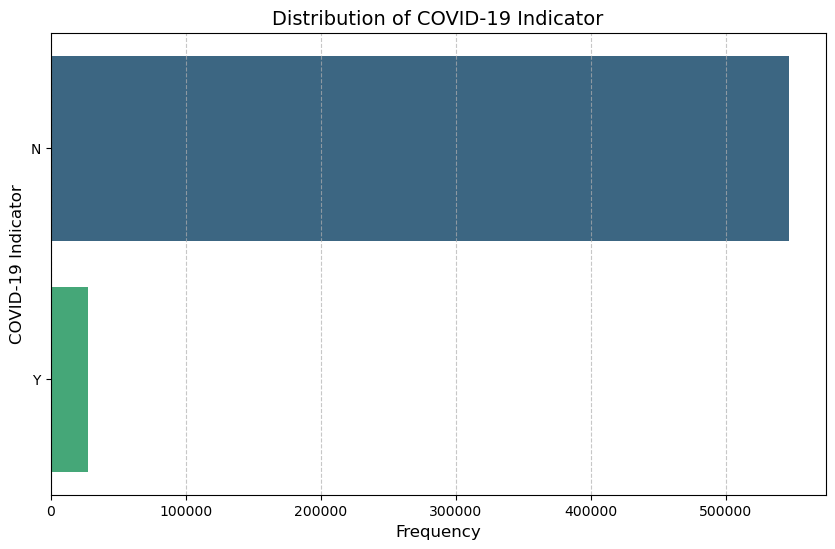

Interpretation for COVID-19 Indicator:
  - The most common category is 'N' with 546505 occurrences.
  - Other significant categories include:


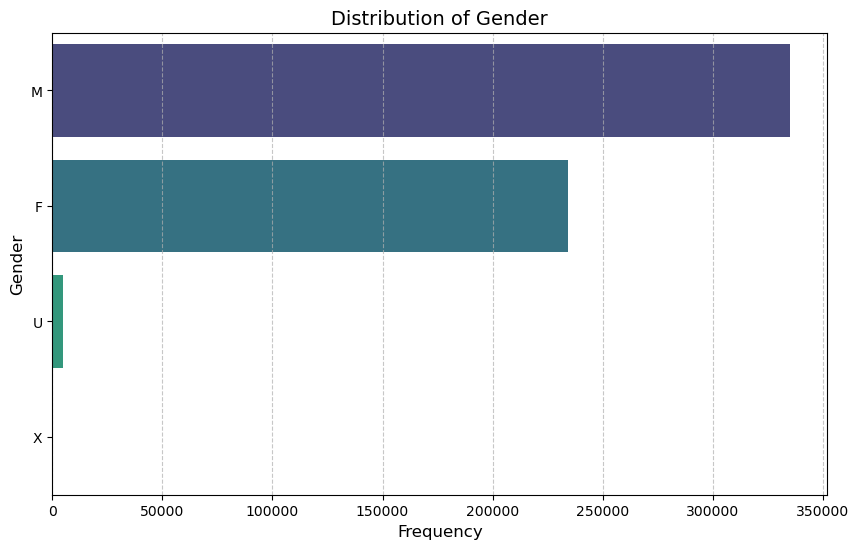

Interpretation for Gender:
  - The most common category is 'M' with 335218 occurrences.
  - Other significant categories include:
    - 'F' with 234051 occurrences.
    - 'U' with 4711 occurrences.


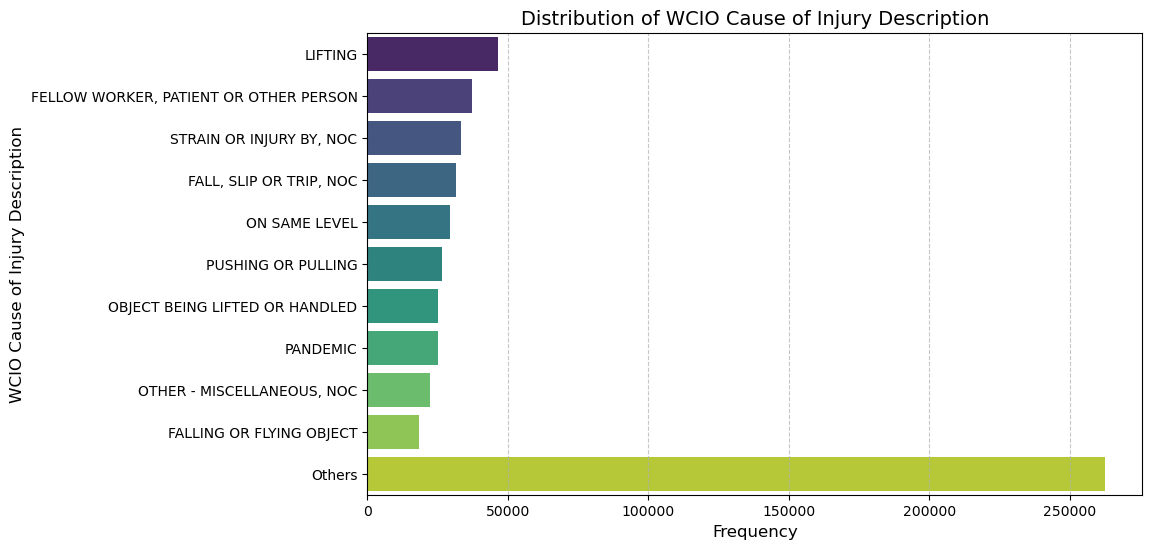

Interpretation for WCIO Cause of Injury Description:
  - The most common category is 'LIFTING' with 46610 occurrences.
  - Other significant categories include:
    - 'FELLOW WORKER, PATIENT OR OTHER PERSON' with 37153 occurrences.
    - 'STRAIN OR INJURY BY, NOC' with 33192 occurrences.
    - 'FALL, SLIP OR TRIP, NOC' with 31733 occurrences.
    - 'ON SAME LEVEL' with 29364 occurrences.
    - 'PUSHING OR PULLING' with 26600 occurrences.
    - 'OBJECT BEING LIFTED OR HANDLED' with 25291 occurrences.
    - 'PANDEMIC' with 25006 occurrences.
    - 'OTHER - MISCELLANEOUS, NOC' with 22479 occurrences.
    - 'FALLING OR FLYING OBJECT' with 18275 occurrences.
  - The 'Others' category includes 262683 occurrences combined from smaller categories.


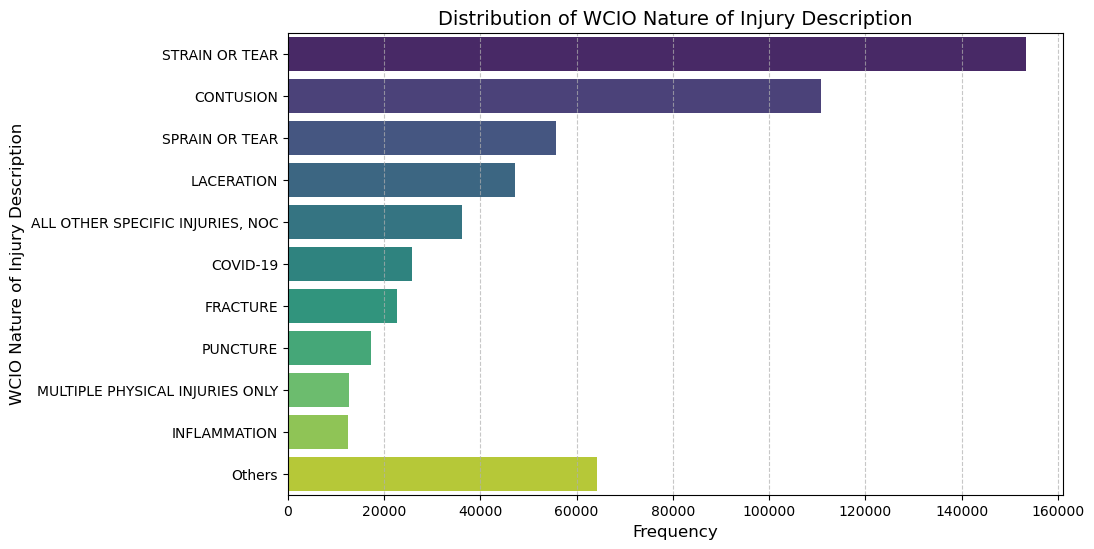

Interpretation for WCIO Nature of Injury Description:
  - The most common category is 'STRAIN OR TEAR' with 153373 occurrences.
  - Other significant categories include:
    - 'CONTUSION' with 110717 occurrences.
    - 'SPRAIN OR TEAR' with 55789 occurrences.
    - 'LACERATION' with 47157 occurrences.
    - 'ALL OTHER SPECIFIC INJURIES, NOC' with 36101 occurrences.
    - 'COVID-19' with 25724 occurrences.
    - 'FRACTURE' with 22673 occurrences.
    - 'PUNCTURE' with 17350 occurrences.
    - 'MULTIPLE PHYSICAL INJURIES ONLY' with 12734 occurrences.
    - 'INFLAMMATION' with 12491 occurrences.
  - The 'Others' category includes 64260 occurrences combined from smaller categories.


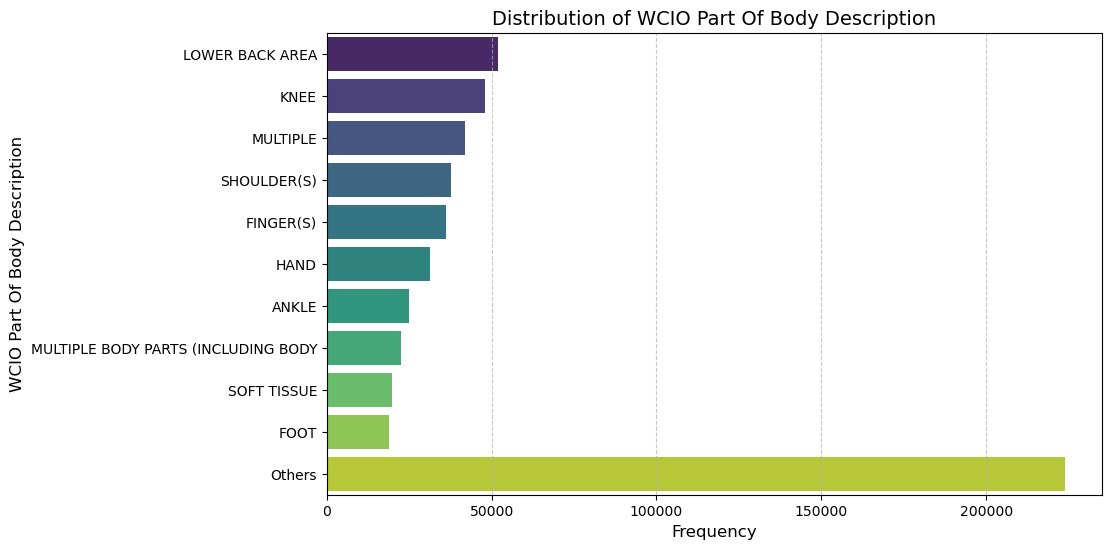

Interpretation for WCIO Part Of Body Description:
  - The most common category is 'LOWER BACK AREA' with 51862 occurrences.
  - Other significant categories include:
    - 'KNEE' with 47903 occurrences.
    - 'MULTIPLE' with 42011 occurrences.
    - 'SHOULDER(S)' with 37811 occurrences.
    - 'FINGER(S)' with 36093 occurrences.
    - 'HAND' with 31388 occurrences.
    - 'ANKLE' with 24928 occurrences.
    - 'MULTIPLE BODY PARTS (INCLUDING BODY' with 22608 occurrences.
    - 'SOFT TISSUE' with 19703 occurrences.
    - 'FOOT' with 18765 occurrences.
  - The 'Others' category includes 223872 occurrences combined from smaller categories.


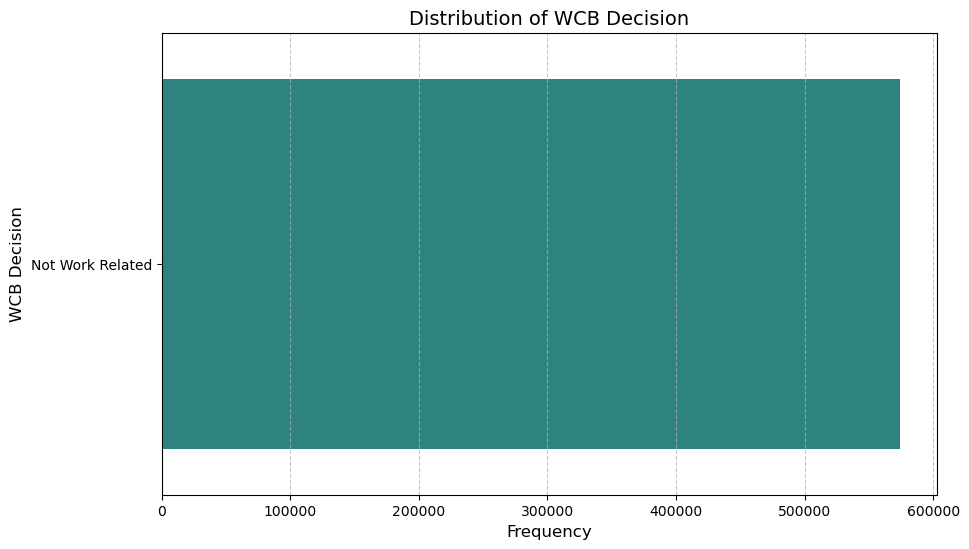

Interpretation for WCB Decision:
  - The most common category is 'Not Work Related' with 574026 occurrences.
  - Only one category available for analysis.


In [10]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    # Calculate the value counts for the column
    value_counts = train_df[col].value_counts()
    
    # Determine the threshold for "Others"
    if len(value_counts) > 10:  # If there are more than 10 categories
        top_categories = value_counts.head(10)  # Top 10 categories
        others_count = value_counts[10:].sum()  # Sum of the remaining categories
        data_to_plot = pd.concat([top_categories, pd.Series({'Others': others_count})])  # Use pd.concat
    else:
        data_to_plot = value_counts  # If 10 or fewer categories, no "Others" needed
    
    # Plot the bar chart
    sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette="viridis")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    # Dynamic interpretation
    print(f"Interpretation for {col}:")
    print(f"  - The most common category is '{data_to_plot.index[0]}' with {data_to_plot.values[0]} occurrences.")
    if len(data_to_plot) > 1:
        print(f"  - Other significant categories include:")
        for i in range(1, len(data_to_plot) - 1):  # Skip the "Others" category
            print(f"    - '{data_to_plot.index[i]}' with {data_to_plot.values[i]} occurrences.")
        if 'Others' in data_to_plot.index:
            print(f"  - The 'Others' category includes {data_to_plot['Others']} occurrences combined from smaller categories.")
    else:
        print(f"  - Only one category available for analysis.")


Data Visualization after feedback: Numer Categ (Without Others)

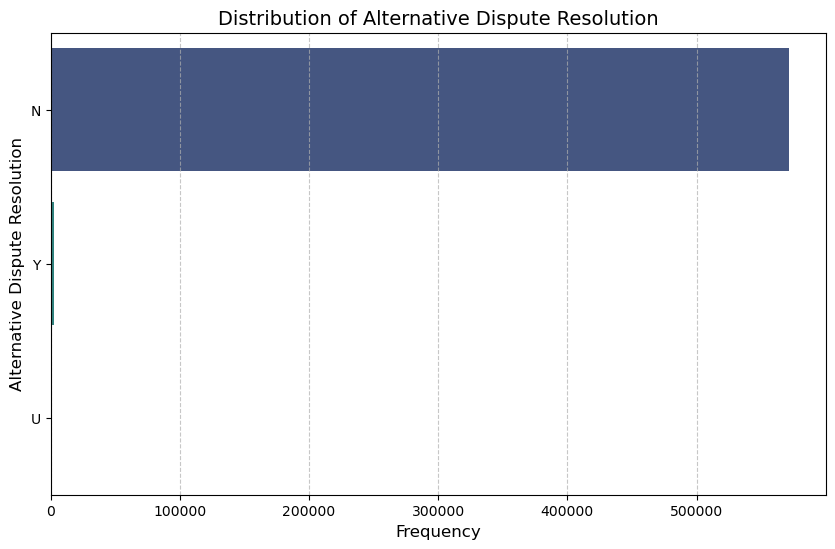

Interpretation for Alternative Dispute Resolution:
  - The most common category is 'N' with 571412 occurrences.
  - Other significant categories include:
    - 'Y' with 2609 occurrences.
    - 'U' with 5 occurrences.


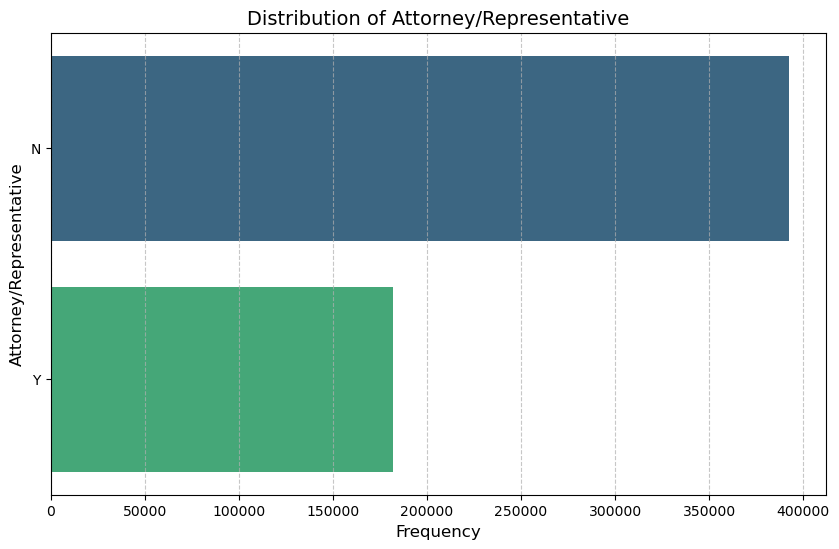

Interpretation for Attorney/Representative:
  - The most common category is 'N' with 392291 occurrences.
  - Other significant categories include:
    - 'Y' with 181735 occurrences.


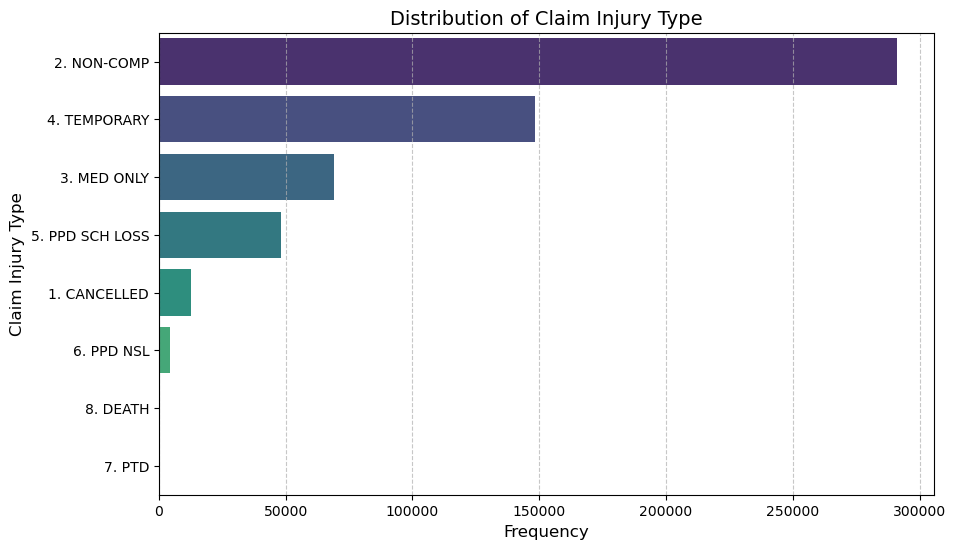

Interpretation for Claim Injury Type:
  - The most common category is '2. NON-COMP' with 291078 occurrences.
  - Other significant categories include:
    - '4. TEMPORARY' with 148507 occurrences.
    - '3. MED ONLY' with 68906 occurrences.


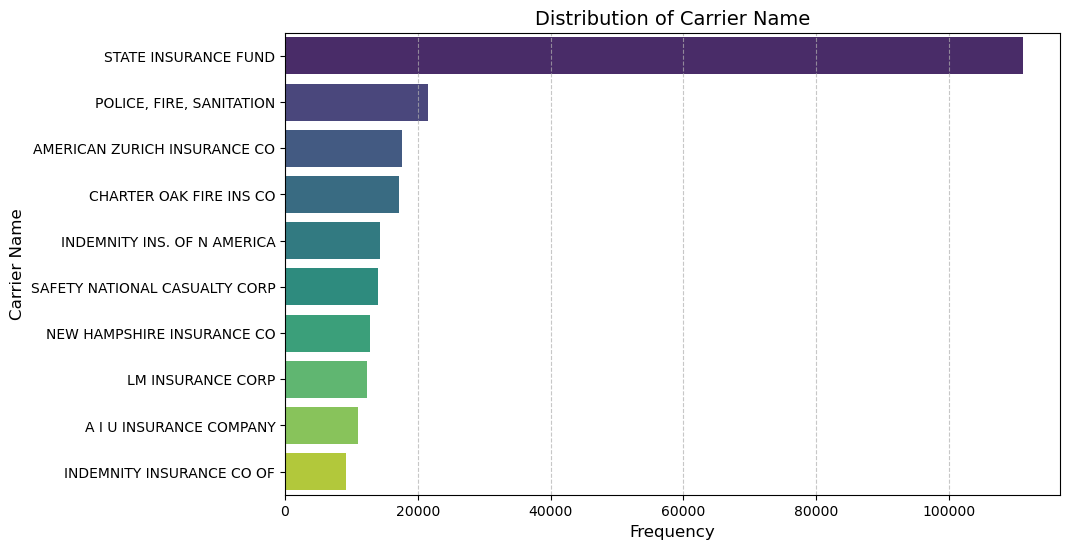

Interpretation for Carrier Name:
  - The most common category is 'STATE INSURANCE FUND' with 111144 occurrences.
  - Other significant categories include:
    - 'POLICE, FIRE, SANITATION' with 21602 occurrences.
    - 'AMERICAN ZURICH INSURANCE CO' with 17540 occurrences.


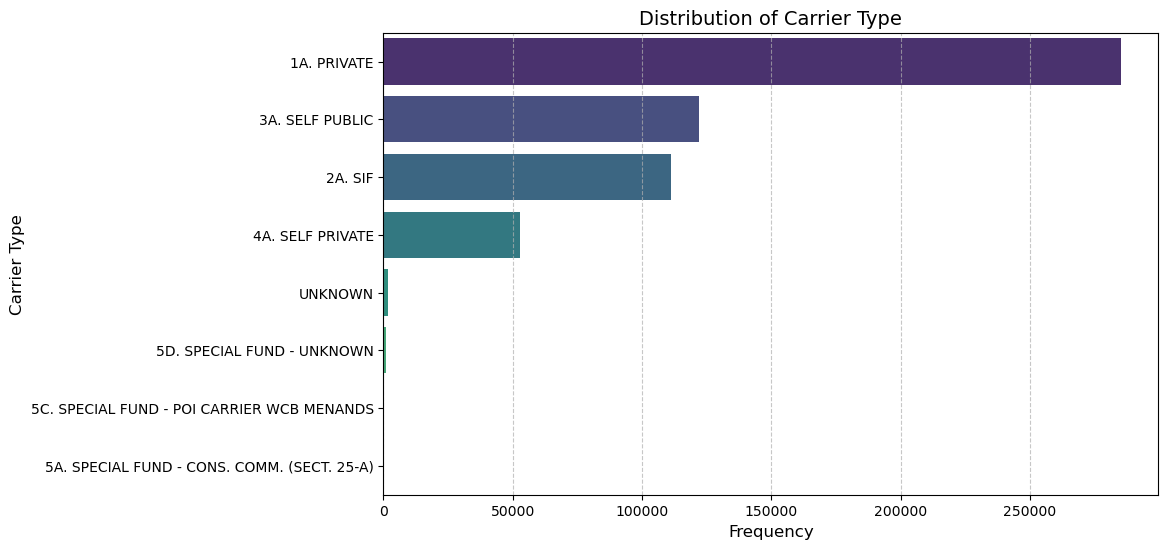

Interpretation for Carrier Type:
  - The most common category is '1A. PRIVATE' with 285368 occurrences.
  - Other significant categories include:
    - '3A. SELF PUBLIC' with 121920 occurrences.
    - '2A. SIF' with 111144 occurrences.


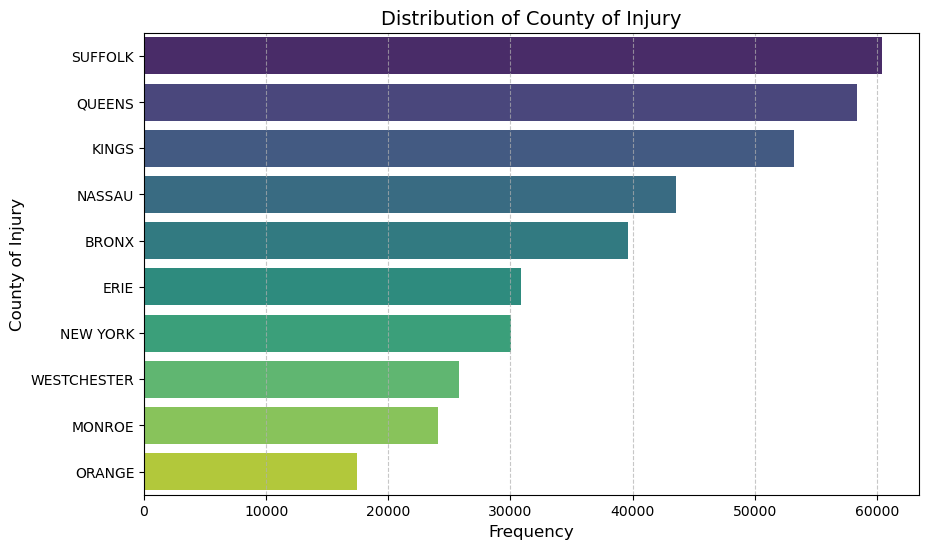

Interpretation for County of Injury:
  - The most common category is 'SUFFOLK' with 60430 occurrences.
  - Other significant categories include:
    - 'QUEENS' with 58333 occurrences.
    - 'KINGS' with 53207 occurrences.


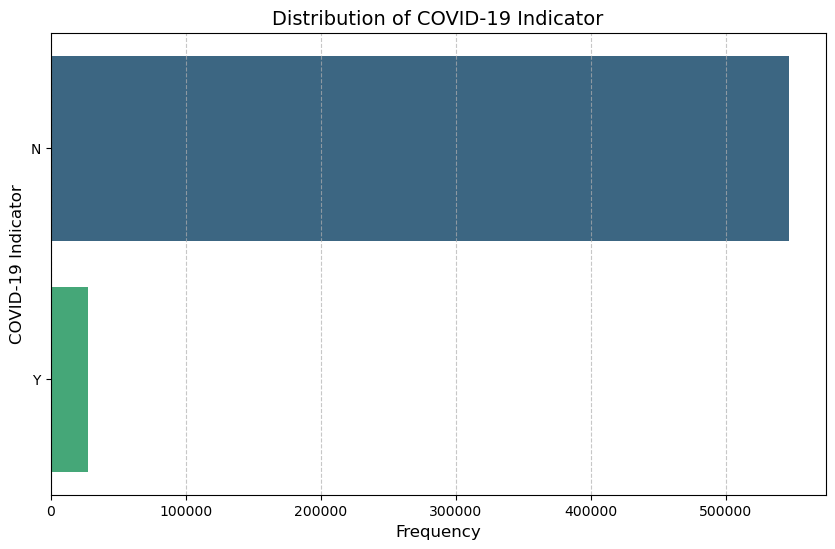

Interpretation for COVID-19 Indicator:
  - The most common category is 'N' with 546505 occurrences.
  - Other significant categories include:
    - 'Y' with 27521 occurrences.


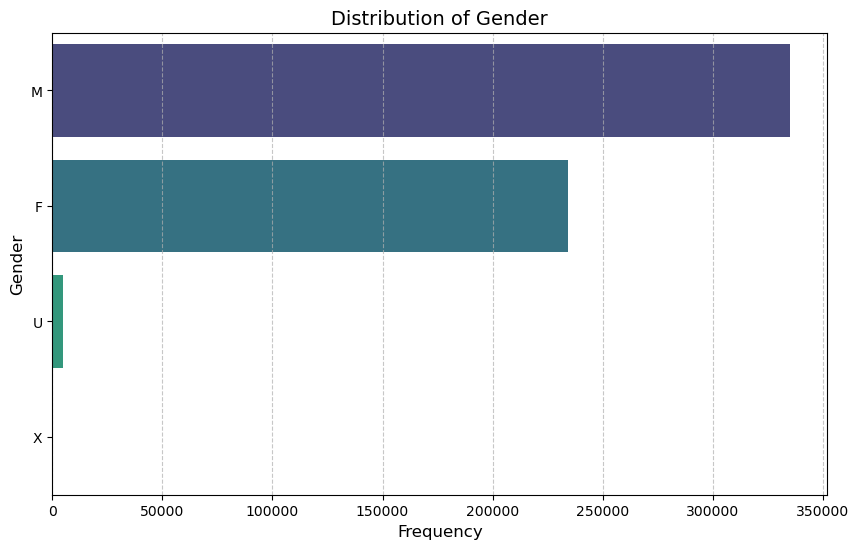

Interpretation for Gender:
  - The most common category is 'M' with 335218 occurrences.
  - Other significant categories include:
    - 'F' with 234051 occurrences.
    - 'U' with 4711 occurrences.


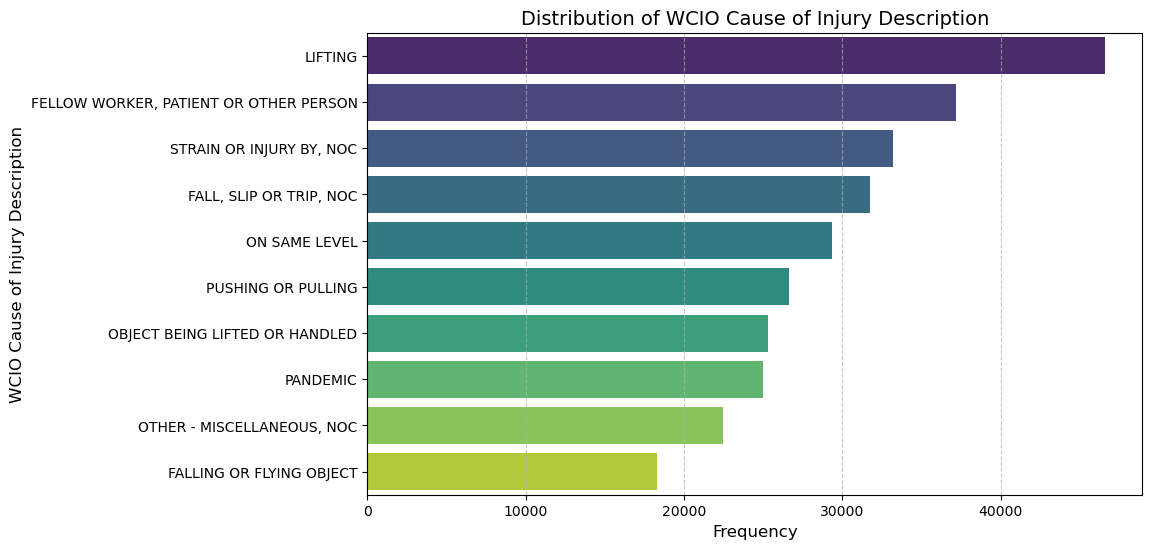

Interpretation for WCIO Cause of Injury Description:
  - The most common category is 'LIFTING' with 46610 occurrences.
  - Other significant categories include:
    - 'FELLOW WORKER, PATIENT OR OTHER PERSON' with 37153 occurrences.
    - 'STRAIN OR INJURY BY, NOC' with 33192 occurrences.


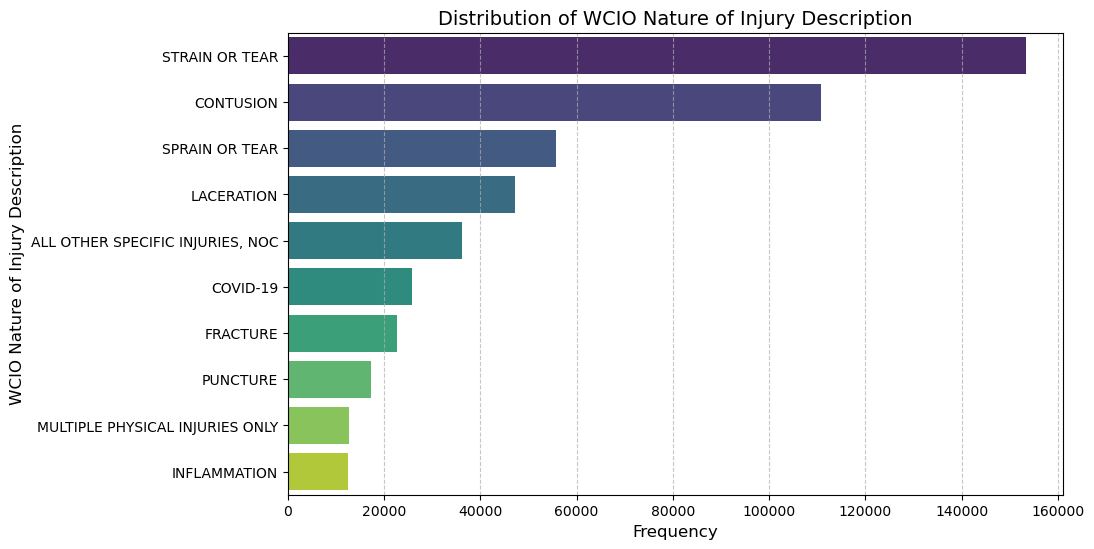

Interpretation for WCIO Nature of Injury Description:
  - The most common category is 'STRAIN OR TEAR' with 153373 occurrences.
  - Other significant categories include:
    - 'CONTUSION' with 110717 occurrences.
    - 'SPRAIN OR TEAR' with 55789 occurrences.


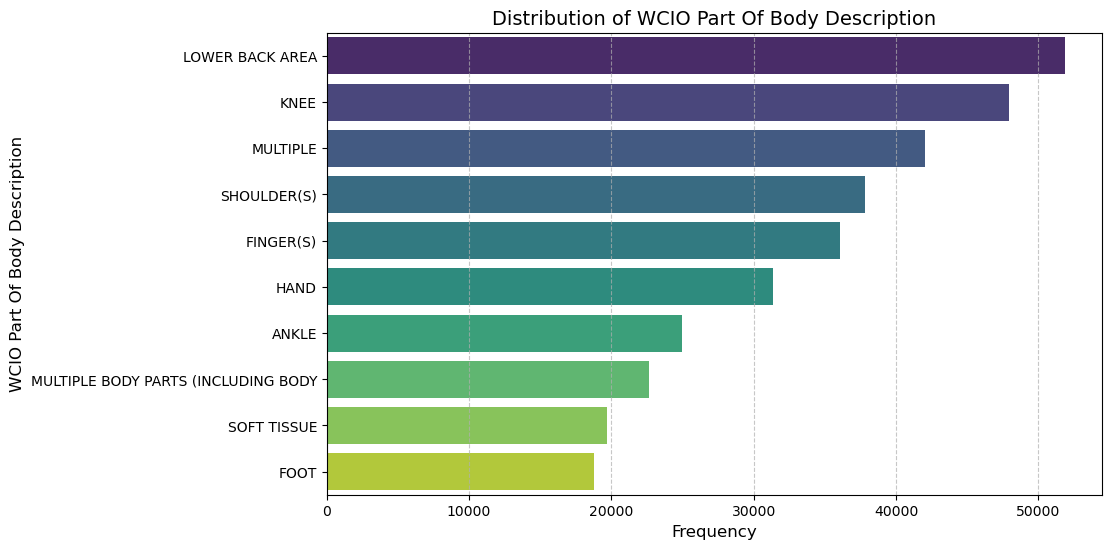

Interpretation for WCIO Part Of Body Description:
  - The most common category is 'LOWER BACK AREA' with 51862 occurrences.
  - Other significant categories include:
    - 'KNEE' with 47903 occurrences.
    - 'MULTIPLE' with 42011 occurrences.


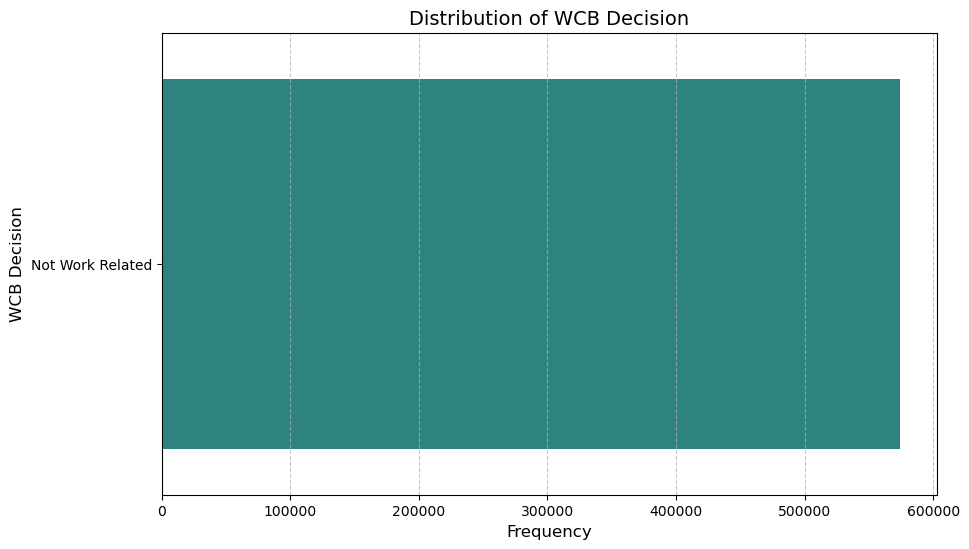

Interpretation for WCB Decision:
  - The most common category is 'Not Work Related' with 574026 occurrences.
  - Only one category available for analysis.


In [11]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    # Display the 10 most frequent categories
    data_to_plot = train_df[col].value_counts().head(10)
    
    sns.barplot(x=data_to_plot.values, y=data_to_plot.index, palette="viridis")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    # Dynamic interpretation
    print(f"Interpretation for {col}:")
    print(f"  - The most common category is '{data_to_plot.index[0]}' with {data_to_plot.values[0]} occurrences.")
    if len(data_to_plot) > 1:
        print(f"  - Other significant categories include:")
        for i in range(1, min(3, len(data_to_plot))):  # Limit to a maximum of 3 categories
            print(f"    - '{data_to_plot.index[i]}' with {data_to_plot.values[i]} occurrences.")
    else:
        print(f"  - Only one category available for analysis.")


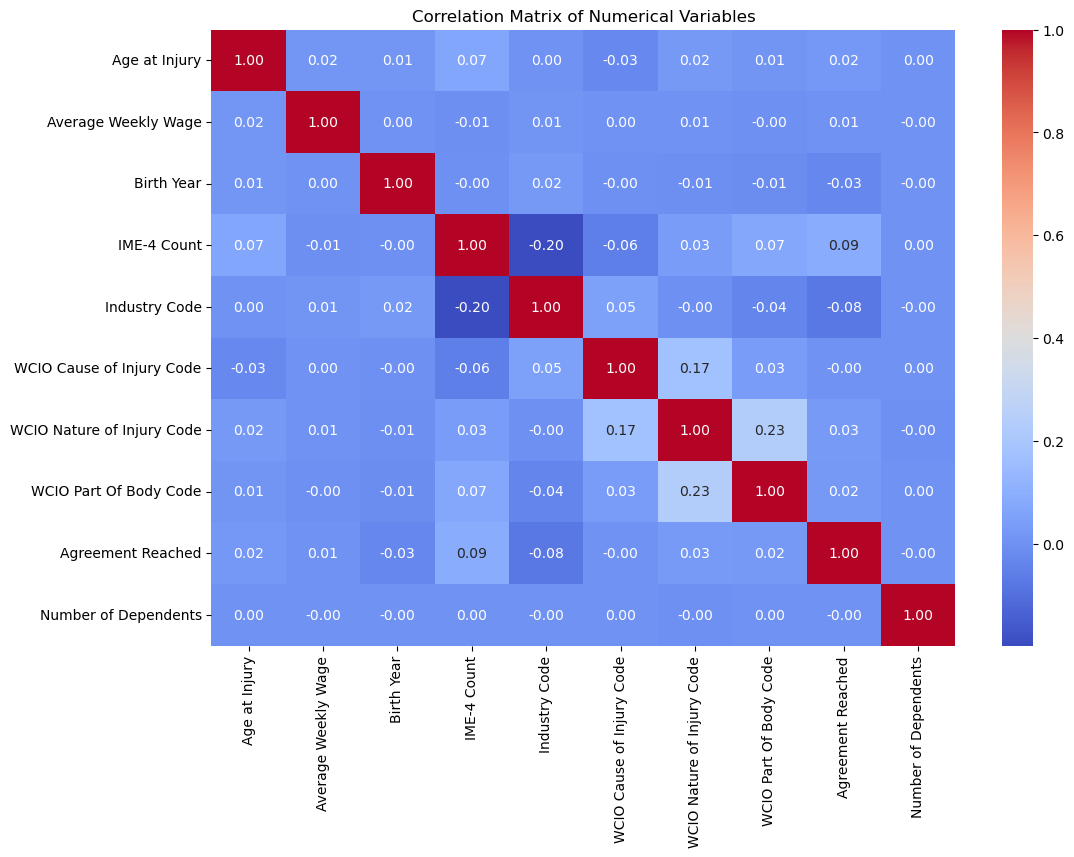

In [12]:
# Correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = train_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [13]:
# Correlation matrix for numerical variables
corr_matrix = train_df[numerical_cols].corr()
corr_matrix

Age at Injury  Average Weekly Wage  Birth Year  \
Age at Injury                    1.000000             0.016196    0.012615   
Average Weekly Wage              0.016196             1.000000    0.001928   
Birth Year                       0.012615             0.001928    1.000000   
IME-4 Count                      0.067650            -0.008122   -0.002276   
Industry Code                    0.001631             0.010695    0.024955   
WCIO Cause of Injury Code       -0.026822             0.002714   -0.004889   
WCIO Nature of Injury Code       0.023150             0.006149   -0.007972   
WCIO Part Of Body Code           0.007608            -0.002199   -0.013983   
Agreement Reached                0.019079             0.005610   -0.032254   
Number of Dependents             0.000461            -0.001098   -0.001303   

                            IME-4 Count  Industry Code  \
Age at Injury                  0.067650       0.001631   
Average Weekly Wage           -0.008122       0.010695   
Birth Year                    -0.002276       0.024955   
IME-4 Count                    1.000000      -0.198398   
Industry Code                 -0.198398       1.000000   
WCIO Cause of Injury Code     -0.056402       0.045934   
WCIO Nature of Injury Code     0.034234      -0.004306   
WCIO Part Of Body Code         0.069560      -0.035574   
Agreement Reached              0.090987      -0.076212   
Number of Dependents           0.000046      -0.000822   

                            WCIO Cause of Injury Code  \
Age at Injury                               -0.026822   
Average Weekly Wage                          0.002714   
Birth Year                                  -0.004889   
IME-4 Count                                 -0.056402   
Industry Code                                0.045934   
WCIO Cause of Injury Code                    1.000000   
WCIO Nature of Injury Code                   0.171642   
WCIO Part Of Body Code                       0.033642   
Agreement Reached                           -0.000178   
Number of Dependents                         0.000889   

                            WCIO Nature of Injury Code  \
Age at Injury                                 0.023150   
Average Weekly Wage                           0.006149   
Birth Year                                   -0.007972   
IME-4 Count                                   0.034234   
Industry Code                                -0.004306   
WCIO Cause of Injury Code                     0.171642   
WCIO Nature of Injury Code                    1.000000   
WCIO Part Of Body Code                        0.233692   
Agreement Reached                             0.029110   
Number of Dependents                         -0.002051   

                            WCIO Part Of Body Code  Agreement Reached  \
Age at Injury                             0.007608           0.019079   
Average Weekly Wage                      -0.002199           0.005610   
Birth Year                               -0.013983          -0.032254   
IME-4 Count                               0.069560           0.090987   
Industry Code                            -0.035574          -0.076212   
WCIO Cause of Injury Code                 0.033642          -0.000178   
WCIO Nature of Injury Code                0.233692           0.029110   
WCIO Part Of Body Code                    1.000000           0.024204   
Agreement Reached                         0.024204           1.000000   
Number of Dependents                      0.000670          -0.000189   

                            Number of Dependents  
Age at Injury                           0.000461  
Average Weekly Wage                    -0.001098  
Birth Year                             -0.001303  
IME-4 Count                             0.000046  
Industry Code                          -0.000822  
WCIO Cause of Injury Code               0.000889  
WCIO Nature of Injury Code             -0.002051  
WCIO Part Of Body Code                  0.000670  


No need to remove any columns based on multicollinearity since the correlations are all below the 0.7 threshold.

In [14]:
# sns.pairplot(train_df[numerical_cols].dropna())
# plt.show()

## Data Cleaning

### Handling inconsistent data

In [15]:
# List of columns to convert to datetime
date_columns = ['Accident Date', 'C-2 Date', 'Assembly Date', 'C-3 Date', 'First Hearing Date']

# Convert to datetime
for col in date_columns:
    train_df[col] = pd.to_datetime(train_df[col], errors='coerce')

# Check if conversion was successful
train_df[date_columns].dtypes

Accident Date         datetime64[ns]
C-2 Date              datetime64[ns]
Assembly Date         datetime64[ns]
C-3 Date              datetime64[ns]
First Hearing Date    datetime64[ns]
dtype: object

In [16]:
# List of categorical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

# Display unique values for each categorical column
for col in categorical_cols:
    unique_vals = train_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_vals}")
    print(f"Number of Unique Values: {len(unique_vals)}")
    print("\n")


Column: Alternative Dispute Resolution
Unique Values: ['N' nan 'Y' 'U']
Number of Unique Values: 4


Column: Attorney/Representative
Unique Values: ['N' 'Y' nan]
Number of Unique Values: 3


Column: Carrier Name
Unique Values: ['NEW HAMPSHIRE INSURANCE CO' 'ZURICH AMERICAN INSURANCE CO'
 'INDEMNITY INSURANCE CO OF' ... 'MARATHON CENTRAL SCHOOL DIST'
 'CAMBRIDGE CENTRAL SCHOOL' 'HERMON-DEKALB CENTRAL']
Number of Unique Values: 2047


Column: Carrier Type
Unique Values: ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of Unique Values: 9


Column: Claim Injury Type
Unique Values: ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of Unique Values: 9


Column: County of Injury
Unique Values: ['ST. LAWRENCE' 'WYOMING' 'ORANGE' nan 'DUTCHESS' 'SUFFOLK' 'ONONDAGA'
 

In [17]:
# Display counts of unique values for each categorical column
for col in categorical_cols:
    print(f"Value Counts for Categorical Column: {col}")
    print(train_df[col].value_counts())
    print("\n")

Value Counts for Categorical Column: Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64


Value Counts for Categorical Column: Attorney/Representative
N    392291
Y    181735
Name: Attorney/Representative, dtype: int64


Value Counts for Categorical Column: Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: Carrier Name, Length: 2046, dtype: int64


Value Counts for Categorical Column: Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                   

 - There are wrong values in the Zip Code feature
 - We should remove the WCB Decision feature because it only has a single value, "Not Work Related".

In [18]:
# List of numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Display unique values for each numerical column
for col in numerical_cols:
    unique_vals = train_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_vals}")
    print(f"Number of Unique Values: {len(unique_vals)}")
    print("\n")

Column: Age at Injury
Unique Values: [ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Number of Unique Values: 109


Column: Average Weekly Wage
Unique Values: [   0.   1745.93 1434.8  ...  371.02 2277.28 1008.86]
Number of Unique Values: 120025


Column: Birth Year
Unique Values: [1988. 1973. 1979.   nan 1958. 1952. 1971. 1986. 1964.    0. 1956. 1984.
 1965. 1987. 1985. 1981. 1983. 1980. 1975. 1963. 1990. 1968. 1959. 1970.
 1969. 2001. 1961. 1995. 1974. 1967. 1972. 1994. 1996. 1997. 1954. 

In [19]:
# List of numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Display counts of unique values for each numerical column
for col in numerical_cols:
    print(f"Value Counts for Numerical Column: {col}")
    print(train_df[col].value_counts())
    print("\n")


Value Counts for Numerical Column: Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     13657
51.0     13486
         ...  
115.0        1
5.0          1
104.0        1
113.0        1
114.0        1
Name: Age at Injury, Length: 108, dtype: int64


Value Counts for Numerical Column: Average Weekly Wage
0.00       335450
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: Average Weekly Wage, Length: 120024, dtype: int64


Value Counts for Numerical Column: Birth Year
0.0       25081
1990.0    13180
1989.0    12867
1970.0    12527
1988.0    12463
          ...  
2013.0        1
1907.0        1
1911.0        1
1921.0        1
1909.0        1
Name: Birth Year, Length: 107, dtype: int64


Value Counts for Numerical Column: Claim Identifier
292668076    2
5393875      1
5906249      1
5906224      1
5906957      1
            ..
5650784      1
5

- In the WCIO Part of the Body Code feature the value -9 will be replaced with NaN allowing us to handle it using imputation strategies later or remove those rows if needed.
- Values equal to 0 in Age at Injury and Birth Year will be corrected or removed

In [20]:
# Convert to a list and display in non-truncated format
pd.set_option('display.max_rows', None) # Set pandas to display all rows

# Display unique “Carrier Name” values
carrier_name_unique = train_df['Carrier Name'].unique()
print("Unique values of 'Carrier Name':")
print(pd.Series(carrier_name_unique))

# Display unique values of "Carrier Type"
carrier_type_unique = train_df['Carrier Type'].unique()
print("\nUnique values of 'Carrier Type':")
print(pd.Series(carrier_type_unique))

# Restore the default display if necessary
pd.reset_option('display.max_rows')

Unique values of 'Carrier Name':
0           NEW HAMPSHIRE INSURANCE CO
1         ZURICH AMERICAN INSURANCE CO
2            INDEMNITY INSURANCE CO OF
3                                  NaN
4                 STATE INSURANCE FUND
5          INDEMNITY INS. OF N AMERICA
6                    LM INSURANCE CORP
7             ROCHESTER, UNIVERSITY OF
8         AMERICAN ZURICH INSURANCE CO
9                NYC TRANSIT AUTHORITY
10           WAL-MART ASSOCIATES, INC.
11               PROPERTY AND CASUALTY
12       ZURICH AMERICAN INSURANCE CO.
13             HEALTH & HOSPITAL CORP.
14       SAFETY NATIONAL CASUALTY CORP
15          SOMPO AMERICA INSURANCE CO
16       PROPERTY & CASUALTY INSURANCE
17                XL INSURANCE AMERICA
18               NYU LANGONE HOSPITALS
19          OLD REPUBLIC INSURANCE CO.
20        UNIVERSITY OF ROCHESTER 1979
21             BATH & BODY WORKS, INC.
22              TWIN CITY FIRE INS CO.
23        SELECTIVE INSURANCE CO OF NY
24        SOMPO AMERICA  FIRE &

- No unusual value

In [21]:
# Check for missing values in both features
missing_values = train_df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isnull().sum()

# Print the results
print("Missing values in each feature:\n", missing_values)


Missing values in each feature:
 WCIO Part Of Body Code           36527
WCIO Part Of Body Description    36527
dtype: int64


In [22]:
# Replace -9 with NaN in 'WCIO Part Of Body Code'
train_df['WCIO Part Of Body Code'] = train_df['WCIO Part Of Body Code'].replace(-9, np.nan)

# Replace the corresponding 'WCIO Part Of Body Description' with NaN
train_df.loc[train_df['WCIO Part Of Body Code'].isna(), 'WCIO Part Of Body Description'] = np.nan

In [23]:
# Check for missing values in both features
missing_values = train_df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isnull().sum()

# Print the results
print("Missing values in each feature:\n", missing_values)


Missing values in each feature:
 WCIO Part Of Body Code           78538
WCIO Part Of Body Description    78538
dtype: int64


In [24]:
# Select Zip Codes that are not a 5-digit numeric format and are not NaN
invalid_zip_codes = train_df[
    train_df['Zip Code'].notna() &  # Ensure it's not a missing value
    ~train_df['Zip Code'].astype(str).str.match(r'^\d{5}$')  # Check if it doesn't match 5-digit format
]['Zip Code']

# Count the number of invalid Zip Codes
invalid_zip_count = invalid_zip_codes.count()

# Calculate the percentage of invalid Zip Codes
total_zip_count = train_df['Zip Code'].notna().sum()
invalid_zip_percentage = (invalid_zip_count / total_zip_count) * 100

# Display results
print(f"Count of invalid Zip Codes: {invalid_zip_count}")
print(f"Percentage of invalid Zip Codes: {invalid_zip_percentage:.2f}%")


Count of invalid Zip Codes: 15374
Percentage of invalid Zip Codes: 2.82%


In [25]:
# Filter the rows to keep only those with valid or missing Zip Codes
train_df = train_df[
    train_df['Zip Code'].isna() |  # Keep rows where Zip Code is NaN
    train_df['Zip Code'].astype(str).str.match(r'^\d{5}$')  # Keep rows with 5-digit Zip Code
]


In [26]:
train_df['Zip Code']

0         13662
1         14569
2         12589
3           NaN
4         12603
          ...  
593466      NaN
593467    12779
593468      NaN
593469      NaN
593470      NaN
Name: Zip Code, Length: 578097, dtype: object

In [27]:
# Select Zip Codes that are not a 5-digit numeric format and are not NaN
invalid_zip_codes = train_df[
    train_df['Zip Code'].notna() &  # Ensure it's not a missing value
    ~train_df['Zip Code'].astype(str).str.match(r'^\d{5}$')  # Check if it doesn't match 5-digit format
]['Zip Code']

# Count the number of invalid Zip Codes
invalid_zip_count = invalid_zip_codes.count()

# Calculate the percentage of invalid Zip Codes
total_zip_count = train_df['Zip Code'].notna().sum()
invalid_zip_percentage = (invalid_zip_count / total_zip_count) * 100

# Display results
print(f"Count of invalid Zip Codes: {invalid_zip_count}")
print(f"Percentage of invalid Zip Codes: {invalid_zip_percentage:.2f}%")

Count of invalid Zip Codes: 0
Percentage of invalid Zip Codes: 0.00%


In [28]:
#Transform Zip Code feature from object type to numeric
train_df['Zip Code'] = pd.to_numeric(train_df['Zip Code'], errors='ignore')

In [29]:
# Drop the 'WCB Decision' column
train_df = train_df.drop(columns=['WCB Decision'])

 - We should remove the WCB Decision feature because it only has a single value, "Not Work Related".

In [30]:
# Check for rows with missing values in 'Industry Code' but not in 'Industry Code Description'
missing_industry_code = train_df[train_df['Industry Code'].isnull() & train_df['Industry Code Description'].notnull()]

# Display the count of such rows
count_missing = missing_industry_code.shape[0]
print(f'Number of rows with missing Industry Code but not in Industry Code Description: {count_missing}')

# If no such rows exist, drop the 'Industry Code Description' column
if count_missing == 0:
    train_df.drop(columns=['Industry Code Description'], inplace=True)
    print("Industry Code Description column removed.")
else:
    print("Industry Code Description column retained.")

Number of rows with missing Industry Code but not in Industry Code Description: 0
Industry Code Description column removed.


In [31]:
# Check for rows with missing values in 'WCIO Cause of Injury Code' but not in 'WCIO Cause of Injury Description'
missing_cause_of_injury = train_df[train_df['WCIO Cause of Injury Code'].isnull() & train_df['WCIO Cause of Injury Description'].notnull()]

# Display the count of such rows
count_missing = missing_cause_of_injury.shape[0]
print(f'Number of rows with missing WCIO Cause of Injury Code but not in WCIO Cause of Injury Description: {count_missing}')

# If no such rows exist, drop the 'WCIO Cause of Injury Description' column
if count_missing == 0:
    train_df.drop(columns=['WCIO Cause of Injury Description'], inplace=True)
    print("WCIO Cause of Injury Description column removed.")
else:
    print("WCIO Cause of Injury Description column retained.")

Number of rows with missing WCIO Cause of Injury Code but not in WCIO Cause of Injury Description: 0
WCIO Cause of Injury Description column removed.


In [32]:
# Check for rows with missing values in 'WCIO Nature of Injury Code' but not in 'WCIO Nature of Injury Description'
missing_nature_of_injury = train_df[train_df['WCIO Nature of Injury Code'].isnull() & train_df['WCIO Nature of Injury Description'].notnull()]

# Display the count of such rows
count_missing = missing_nature_of_injury.shape[0]
print(f'Number of rows with missing WCIO Nature of Injury Code but not in WCIO Nature of Injury Description: {count_missing}')

# If no such rows exist, drop the 'WCIO Nature of Injury Description' column
if count_missing == 0:
    train_df.drop(columns=['WCIO Nature of Injury Description'], inplace=True)
    print("WCIO Nature of Injury Description column removed.")
else:
    print("WCIO Nature of Injury Description column retained.")

Number of rows with missing WCIO Nature of Injury Code but not in WCIO Nature of Injury Description: 0
WCIO Nature of Injury Description column removed.


In [33]:
# Check for rows with missing values in 'WCIO Part Of Body Code' but not in 'WCIO Part Of Body Description'
missing_part_of_body = train_df[train_df['WCIO Part Of Body Code'].isnull() & train_df['WCIO Part Of Body Description'].notnull()]

# Display the count of such rows
count_missing = missing_part_of_body.shape[0]
print(f'Number of rows with missing WCIO Part Of Body Code but not in WCIO Part Of Body Description: {count_missing}')

# If no such rows exist, drop the 'WCIO Part Of Body Description' column
if count_missing == 0:
    train_df.drop(columns=['WCIO Part Of Body Description'], inplace=True)
    print("WCIO Part Of Body Description column removed.")
else:
    print("WCIO Part Of Body Description column retained.")

Number of rows with missing WCIO Part Of Body Code but not in WCIO Part Of Body Description: 0
WCIO Part Of Body Description column removed.


- Since we have the features with the codes, we don't need to have the features with the descriptions because it's exactly the same data. We just had to check that there were no missing values in the features with codes to see if we needed the description features to impute the missing values

In [34]:
# Remove rows where both 'Age at Injury' and 'Birth Year' are 0
train_df = train_df[~((train_df['Age at Injury'] == 0) & (train_df['Birth Year'] == 0))]

In [35]:
# Replace 'Age at Injury' values of 0 with NaN
train_df['Age at Injury'] = train_df['Age at Injury'].replace(0, np.nan)

# Replace 'Birth Year' values of 0 with NaN
train_df['Birth Year'] = train_df['Birth Year'].replace(0, np.nan)

- Rows containing values that are 0 in only one of these features will not be removed because the values will be imputed after

## Data Split

In [36]:
train_df['Claim Injury Type'].isnull().sum()

19445

In order to do the split we dont want rows where the target variable is null, so we remove those rows

In [37]:
train_df = train_df.dropna(subset=['Claim Injury Type'])

In [38]:
#defining target variable
X = train_df.drop('Claim Injury Type', axis = 1)
y = train_df['Claim Injury Type']


In [39]:
#split it into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y,
                                                  shuffle = True)

### Missing Values

In [40]:
missing_percentages = X_train.isnull().mean() * 100
missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_summary)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            76.826840
First Hearing Date                     73.669126
C-3 Date                               67.387567
WCIO Part Of Body Code                 10.176167
Birth Year                              9.126760
Zip Code                                5.110021
Average Weekly Wage                     4.999949
WCIO Nature of Injury Code              2.550649
WCIO Cause of Injury Code               2.546543
C-2 Date                                2.379254
Industry Code                           1.636202
Age at Injury                           0.627591
Accident Date                           0.595776
dtype: float64


In [41]:
# Count the number of missing values in each row
missing_counts = X_train.isnull().sum(axis=1)

# Create a summary of how many rows have each count of missing values
missing_summary = missing_counts.value_counts().sort_index()

# Convert counts to percentage
total_rows = len(X_train)
missing_percentage = (missing_summary / total_rows) * 100

# Create a new DataFrame for better formatting
summary_df = pd.DataFrame({
    'Row Count': missing_summary,
    'Percentage': missing_percentage
}).reset_index()

# Rename the columns for clarity
summary_df.columns = ['Missing Values', 'Row Count', 'Percentage']

# Print the summary in the desired format
for idx, row in summary_df.iterrows():
    print(f"Rows with {row['Missing Values']} missing value(s): {row['Row Count']} {row['Percentage']:.2f}%")

Rows with 1.0 missing value(s): 38896.0 9.98%
Rows with 2.0 missing value(s): 46549.0 11.94%
Rows with 3.0 missing value(s): 54934.0 14.09%
Rows with 4.0 missing value(s): 186590.0 47.88%
Rows with 5.0 missing value(s): 48274.0 12.39%
Rows with 6.0 missing value(s): 4921.0 1.26%
Rows with 7.0 missing value(s): 2019.0 0.52%
Rows with 8.0 missing value(s): 3686.0 0.95%
Rows with 9.0 missing value(s): 2747.0 0.70%
Rows with 10.0 missing value(s): 967.0 0.25%
Rows with 11.0 missing value(s): 147.0 0.04%
Rows with 12.0 missing value(s): 14.0 0.00%


In [42]:
# List of columns to drop
columns_to_drop = ['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date']

# Drop the columns
X_train = X_train.drop(columns=columns_to_drop)

X_val = X_val.drop(columns=columns_to_drop)

# Check the remaining columns to confirm the drop
print(X_train.columns)
print(X_val.columns)

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')
Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of

- Features with very high percentages of missing values were removed
- The feature "First Hearing Date," despite having a high percentage of missing values, will be transformed later into a binary column during the feature engineering phase to indicate whether the hearing date has occurred yet or not

In [43]:
# Count the number of missing values in each row
missing_counts = X_train.isnull().sum(axis=1)

# Create a summary of how many rows have each count of missing values
missing_summary = missing_counts.value_counts().sort_index()

# Convert counts to percentage
total_rows = len(X_train)
missing_percentage = (missing_summary / total_rows) * 100

# Create a new DataFrame for better formatting
summary_df = pd.DataFrame({
    'Row Count': missing_summary,
    'Percentage': missing_percentage
}).reset_index()

# Rename the columns for clarity
summary_df.columns = ['Missing Values', 'Row Count', 'Percentage']

# Print the summary in the desired format
for idx, row in summary_df.iterrows():
    print(f"Rows with {row['Missing Values']} missing value(s): {row['Row Count']} {row['Percentage']:.2f}%")

Rows with 0.0 missing value(s): 72830.0 18.69%
Rows with 1.0 missing value(s): 237024.0 60.82%
Rows with 2.0 missing value(s): 63004.0 16.17%
Rows with 3.0 missing value(s): 6794.0 1.74%
Rows with 4.0 missing value(s): 818.0 0.21%
Rows with 5.0 missing value(s): 2994.0 0.77%
Rows with 6.0 missing value(s): 4308.0 1.11%
Rows with 7.0 missing value(s): 1319.0 0.34%
Rows with 8.0 missing value(s): 577.0 0.15%
Rows with 9.0 missing value(s): 73.0 0.02%
Rows with 10.0 missing value(s): 3.0 0.00%


In [44]:
# Drop rows that do not have at least 2 of this 3 features with values
X_train = X_train.dropna(subset=['Birth Year', 'Accident Date', 'Age at Injury'], thresh=2)

# Get the remaining indices in X_train
remaining_indices_train = X_train.index

# Filter y_train to keep only rows corresponding to the remaining indices
y_train = y_train.loc[remaining_indices_train]

# Impute Birth Year where it's missing
X_train['Birth Year'] = X_train.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if pd.isnull(row['Birth Year']) and not pd.isnull(row['Age at Injury']) else row['Birth Year'], 
    axis=1
)

# Impute Age at Injury where it's missing
X_train['Age at Injury'] = X_train.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if pd.isnull(row['Age at Injury']) and not pd.isnull(row['Birth Year']) else row['Age at Injury'], 
    axis=1
)

# Check the results
print(X_train[['Birth Year', 'Age at Injury']].isnull().sum())  # Ensure no null values remain


# Drop rows that do not have at least 2 of this 3 features with values
X_val = X_val.dropna(subset=['Birth Year', 'Accident Date', 'Age at Injury'], thresh=2)

# Get the remaining indices in X_val
remaining_indices_val = X_val.index

# Filter y_train to keep only rows corresponding to the remaining indices
y_val = y_val.loc[remaining_indices_val]

# Impute Birth Year where it's missing
X_val['Birth Year'] = X_val.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if pd.isnull(row['Birth Year']) and not pd.isnull(row['Age at Injury']) else row['Birth Year'], 
    axis=1
)

# Impute Age at Injury where it's missing
X_val['Age at Injury'] = X_val.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if pd.isnull(row['Age at Injury']) and not pd.isnull(row['Birth Year']) else row['Age at Injury'], 
    axis=1
)

# Check the results
print(X_val[['Birth Year', 'Age at Injury']].isnull().sum())  # Ensure no null values remain

Birth Year       0
Age at Injury    0
dtype: int64
Birth Year       0
Age at Injury    0
dtype: int64


- Remove rows that do not have values in at least 2 of the following 3 features: "Age at Injury", "Birth Year" and "Accident Date". Impossible to know Age/Birth Year 

- Fill in missing values by calculating Age at Injury or Birth Year using Accident Date. 

**Accident Date - Age at Injury**	&emsp;OR &emsp;	**Accident Date – Birth Year**

In [45]:
# Correct values in 'Birth Year' where it's 0
X_train['Birth Year'] = X_train.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if row['Birth Year'] == 0 and row['Age at Injury'] != 0 else row['Birth Year'],
    axis=1
)

# Correct values in 'Age at Injury' where it's 0
X_train['Age at Injury'] = X_train.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if row['Age at Injury'] == 0 and row['Birth Year'] != 0 else row['Age at Injury'],
    axis=1
)

# Correct values in 'Birth Year' where it's 0
X_val['Birth Year'] = X_val.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if row['Birth Year'] == 0 and row['Age at Injury'] != 0 else row['Birth Year'],
    axis=1
)

# Correct values in 'Age at Injury' where it's 0
X_val['Age at Injury'] = X_val.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if row['Age at Injury'] == 0 and row['Birth Year'] != 0 else row['Age at Injury'],
    axis=1
)

- Correct the values of 0 in Age at Injury and Birth Year using Accident Date. 

In [46]:
missing_percentages = X_train.isnull().mean() * 100
missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_summary)

First Hearing Date            73.747744
WCIO Part Of Body Code         9.951441
Zip Code                       5.110220
Average Weekly Wage            4.997406
WCIO Nature of Injury Code     2.300438
WCIO Cause of Injury Code      2.297598
C-2 Date                       2.138315
Industry Code                  1.487759
dtype: float64


In [47]:
# Drop rows with missing values in 'Industry Code' 
X_train.dropna(subset=['Industry Code'], inplace=True)
y_train = y_train.loc[X_train.index]

# Drop rows with missing values in 'Industry Code' 
X_val.dropna(subset=['Industry Code'], inplace=True)
y_val = y_val.loc[X_val.index]

- As there is a low percentage of missing values in the Industry Code feature, we decided to remove the rows with missing values

In [48]:
# Calculate the median for each group in X_train
medians = X_train.groupby(['Age at Injury', 'Industry Code', 'Gender'])['Average Weekly Wage'].median()

# Fill missing values in X_train using the group-based medians
X_train['Average Weekly Wage'] = X_train.groupby(['Age at Injury', 'Industry Code', 'Gender'])['Average Weekly Wage'].transform(
    lambda x: x.fillna(medians.loc[x.name])
)

# Calculate the overall median from the entire training set for use in X_val
global_median = X_train['Average Weekly Wage'].median()

# Fill missing values in X_val with group-based medians or the global median if the group is not in X_train
X_val['Average Weekly Wage'] = X_val.groupby(['Age at Injury', 'Industry Code', 'Gender'])['Average Weekly Wage'].transform(
    lambda x: x.fillna(medians.get(x.name, global_median))
)

# Check for any remaining missing values in X_train and X_val
print('Missing values in X_train:', X_train['Average Weekly Wage'].isnull().sum())
print('Missing values in X_val:', X_val['Average Weekly Wage'].isnull().sum())

Missing values in X_train: 30
Missing values in X_val: 0


To impute the missing values of Average Weekely Wage we calculated the mean of groups based on the same Age at Injury, Industry Code and Gender.
We then used those means to also fill the missing values in X_val.
For groups that only exist in X_val and because of that the mean of that group wasnt calculated on X_train, we used the global mean of all groups.

In [49]:
# Impute remaining missing values in 'Average Weekly Wage' based on 'Age at Injury'
X_train['Average Weekly Wage'] = X_train.groupby('Age at Injury')['Average Weekly Wage'].transform(lambda x: x.fillna(x.median()))

# Check how many missing values are left
X_train['Average Weekly Wage'].isnull().sum()

0

In [50]:
# Calculate the mode for each group in X_train
mode_values = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Calculate the global mode of 'Zip Code'
global_mode = X_train['Zip Code'].mode()[0] if not X_train['Zip Code'].mode().empty else None

# Fill missing values in X_train using group-based modes
X_train['Zip Code'] = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].transform(
    lambda x: x.fillna(mode_values.loc[x.name])
)

# Fill missing values in X_val with group-based modes or the global mode as a fallback
X_val['Zip Code'] = X_val.groupby(['County of Injury', 'District Name'])['Zip Code'].transform(
    lambda x: x.fillna(mode_values.get(x.name, global_mode))
)

# Check for any remaining missing values
print('Missing values in X_train:', X_train['Zip Code'].isnull().sum())
print('Missing values in X_val:', X_val['Zip Code'].isnull().sum())


Missing values in X_train: 3
Missing values in X_val: 0


To impute the missing values of ZIP Code we calculated the mode of groups based on the same County of Injury and District Name
We then used those means to also fill the missing values in X_val.
For groups that only exist in X_val and because of that the mode of that group wasnt calculated on X_train, we used the global mode of all groups.

In [51]:
# Using transform to fill remaining missing 'Zip Code' with the most common value (mode) within each group based on 'District Name'
X_train['Zip Code'] = X_train.groupby('District Name')['Zip Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# Checking if there are any remaining missing values in 'Zip Code'
X_train['Zip Code'].isnull().sum()

0

- Fill the remaining missing values in "Zip Code" based on the mode of the "Zip Code" within each "District Name" only, because District Name typically has smaller areas compared to County of Injury in real life.

In [52]:
missing_percentages = X_train.isnull().mean() * 100
missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_summary)

First Hearing Date            73.507461
WCIO Part Of Body Code         8.776514
WCIO Cause of Injury Code      0.986902
WCIO Nature of Injury Code     0.985068
C-2 Date                       0.899638
dtype: float64


In [53]:
# Calculate the mode for each group in X_train
mode_values = X_train.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Calculate the global mode of 'WCIO Part of Body Code'
global_mode = X_train['WCIO Part Of Body Code'].mode()[0] if not X_train['WCIO Part Of Body Code'].mode().empty else np.nan

# Fill missing values in X_train using group-based modes
X_train['WCIO Part Of Body Code'] = X_train.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].transform(
    lambda x: x.fillna(mode_values.loc[x.name])
)

# Fill missing values in X_val with group-based modes or the global mode as a fallback
X_val['WCIO Part Of Body Code'] = X_val.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].transform(
    lambda x: x.fillna(mode_values.get(x.name, global_mode))
)

# Check for any remaining missing values
print('Missing values in X_train:', X_train['WCIO Part Of Body Code'].isnull().sum())
print('Missing values in X_val:', X_val['WCIO Part Of Body Code'].isnull().sum())


Missing values in X_train: 3817
Missing values in X_val: 1663


To impute the missing values of WCIO Part Of Body Code we calculated the mode of groups based on the same WCIO Cause of Injury Code and WCIO Nature of Injury Code. We then used those means to also fill the missing values in X_val. For groups that only exist in X_val and because of that the mode of that group wasnt calculated on X_train, we used the global mode of all groups from X_train.

In [54]:
missing_percentages = X_train.isnull().mean() * 100
missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_summary)

First Hearing Date            73.507461
WCIO Part Of Body Code         1.000267
WCIO Cause of Injury Code      0.986902
WCIO Nature of Injury Code     0.985068
C-2 Date                       0.899638
dtype: float64


In [55]:
# Checking for missing values in the specified features
missing_mask = X_train[['WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code']].isnull()

# Counting the number of missing features per row
missing_counts = missing_mask.sum(axis=1)

# Filtering rows that have at least one missing value
rows_with_missing = missing_counts[missing_counts > 0]

# Calculating the total number of rows with any missing values
total_missing_rows = len(rows_with_missing)

# Counting the occurrences of rows with missing values
missing_all_three = (missing_counts == 3).sum()
missing_two = (missing_counts == 2).sum()
missing_one = (missing_counts == 1).sum()

# Calculating percentages
percentage_missing_all_three = (missing_all_three / total_missing_rows) * 100
percentage_missing_two = (missing_two / total_missing_rows) * 100
percentage_missing_one = (missing_one / total_missing_rows) * 100

# Creating a summary of results
missing_summary = {
    "Percentage of rows with missing values in all three features": percentage_missing_all_three,
    "Percentage of rows with missing values in two features": percentage_missing_two,
    "Percentage of rows with missing values in one feature": percentage_missing_one
}

missing_summary

{'Percentage of rows with missing values in all three features': 97.98270893371757,
 'Percentage of rows with missing values in two features': 1.1789363374377784,
 'Percentage of rows with missing values in one feature': 0.8383547288446425}

In [56]:
# Dropping rows with missing values in the specified features
X_train = X_train.dropna(subset=['WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code'])
y_train = y_train.loc[X_train.index]

X_val = X_val.dropna(subset=['WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code'])
y_val = y_val.loc[X_val.index]

- There are many rows that have more than 2 missing value between the three features “WCIO Part Of Body Code,” “WCIO Nature of Injury Code,” and “WCIO Cause of Injury Code” and so we thought it best not to impute the missing values by grouping them together. As there is a low percentage of missing values in these features, we chose to remove

In [57]:
missing_percentages = X_train.isnull().mean() * 100
missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_summary)

First Hearing Date    73.336669
C-2 Date               0.001853
dtype: float64


In [58]:
# Dropping rows with missing values in the specified features
X_train = X_train.dropna(subset=['C-2 Date'])
y_train = y_train.loc[X_train.index]

X_val = X_val.dropna(subset=['C-2 Date'])
y_val = y_val.loc[X_val.index]

- As there is a low percentage of missing values in the "C-2 Date" feature, we decided to remove the rows with missing values

### Outliers

There are three numerical features we need to study the outliers of: 
- Age at Injury
- Birth Year
- Average Weekly Wage

In [59]:
# Display basic statistics
print("Summary statistics for 'Age at Injury':")
display(X_train['Age at Injury'].describe())

print("\nSummary statistics for 'Birth Year':")
display(X_train['Birth Year'].describe())

print("\nSummary statistics for 'Average Weekly Wage':")
display(X_train['Average Weekly Wage'].describe())

Summary statistics for 'Age at Injury':


count    377774.000000
mean         42.518196
std          13.760530
min           1.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         119.000000
Name: Age at Injury, dtype: float64


Summary statistics for 'Birth Year':


count    377774.000000
mean       1977.923475
std          13.848635
min        1900.000000
25%        1967.000000
50%        1978.000000
75%        1990.000000
max        2018.000000
Name: Birth Year, dtype: float64


Summary statistics for 'Average Weekly Wage':


count    3.777740e+05
mean     4.976972e+02
std      7.277553e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.318875e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

Age at Injury:  
The minimum value is 1 and max value is 120 which may indicate possible outliers. 

Year of birth Values such as 0 (impossible birth year) or very high birth years (close to 2018) may be incorrect registrations. 

Average weekly salary:
The average salary has a large variation with an extreme value of up to 2.8 million. Normally, we will see salary levels that are far lower, so values above the 95th percentile can also be outliers. To reduce skewness of the distribution we will use a log transformation. after that we can cap the high values (outliers).


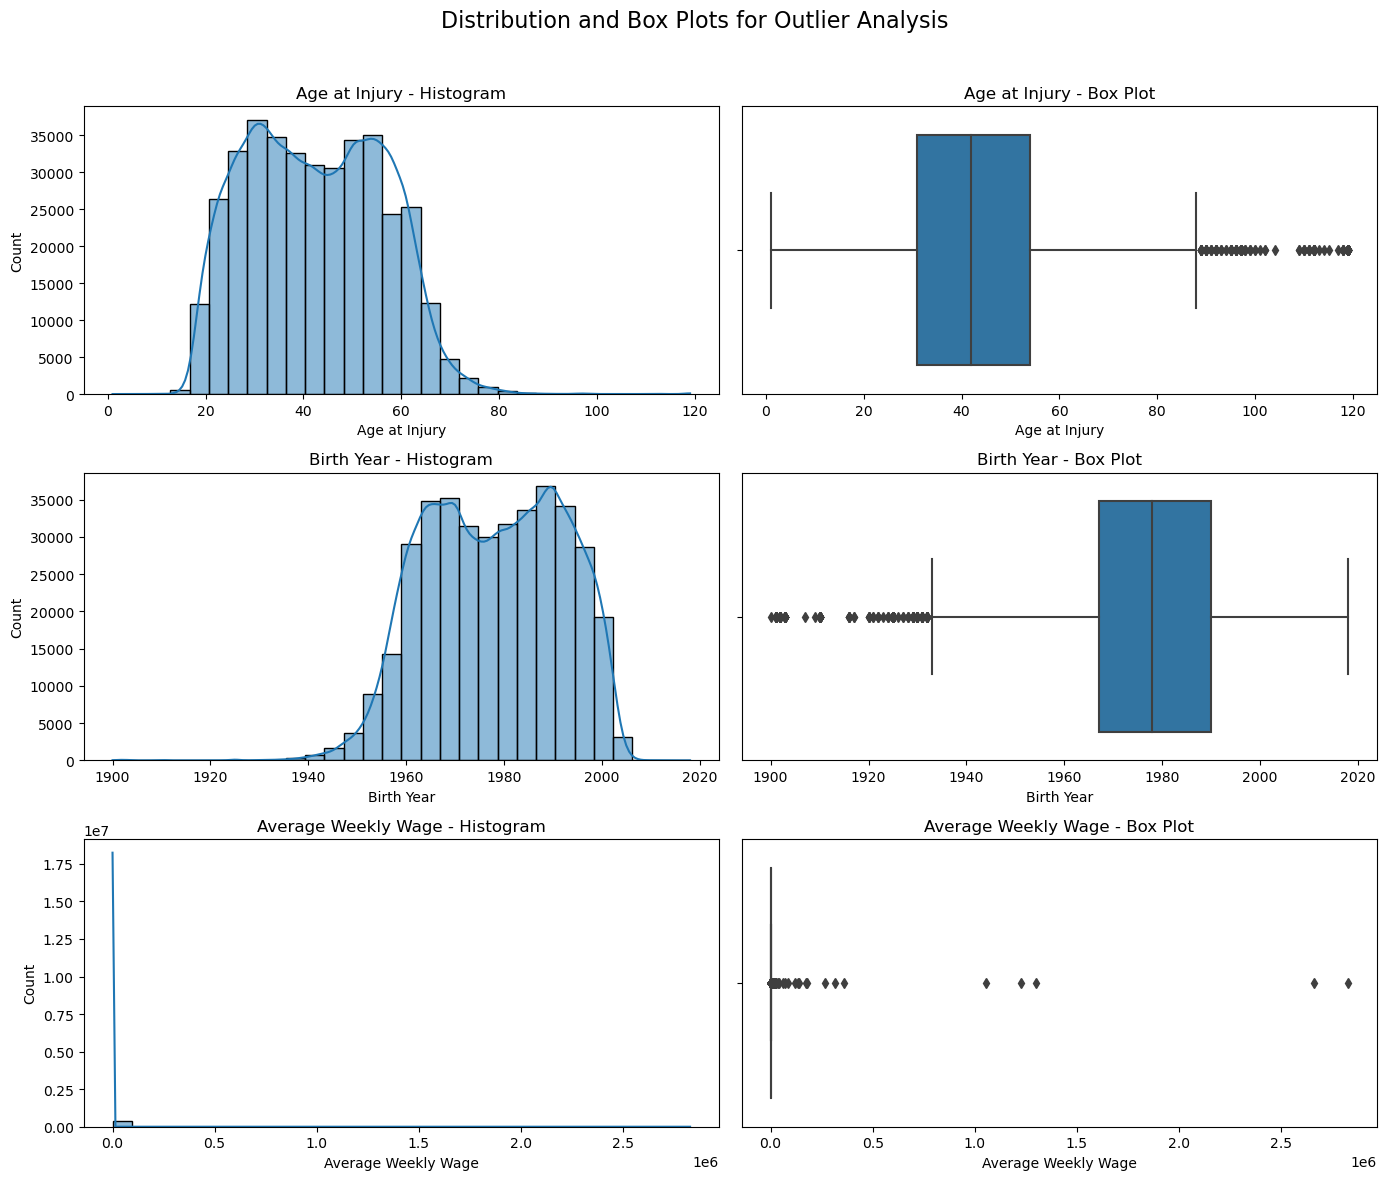

In [60]:
# Plot distributions and box plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribution and Box Plots for Outlier Analysis", fontsize=16)

# Age at Injury
sns.histplot(X_train['Age at Injury'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age at Injury - Histogram')
sns.boxplot(x=X_train['Age at Injury'], ax=axes[0, 1])
axes[0, 1].set_title('Age at Injury - Box Plot')

# Birth Year
sns.histplot(X_train['Birth Year'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Birth Year - Histogram')
sns.boxplot(x=X_train['Birth Year'], ax=axes[1, 1])
axes[1, 1].set_title('Birth Year - Box Plot')

# Average Weekly Wage
sns.histplot(X_train['Average Weekly Wage'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Average Weekly Wage - Histogram')
sns.boxplot(x=X_train['Average Weekly Wage'], ax=axes[2, 1])
axes[2, 1].set_title('Average Weekly Wage - Box Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Which method is the best?
- Z-score: If the data is normally distributed (or close to it), z-score can be more accurate. Z-score is more sensitive to extreme outliers because it depends on the mean and standard deviation. If extreme values play an essential part in the data, z-score will identify more outliers. 
  
- Interquartile range (IQR): For skewed data, IQR is a better choice. IQR relies on the median and quartiles, which are less affected by extreme values. If you want to ignore extreme values in the data that might not be representative, IQR can be a better choice.


In the feature Average Weekly Wage, we will use a log transformation to reduce skewness to make the distribution closer to normal and easier to identify outliers.

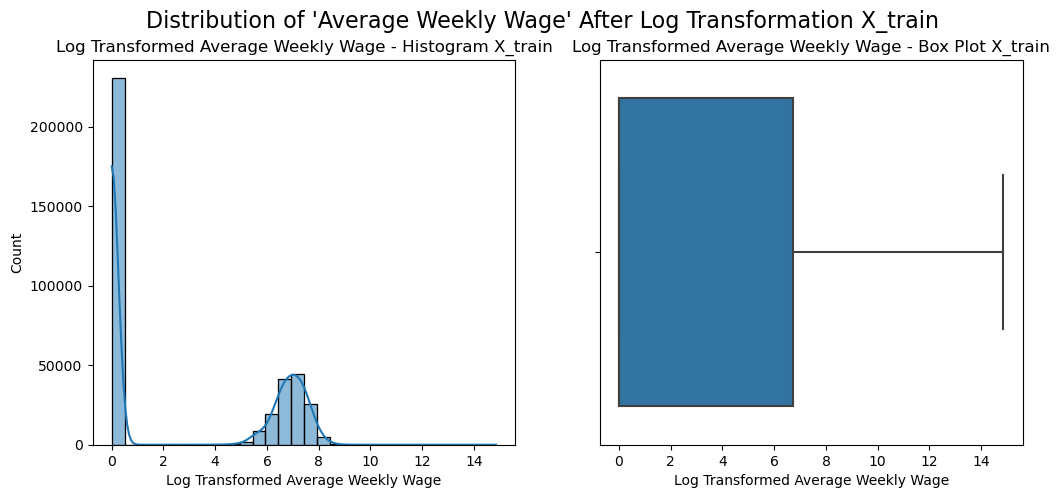

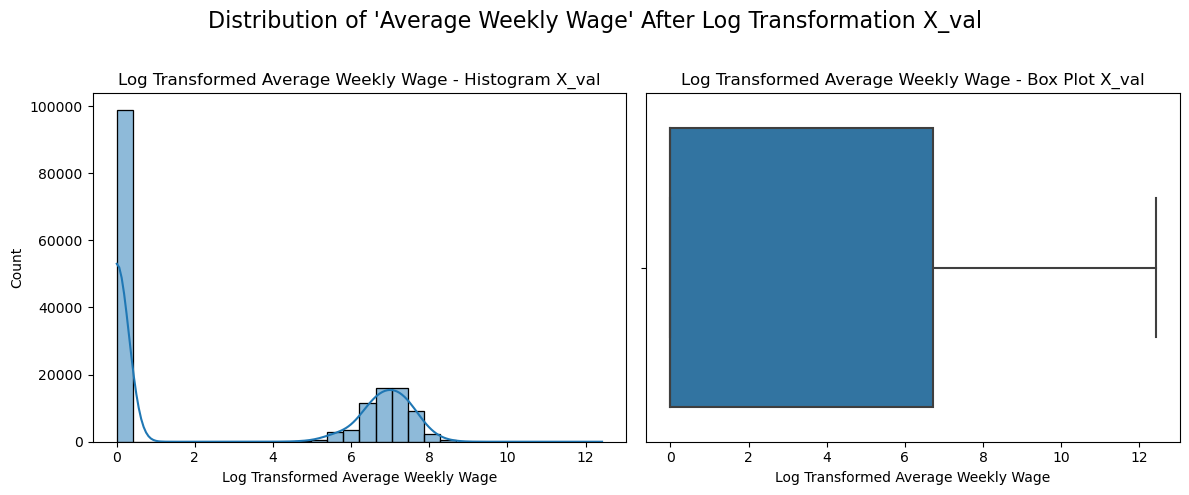

In [61]:
#Log transformation Average weekly wage
X_train['Log Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution of 'Average Weekly Wage' After Log Transformation X_train", fontsize=16)

# Histogram for log-transformed Average Weekly Wage
sns.histplot(X_train['Log Weekly Wage'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Log Transformed Average Weekly Wage - Histogram X_train')
axes[0].set_xlabel('Log Transformed Average Weekly Wage')

# Boxplot for log-transformed Average Weekly Wage
sns.boxplot(x=X_train['Log Weekly Wage'].dropna(), ax=axes[1])
axes[1].set_title('Log Transformed Average Weekly Wage - Box Plot X_train')
axes[1].set_xlabel('Log Transformed Average Weekly Wage')


#Log transformation Average weekly wage
X_val['Log Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution of 'Average Weekly Wage' After Log Transformation X_val", fontsize=16)

# Histogram for log-transformed Average Weekly Wage
sns.histplot(X_val['Log Weekly Wage'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Log Transformed Average Weekly Wage - Histogram X_val')
axes[0].set_xlabel('Log Transformed Average Weekly Wage')

# Boxplot for log-transformed Average Weekly Wage
sns.boxplot(x=X_val['Log Weekly Wage'].dropna(), ax=axes[1])
axes[1].set_title('Log Transformed Average Weekly Wage - Box Plot X_val')
axes[1].set_xlabel('Log Transformed Average Weekly Wage')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [62]:
# Calculate z-scores for Age at Injury
age_z_scores = np.abs((X_train['Age at Injury'] - X_train['Age at Injury'].mean()) / X_train['Age at Injury'].std())
age_outliers_z = X_train[age_z_scores > 3]

# IQR for Age at Injury
Q1_age = X_train['Age at Injury'].quantile(0.25)
Q3_age = X_train['Age at Injury'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_outliers_iqr = X_train[(X_train['Age at Injury'] < (Q1_age - 1.5 * IQR_age)) | (X_train['Age at Injury'] > (Q3_age + 1.5 * IQR_age))]

# Calculate z-scores for Birth Year
birth_z_scores = np.abs((X_train['Birth Year'] - X_train['Birth Year'].mean()) / X_train['Birth Year'].std())
birth_outliers_z = X_train[birth_z_scores > 3]

# IQR for Birth Year
Q1_birth = X_train['Birth Year'].quantile(0.25)
Q3_birth = X_train['Birth Year'].quantile(0.75)
IQR_birth = Q3_birth - Q1_birth
birth_outliers_iqr = X_train[(X_train['Birth Year'] < (Q1_birth - 1.5 * IQR_birth)) | (X_train['Birth Year'] > (Q3_birth + 1.5 * IQR_birth))]

# IQR for Average Weekly Wage
Q1_wage = X_train['Log Weekly Wage'].quantile(0.25)
Q3_wage = X_train['Log Weekly Wage'].quantile(0.75)
IQR_wage = Q3_wage - Q1_wage
wage_outliers_iqr = X_train[(X_train['Log Weekly Wage'] < (Q1_wage - 1.5 * IQR_wage)) | (X_train['Log Weekly Wage'] > (Q3_wage + 1.5 * IQR_wage))]

# Output the counts of detected outliers for each method
print(f"Age at Injury - Z-score outliers: {len(age_outliers_z)}")
print(f"Age at Injury - IQR outliers: {len(age_outliers_iqr)}")
print(f"Birth Year - Z-score outliers: {len(birth_outliers_z)}")
print(f"Birth Year - IQR outliers: {len(birth_outliers_iqr)}")
print(f"Average Weekly Wage - IQR outliers after log transform: {len(wage_outliers_iqr)}")

Age at Injury - Z-score outliers: 322
Age at Injury - IQR outliers: 197
Birth Year - Z-score outliers: 347
Birth Year - IQR outliers: 229
Average Weekly Wage - IQR outliers after log transform: 0


In [63]:
X_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Log Weekly Wage'],
      dtype='object')

- Age at Injury: Use IQR to remove the 279 outliers that are the most apparent outliers without impacting a large part of the data. It is less sensitive to the skew of the distribution and focuses on extremes while keeping most of the data intact. 


- Birth Year: Use the IQR method (320 outliers) for consistency with the treatment of "Age at Injury" and because the Z-score is more likely to be influenced by the long tail of older birth years. IQR focuses more on identifying extreme values without over-removing.
Since birth year rarely follows a normal distribution, and extreme values may reflect data entry errors, IQR is a safer choice. This is especially true if there are only a few unrealistic values outside a logical range for birth years, such as the min value of 0 and max value of 120. 

- Average Weekly Wage: After log transformation, IQR did not identify any outliers, suggesting that the log transformation effectively removed the extremes and normalized the distribution. Therefore, IQR after log transformation should be sufficient for Average Weekly Wage. 


In [64]:
# Remove IQR outliers for Age at Injury
q1_age = X_train['Age at Injury'].quantile(0.25)
q3_age = X_train['Age at Injury'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age

X_train = X_train[(X_train['Age at Injury'] >= lower_bound_age) & (X_train['Age at Injury'] <= upper_bound_age)]
y_train = y_train.loc[X_train.index]
X_val = X_val[(X_val['Age at Injury'] >= lower_bound_age) & (X_val['Age at Injury'] <= upper_bound_age)]
y_val = y_val.loc[X_val.index]

# Remove IQR outliers for Birth Year
q1_year = X_train['Birth Year'].quantile(0.25)
q3_year = X_train['Birth Year'].quantile(0.75)
iqr_year = q3_year - q1_year
lower_bound_year = q1_year - 1.5 * iqr_year
upper_bound_year = q3_year + 1.5 * iqr_year

X_train = X_train[(X_train['Birth Year'] >= lower_bound_year) & (X_train['Birth Year'] <= upper_bound_year)]
y_train = y_train.loc[X_train.index]
X_val = X_val[(X_val['Birth Year'] >= lower_bound_year) & (X_val['Birth Year'] <= upper_bound_year)]
y_val = y_val.loc[X_val.index]

Conclusion: 
- We used the IQR method to remove outliers from the features Age at Injury and Birth Year
- Used log-transformation on Average Weekly Wage. After the transformation, the IQR method did not fint any outliers, which means we did not remove any outliers from this feature. 

In [65]:
# Remove the 'Average Weekly Wage' column, as we no longer need it since we have created the feature with the log transformation of the wage
X_train = X_train.drop(columns=['Average Weekly Wage'])
X_val = X_val.drop(columns=['Average Weekly Wage'])

In [66]:
# This feature is not on test data
X_train = X_train.drop(columns=['Agreement Reached'])
X_val = X_val.drop(columns=['Agreement Reached'])

### Test Data Pretreatment

In [67]:
# List of columns to convert to datetime
date_columns = ['Accident Date', 'C-2 Date', 'Assembly Date', 'C-3 Date', 'First Hearing Date']

# Convert to datetime
for col in date_columns:
    test_df[col] = pd.to_datetime(test_df[col], errors='coerce')

In [68]:
# Replace -9 with NaN in 'WCIO Part Of Body Code'
test_df['WCIO Part Of Body Code'] = test_df['WCIO Part Of Body Code'].replace(-9, np.nan)

# Replace the corresponding 'WCIO Part Of Body Description' with NaN where code is NaN
test_df.loc[test_df['WCIO Part Of Body Code'].isna(), 'WCIO Part Of Body Description'] = np.nan

In [69]:
# Impute invalid Zip Code with the mode value
zip_code_mode = test_df['Zip Code'].mode()[0]
test_df['Zip Code'] = test_df['Zip Code'].apply(lambda x: zip_code_mode if pd.isna(x) or not str(x).isdigit() or len(str(x)) != 5 else x)

# Transform Zip Code feature from object type to numeric
test_df['Zip Code'] = pd.to_numeric(test_df['Zip Code'], errors='ignore')

In [70]:
test_df = test_df.drop(columns=['Industry Code Description'])
test_df = test_df.drop(columns=['WCIO Cause of Injury Description'])
test_df = test_df.drop(columns=['WCIO Nature of Injury Description'])
test_df = test_df.drop(columns=['WCIO Part Of Body Description'])

In [71]:
# Impute 'Age at Injury' and 'Birth Year' with the mode value when both are 0
age_at_injury_mode = test_df['Age at Injury'].mode()[0]
birth_year_mode = test_df['Birth Year'].mode()[0]
test_df.loc[(test_df['Age at Injury'] == 0) & (test_df['Birth Year'] == 0), 'Age at Injury'] = age_at_injury_mode
test_df.loc[(test_df['Age at Injury'] == 0) & (test_df['Birth Year'] == 0), 'Birth Year'] = birth_year_mode

# Replace 'Age at Injury' values of 0 with NaN
test_df['Age at Injury'] = test_df['Age at Injury'].replace(0, np.nan)

# Replace 'Birth Year' values of 0 with NaN
test_df['Birth Year'] = test_df['Birth Year'].replace(0, np.nan)

In [72]:
# Drop columns in test_df that were removed in train_df
columns_to_drop = ['OIICS Nature of Injury Description', 'IME-4 Count', 'C-3 Date']
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

In [73]:
# Impute missing values in 'Birth Year', 'Accident Date', 'Age at Injury' with the mode value if at least two are missing
birth_year_mode = test_df['Birth Year'].mode()[0]
accident_date_mode = test_df['Accident Date'].mode()[0]
age_at_injury_mode = test_df['Age at Injury'].mode()[0]

def impute_mode(row):
    if row.isna().sum() >= 2:
        if pd.isna(row['Birth Year']):
            row['Birth Year'] = birth_year_mode
        if pd.isna(row['Accident Date']):
            row['Accident Date'] = accident_date_mode
        if pd.isna(row['Age at Injury']):
            row['Age at Injury'] = age_at_injury_mode
    return row

test_df[['Birth Year', 'Accident Date', 'Age at Injury']] = test_df[['Birth Year', 'Accident Date', 'Age at Injury']].apply(impute_mode, axis=1)

# Impute missing values for 'Birth Year' and 'Age at Injury' in test_df
test_df['Birth Year'] = test_df.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if pd.isnull(row['Birth Year']) and not pd.isnull(row['Age at Injury']) else row['Birth Year'],
    axis=1
)
test_df['Age at Injury'] = test_df.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if pd.isnull(row['Age at Injury']) and not pd.isnull(row['Birth Year']) else row['Age at Injury'],
    axis=1
)

# Correct 'Birth Year' and 'Age at Injury' values where they are 0
test_df['Birth Year'] = test_df.apply(
    lambda row: row['Accident Date'].year - row['Age at Injury'] if row['Birth Year'] == 0 and row['Age at Injury'] != 0 else row['Birth Year'],
    axis=1
)
test_df['Age at Injury'] = test_df.apply(
    lambda row: row['Accident Date'].year - row['Birth Year'] if row['Age at Injury'] == 0 and row['Birth Year'] != 0 else row['Age at Injury'],
    axis=1
)

In [74]:
# Impute missing values in 'Industry Code' with the mode value
industry_code_mode = test_df['Industry Code'].mode()[0]
test_df['Industry Code'].fillna(industry_code_mode, inplace=True)

# Fill missing 'Average Weekly Wage' based on group median within each combination of 'Age at Injury', 'Industry Code', and 'Gender'
test_df['Average Weekly Wage'] = test_df.groupby(['Age at Injury', 'Industry Code', 'Gender'])['Average Weekly Wage'].transform(lambda x: x.fillna(x.median()))
test_df['Average Weekly Wage'] = test_df.groupby('Age at Injury')['Average Weekly Wage'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Zip Code' using mode within 'County of Injury' and 'District Name'
test_df['Zip Code'] = test_df.groupby(['County of Injury', 'District Name'])['Zip Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))
test_df['Zip Code'] = test_df.groupby('District Name')['Zip Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# Fill missing 'WCIO Part Of Body Code' based on mode within each 'WCIO Cause of Injury Code' and 'WCIO Nature of Injury Code'
test_df['WCIO Part Of Body Code'] = test_df.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Impute the mode when there are missing values in 'WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'WCIO Cause of Injury Code'
wcio_part_of_body_code_mode = test_df['WCIO Part Of Body Code'].mode()[0]
wcio_nature_of_injury_code_mode = test_df['WCIO Nature of Injury Code'].mode()[0]
wcio_cause_of_injury_code_mode = test_df['WCIO Cause of Injury Code'].mode()[0]

test_df['WCIO Part Of Body Code'].fillna(wcio_part_of_body_code_mode, inplace=True)
test_df['WCIO Nature of Injury Code'].fillna(wcio_nature_of_injury_code_mode, inplace=True)
test_df['WCIO Cause of Injury Code'].fillna(wcio_cause_of_injury_code_mode, inplace=True)

# # Drop the column 'C-2 Date'
# test_df.drop(columns=['C-2 Date'], inplace=True)

# Impute mode value for 'C-2 Date' column in test_df
test_df['C-2 Date'].fillna(test_df['C-2 Date'].mode()[0], inplace=True)

In [75]:
# Log transform 'Average Weekly Wage' and calculate IQR
test_df['Log Weekly Wage'] = np.log1p(test_df['Average Weekly Wage'])

In [76]:
# Remove feature no long needed
test_df = test_df.drop(columns=['Average Weekly Wage'])

In [77]:
X_train.info

<bound method DataFrame.info of        Accident Date  Age at Injury Alternative Dispute Resolution  \
545650    2022-10-05           65.0                              N   
210584    2021-02-01           38.0                              N   
250872    2021-05-06           38.0                              N   
343175    2021-10-10           24.0                              N   
334735    2021-07-07           53.0                              N   
...              ...            ...                            ...   
530963    2022-06-14           52.0                              N   
196248    2021-01-20           62.0                              N   
16183     2020-01-26           39.0                              N   
286887    1995-11-09           20.0                              N   
40843     2020-02-27           40.0                              N   

       Assembly Date Attorney/Representative  Birth Year   C-2 Date  \
545650    2022-10-06                       Y      1957.0

In [78]:
len(y_train)

377541

- We applied the same transformations to test_df as we did to train_df, with the exception of eliminating rows because we have to make predictions for all the test_df rows. Where we eliminated rows in train_df, in test_df we imputed values

### Categorical Features

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377541 entries, 545650 to 40843
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Accident Date                   377541 non-null  datetime64[ns]
 1   Age at Injury                   377541 non-null  float64       
 2   Alternative Dispute Resolution  377541 non-null  object        
 3   Assembly Date                   377541 non-null  datetime64[ns]
 4   Attorney/Representative         377541 non-null  object        
 5   Birth Year                      377541 non-null  float64       
 6   C-2 Date                        377541 non-null  datetime64[ns]
 7   Carrier Name                    377541 non-null  object        
 8   Carrier Type                    377541 non-null  object        
 9   Claim Identifier                377541 non-null  int64         
 10  County of Injury                377541 non-null  obj

In [80]:
nominal_features = ['Alternative Dispute Resolution','Attorney/Representative','Carrier Type',
    'COVID-19 Indicator','District Name','Gender','Medical Fee Region', 'Carrier Name', 'County of Injury']

In [81]:
X_train[nominal_features].nunique()

Alternative Dispute Resolution       2
Attorney/Representative              2
Carrier Type                         7
COVID-19 Indicator                   2
District Name                        8
Gender                               4
Medical Fee Region                   5
Carrier Name                      1932
County of Injury                    63
dtype: int64

 - For the majority of the categorical variables since they are all nominal (no intrinsic order) and we have relatively few unique categories we will use one-hot encoding. This encoding method transforms each category into a new binary column.
- For the categorical variables 'Carrier Name' and 'County of Injury' since they have a high cardinality, we will Target Encode them using the Claim Injury Type as the target_variable. Target encoding uses information from the target variable to transform each category into a numeric value based on the relationship between the feature and the target.
- To use the Target Encoding we must download the category_encoders library, we can do it by pasting 'pip install category_encoders' in our terminal
- For our target variable, Claim Injury Type, since we need this variable for the target encoding we will be label encoding it


In [82]:
one_hot_encoding_features = ['Alternative Dispute Resolution','Attorney/Representative','Carrier Type',
    'COVID-19 Indicator','District Name','Gender','Medical Fee Region']

target_encoding_features = ['Carrier Name', 'County of Injury']

target_variable ='Claim Injury Type'


In [83]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

label_encoder = LabelEncoder()
y_val = label_encoder.fit_transform(y_val)


In [84]:

# Define the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore') ##ver se esta bem#########

# Apply the defined encoder to the one_hot_encoding_features in the training set
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train[one_hot_encoding_features])

# Apply the encoder to the one_hot_encoding_features in the test set
one_hot_encoded_test = one_hot_encoder.transform(test_df[one_hot_encoding_features])

# Apply the encoder to the one_hot_encoding_features in the val set
one_hot_encoded_val = one_hot_encoder.transform(X_val[one_hot_encoding_features])


# Create DataFrames for the encoded columns with the same index as x_train and test_df
one_hot_df_X_train = pd.DataFrame(one_hot_encoded_train, index=X_train.index, columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_features))
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, index=test_df.index, columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_features))
one_hot_df_X_val = pd.DataFrame(one_hot_encoded_val , index=X_val.index, columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_features))



In [85]:
# Define the TargetEncoder 
target_encoder = TargetEncoder(cols=target_encoding_features)

# Fit the target encoder using the encoded target variable
target_encoded_train = target_encoder.fit_transform(X_train[target_encoding_features], y_train)



# Transform the test set using the fitted encoder
target_encoded_test = target_encoder.transform(test_df[target_encoding_features])
target_encoded_val = target_encoder.transform(X_val[target_encoding_features], y_val)

# Create DataFrames for the encoded columns with the same index as x_train and test_df
target_encoded_X_train = pd.DataFrame(target_encoded_train, index=X_train.index, columns=target_encoding_features)
target_encoded_df_test = pd.DataFrame(target_encoded_test, index=test_df.index, columns=target_encoding_features)
target_encoded_X_val = pd.DataFrame(target_encoded_val, index=X_val.index, columns=target_encoding_features)


In [86]:
target_encoded_X_train 

Carrier Name  County of Injury
545650      2.021595          2.080989
210584      1.748792          2.065465
250872      1.286325          1.819056
343175      2.153465          1.753766
334735      1.610577          1.933288
...              ...               ...
530963      2.322767          2.080989
196248      1.767974          1.735757
16183       2.061380          1.988808
286887      2.298578          1.988808
40843       1.074535          1.819056

[377541 rows x 2 columns]

In [87]:
#concatenate the original dataframe (droping the nominal_features) with the one hot encoded dataframe and target encoded dataframe
X_train = pd.concat([X_train.drop(columns=target_encoding_features + one_hot_encoding_features), one_hot_df_X_train, target_encoded_X_train], axis=1)
X_val = pd.concat([X_val.drop(columns=target_encoding_features + one_hot_encoding_features), one_hot_df_X_val, target_encoded_X_val], axis=1)
test_df = pd.concat([test_df.drop(columns=target_encoding_features + one_hot_encoding_features), one_hot_df_test, target_encoded_df_test], axis=1)

### Feature engineering

In [88]:
# Create a binary feature 'First_Hearing_Occurred' based on the presence of a date in 'First Hearing Date'
X_train['First_Hearing_Occurred'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First_Hearing_Occurred'] = X_val['First Hearing Date'].notna().astype(int)
test_df['First_Hearing_Occurred'] = test_df['First Hearing Date'].notna().astype(int)

In [89]:
# Remove the 'First Hearing Date' column, as we no longer need it since we have created a new binary feature telling us if the first hearing has occurred or not
X_train = X_train.drop(columns=['First Hearing Date'])

test_df = test_df.drop(columns=['First Hearing Date'])

X_val = X_val.drop(columns=['First Hearing Date'])

In [90]:
# # Elbow Method for training set
# numeric_columns_X_train = X_train.select_dtypes(include=['float64', 'int64']).columns
# numeric_df_filled_X_train = X_train[numeric_columns_X_train].fillna(X_train[numeric_columns_X_train].mean())

# wcss_train = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(numeric_df_filled_X_train)
#     wcss_train.append(kmeans.inertia_)

# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), wcss_train, marker='o')
# plt.title('Elbow Method for Optimal K (Training Set)')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
# plt.show()



- As we can see, through the "elbow method" the optimal number for clusters is 3. K=3

In [91]:

# Instantiate and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train[["Age at Injury"]])

# Predict the age groups for the training, validation, and test sets
X_train['age_group'] = kmeans.predict(X_train[['Age at Injury']])
X_val['age_group'] = kmeans.predict(X_val[['Age at Injury']])
test_df['age_group'] = kmeans.predict(test_df[['Age at Injury']])

In [92]:
# Calcular as estatísticas de cada cluster para verificar os grupos etários
cluster_stats_X_train = X_train.groupby('age_group')['Age at Injury'].agg(['min', 'max', 'mean', 'median', 'count'])


# Exibir os resultados de forma clara
print("Cluster Age Group Ranges:")
for cluster, stats in cluster_stats_X_train.iterrows():
    print(f"\nCluster {cluster}:")
    print(f" - Min Age: {stats['min']}")
    print(f" - Max Age: {stats['max']}")
    print(f" - Mean Age: {stats['mean']:.1f}")
    print(f" - Median Age: {stats['median']}")
    print(f" - Count: {stats['count']}")



Cluster Age Group Ranges:

Cluster 0:
 - Min Age: 1.0
 - Max Age: 33.0
 - Mean Age: 26.6
 - Median Age: 27.0
 - Count: 118043.0

Cluster 1:
 - Min Age: 50.0
 - Max Age: 88.0
 - Mean Age: 57.9
 - Median Age: 57.0
 - Count: 131436.0

Cluster 2:
 - Min Age: 34.0
 - Max Age: 49.0
 - Mean Age: 41.3
 - Median Age: 41.0
 - Count: 128062.0


- So now we have our age group divided (<35, 36-50, >50)

In [93]:
# Remove the 'Age at Injury' column, as we no longer need it since we have created a new feature with 3 age groups
X_train = X_train.drop(columns=['Age at Injury'])
test_df = test_df.drop(columns=['Age at Injury'])
X_val = X_val.drop(columns=['Age at Injury'])



In [94]:
# Extract components from the date columns
for date_col in ['Accident Date', 'C-2 Date', 'Assembly Date']:
    X_train[f'{date_col} Year'] = X_train[date_col].dt.year
    X_train[f'{date_col} Month'] = X_train[date_col].dt.month
    X_train[f'{date_col} Day'] = X_train[date_col].dt.day
    X_train[f'{date_col} Day of Week'] = X_train[date_col].dt.dayofweek
    X_train[f'{date_col} Day of Year'] = X_train[date_col].dt.dayofyear
    X_train[f'{date_col} Is Weekend'] = X_train[date_col].dt.dayofweek >= 5

# Optionally, drop the original date columns if not needed
X_train.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date'], inplace=True)

print(X_train.head())

        Birth Year  Claim Identifier  Industry Code  \
545650      1957.0           6102870           48.0   
210584      1982.0           5667628           53.0   
250872      1982.0           5717974           92.0   
343175      1997.0           5836609           72.0   
334735      1967.0           5825622           81.0   

        WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
545650                       57.0                        52.0   
210584                       53.0                        52.0   
250872                       30.0                        49.0   
343175                       56.0                        49.0   
334735                       99.0                        36.0   

        WCIO Part Of Body Code  Zip Code  Number of Dependents  \
545650                    44.0   11373.0                   5.0   
210584                    42.0   11204.0                   0.0   
250872                    55.0   13210.0                   0.0   
343175        

In [95]:
# Extract components from the date columns
for date_col in ['Accident Date', 'C-2 Date', 'Assembly Date']:
    X_val[f'{date_col} Year'] = X_val[date_col].dt.year
    X_val[f'{date_col} Month'] = X_val[date_col].dt.month
    X_val[f'{date_col} Day'] = X_val[date_col].dt.day
    X_val[f'{date_col} Day of Week'] = X_val[date_col].dt.dayofweek
    X_val[f'{date_col} Day of Year'] = X_val[date_col].dt.dayofyear
    X_val[f'{date_col} Is Weekend'] = X_val[date_col].dt.dayofweek >= 5

# Optionally, drop the original date columns if not needed
X_val.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date'], inplace=True)

# Extract components from the date columns
for date_col in ['Accident Date', 'C-2 Date', 'Assembly Date']:
    test_df[f'{date_col} Year'] = test_df[date_col].dt.year
    test_df[f'{date_col} Month'] = test_df[date_col].dt.month
    test_df[f'{date_col} Day'] = test_df[date_col].dt.day
    test_df[f'{date_col} Day of Week'] = test_df[date_col].dt.dayofweek
    test_df[f'{date_col} Day of Year'] = test_df[date_col].dt.dayofyear
    test_df[f'{date_col} Is Weekend'] = test_df[date_col].dt.dayofweek >= 5

# Optionally, drop the original date columns if not needed
test_df.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date'], inplace=True)

### Scalling

In [96]:
from scipy.stats import shapiro

# Select numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Perform Shapiro-Wilk test for each numeric column
print("Shapiro-Wilk Test Results:")
for col in numeric_columns:
    stat, p = shapiro(X_train[col])
    print(f'{col}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

#Null Hypothesis: The data is normally distributed, since all variables rejected we will use Min Max Scaler
    

Shapiro-Wilk Test Results:
Birth Year: Statistics=0.9748381972312927, p-value=0.0
Birth Year does not look Gaussian (reject H0)
Claim Identifier: Statistics=0.9512717127799988, p-value=0.0
Claim Identifier does not look Gaussian (reject H0)
Industry Code: Statistics=0.9330906271934509, p-value=0.0
Industry Code does not look Gaussian (reject H0)
WCIO Cause of Injury Code: Statistics=0.9556843638420105, p-value=0.0
WCIO Cause of Injury Code does not look Gaussian (reject H0)
WCIO Nature of Injury Code: Statistics=0.9056634902954102, p-value=0.0
WCIO Nature of Injury Code does not look Gaussian (reject H0)
WCIO Part Of Body Code: Statistics=0.9223082661628723, p-value=0.0
WCIO Part Of Body Code does not look Gaussian (reject H0)
Zip Code: Statistics=0.3035131096839905, p-value=0.0
Zip Code does not look Gaussian (reject H0)
Number of Dependents: Statistics=0.9193549752235413, p-value=0.0
Number of Dependents does not look Gaussian (reject H0)
Log Weekly Wage: Statistics=0.670085966587066

In [97]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for each numeric column
print("Kolmogorov-Smirnov Test Results:")
for col in numeric_columns:
    stat, p = kstest(X_train[col], 'norm')
    print(f'{col}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

#Null Hypothesis: The data is normally distributed, since all variables rejected we will use Min Max Scaler
    

Kolmogorov-Smirnov Test Results:
Birth Year: Statistics=1.0, p-value=0.0
Birth Year does not look Gaussian (reject H0)
Claim Identifier: Statistics=1.0, p-value=0.0
Claim Identifier does not look Gaussian (reject H0)
Industry Code: Statistics=1.0, p-value=0.0
Industry Code does not look Gaussian (reject H0)
WCIO Cause of Injury Code: Statistics=0.9907295970707475, p-value=0.0
WCIO Cause of Injury Code does not look Gaussian (reject H0)
WCIO Nature of Injury Code: Statistics=0.9877391933794928, p-value=0.0
WCIO Nature of Injury Code does not look Gaussian (reject H0)
WCIO Part Of Body Code: Statistics=1.0, p-value=0.0
WCIO Part Of Body Code does not look Gaussian (reject H0)
Zip Code: Statistics=0.9999841076863175, p-value=0.0
Zip Code does not look Gaussian (reject H0)
Number of Dependents: Statistics=0.6989549129113494, p-value=0.0
Number of Dependents does not look Gaussian (reject H0)
Log Weekly Wage: Statistics=0.5, p-value=0.0
Log Weekly Wage does not look Gaussian (reject H0)
Alt

In [98]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select the columns of interest
numeric_columns = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns in x_train
X_train_scaled = X_train.copy()  # Create a copy to avoid modifying the original DataFrame
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# If you also want to scale the validation and test sets, use the same scaler
X_val_scaled = X_val.copy()
X_val_scaled[numeric_columns] = scaler.transform(X_val[numeric_columns])

test_df_scaled = test_df.copy()
test_df_scaled[numeric_columns] = scaler.transform(test_df[numeric_columns])


## Class Balancing

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [100]:
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution before SMOTE:
1    190967
3    100589
2     46575
4     32715
0      3460
5      2857
7       313
6        65
dtype: int64


In [101]:
# # Inicializar o SMOTE-Tomek
# smote_tomek = SMOTETomek(random_state=42)

# # Aplicar o SMOTE aos dados de treino
# X_train_scaled, y_train = smote_tomek.fit_resample(X_train_scaled, y_train)

In [102]:
# Inicializar o SMOTE
smote = SMOTE(sampling_strategy={0: 65000, 1: 190967, 2: 65000, 3: 100589, 4: 65000, 5: 65000, 6: 65000, 7: 65000}, random_state=42)

# Aplicar o SMOTE aos dados de treino
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [103]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution after SMOTE:
1    190967
3    100589
2     65000
7     65000
4     65000
0     65000
5     65000
6     65000
dtype: int64


### Feature Selection

#### Filter Methods

In [104]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming X_train_scaled is already defined
# Variance Threshold
def variance_threshold_method(X):
    selector = VarianceThreshold(threshold=0.1)
    X_var = selector.fit_transform(X)
    var_features = X.columns[selector.get_support()]
    return var_features.tolist()

var_features = variance_threshold_method(X_train_scaled)
print("Variance Threshold Features:")
print(var_features[:20])  # Select top 15 features


Variance Threshold Features:
['Number of Dependents', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'District Name_NYC', 'Gender_M', 'Medical Fee Region_II', 'Medical Fee Region_IV', 'First_Hearing_Occurred', 'age_group', 'Accident Date Is Weekend', 'Assembly Date Year']


In [105]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X_train_scaled and y_train are already defined
# Chi-Square Test
def chi_square_method(X, y):
    selector = SelectKBest(chi2, k=20)
    X_chi2 = selector.fit_transform(X, y)
    chi2_features = X.columns[selector.get_support()]
    return chi2_features.tolist()

chi2_features = chi_square_method(X_train_scaled, y_train)
print("Chi-Square Test Features:")
print(chi2_features)


Chi-Square Test Features:
['Birth Year', 'Claim Identifier', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Log Weekly Wage', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'COVID-19 Indicator_Y', 'District Name_NYC', 'District Name_ROCHESTER', 'District Name_STATEWIDE', 'Gender_M', 'Medical Fee Region_II', 'Medical Fee Region_UK', 'First_Hearing_Occurred', 'Accident Date Is Weekend', 'Assembly Date Year']


#### Embebbed Methods

In [106]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train_scaled and y_train are already defined
# Lasso (L1) Regularization
def lasso_method(X, y):
    model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=1000, class_weight='balanced', n_jobs=-1)
    model.fit(X, y)
    lasso_features = X.columns[model.coef_.any(axis=0)]
    return lasso_features.tolist()[:20]

lasso_features = lasso_method(X_train_scaled, y_train)
print("Lasso Features:")
print(lasso_features)


Lasso Features:
['Birth Year', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 'Log Weekly Wage', 'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE']


In [107]:
from xgboost import XGBClassifier

# Assuming X_train_scaled and y_train are already defined
# Tree-based Feature Importance (XGBoost)
def xgboost_method(X, y):
    model = XGBClassifier(scale_pos_weight='balanced', n_jobs=-1)
    model.fit(X, y)
    xgb_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_importance
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_features = feature_importance_df.head(20)['Feature'].tolist()
    return top_features

xgb_features = xgboost_method(X_train_scaled, y_train)
print("XGBoost Features:")
print(xgb_features)


XGBoost Features:
['Log Weekly Wage', 'First_Hearing_Occurred', 'Attorney/Representative_Y', 'Assembly Date Day of Week', 'Gender_M', 'Accident Date Year', 'age_group', 'Accident Date Is Weekend', 'COVID-19 Indicator_Y', 'WCIO Nature of Injury Code', 'C-2 Date Year', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Accident Date Day of Week', 'Carrier Type_2A. SIF', 'Assembly Date Year', 'WCIO Part Of Body Code', 'Medical Fee Region_II', 'C-2 Date Day of Week', 'Number of Dependents', 'District Name_NYC']


In [108]:
from lightgbm import LGBMClassifier

# Assuming X_train_scaled and y_train are already defined
# Tree-based Feature Importance (LightGBM)
def lightgbm_method(X, y):
    model = LGBMClassifier(class_weight='balanced', n_jobs=-1)
    model.fit(X, y)
    lgb_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lgb_importance
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_features = feature_importance_df.head(20)['Feature'].tolist()
    return top_features

lgb_features = lightgbm_method(X_train_scaled, y_train)
print("LightGBM Features:")
print(lgb_features)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12006
[LightGBM] [Info] Number of data points in the train set: 681556, number of used features: 53
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
LightGBM Features:
['Log Weekly Wage', 'WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'Industry Code', 'Carrier Name', 'WCIO

In [109]:
# Define the lists of features from each method
# var_features = [
#     'Number of Dependents', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 
#     'Carrier Type_3A. SELF PUBLIC', 'District Name_NYC', 'Gender_M', 'Medical Fee Region_II', 
#     'Medical Fee Region_IV', 'First_Hearing_Occurred', 'age_group', 'Accident Date Year', 
#     'Accident Date Month', 'Accident Date Day', 'Accident Date Day of Week', 
#     'Accident Date Day of Year', 'Accident Date Is Weekend', 'C-2 Date Year', 
#     'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Day of Week'
# ]

# chi2_features = [
#     'Claim Identifier', 'Log Weekly Wage', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF',
#     'Carrier Type_3A. SELF PUBLIC', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 
#     'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 
#     'District Name_STATEWIDE', 'Gender_M', 'Medical Fee Region_IV', 'Carrier Name', 
#     'First_Hearing_Occurred', 'Accident Date Day of Year', 'C-2 Date Month', 
#     'C-2 Date Day of Year', 'Assembly Date Month', 'Assembly Date Day of Year'
# ]

# lasso_features = [
#     'Birth Year', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 
#     'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 
#     'Log Weekly Wage', 'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y', 
#     'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 
#     'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 
#     'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE'
# ]

# xgb_features = [
#     'Log Weekly Wage', 'Attorney/Representative_Y', 'First_Hearing_Occurred', 
#     'COVID-19 Indicator_Y', 'District Name_NYC', 'Accident Date Year', 
#     'Carrier Type_3A. SELF PUBLIC', 'Carrier Name', 'WCIO Part Of Body Code', 
#     'Industry Code', 'District Name_BINGHAMTON', 'District Name_HAUPPAUGE', 
#     'WCIO Nature of Injury Code', 'C-2 Date Year', 'District Name_ROCHESTER', 
#     'WCIO Cause of Injury Code', 'Gender_M', 'Carrier Type_2A. SIF', 'Claim Identifier', 'Zip Code'
# ]

# lgb_features = [
#     'Log Weekly Wage', 'WCIO Part Of Body Code', 'Carrier Name', 'Zip Code', 
#     'WCIO Cause of Injury Code', 'Birth Year', 'Claim Identifier', 'WCIO Nature of Injury Code', 
#     'Industry Code', 'Accident Date Day of Year', 'Accident Date Day', 'County of Injury', 
#     'Assembly Date Day', 'C-2 Date Day', 'First_Hearing_Occurred', 'C-2 Date Day of Year', 
#     'Attorney/Representative_Y', 'Assembly Date Day of Year', 'Accident Date Year', 'Accident Date Day of Week'
# ]

# Combine all features into a set to get unique features
all_features = set(var_features + chi2_features + lasso_features + xgb_features + lgb_features)

# Create a dictionary to store the results
results = {feature: {"Variance Threshold": "Discard", "Chi-Square Test": "Discard", "Lasso": "Discard", "XGBoost": "Discard", "LightGBM": "Discard"} for feature in all_features}

# Populate the dictionary with the results from each method
for feature in var_features:
    results[feature]["Variance Threshold"] = "Keep"

for feature in chi2_features:
    results[feature]["Chi-Square Test"] = "Keep"

for feature in lasso_features:
    results[feature]["Lasso"] = "Keep"

for feature in xgb_features:
    results[feature]["XGBoost"] = "Keep"

for feature in lgb_features:
    results[feature]["LightGBM"] = "Keep"

# Generate the markdown table
table_header = "| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | What to do? (One possible way to \"solve\") |\n"
table_header += "| --- | --- | --- | --- | --- | --- | --- |\n"

table_rows = ""
for feature, methods in results.items():
    decision = ""
    
    # Determine the decision based on the number of methods that suggest keeping the feature
    keep_count = sum(1 for method in methods.values() if method == "Keep")
    
    if keep_count >= 3:
        decision = "Include in the wrapped methods"
    else:
        decision = "Don't try in the wrapped methods"
    
    table_rows += f"| {feature} | {methods['Variance Threshold']} | {methods['Chi-Square Test']} | {methods['Lasso']} | {methods['XGBoost']} | {methods['LightGBM']} | {decision} |\n"

table = table_header + table_rows

print(table)


| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- | --- | --- |
| Industry Code | Discard | Discard | Keep | Discard | Keep | Don't try in the wrapped methods |
| Carrier Name | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| District Name_NYC | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| Carrier Type_3A. SELF PUBLIC | Keep | Keep | Keep | Discard | Discard | Include in the wrapped methods |
| Accident Date Day of Week | Discard | Discard | Discard | Keep | Keep | Don't try in the wrapped methods |
| C-2 Date Year | Discard | Discard | Discard | Keep | Discard | Don't try in the wrapped methods |
| Birth Year | Discard | Keep | Keep | Discard | Keep | Include in the wrapped methods |
| Accident Date Day | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| Carrier Type_2A. SIF | Keep

| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- | --- | --- |
| Industry Code | Discard | Discard | Keep | Discard | Keep | Don't try in the wrapped methods |
| Carrier Name | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| District Name_NYC | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| Carrier Type_3A. SELF PUBLIC | Keep | Keep | Keep | Discard | Discard | Include in the wrapped methods |
| Accident Date Day of Week | Discard | Discard | Discard | Keep | Keep | Don't try in the wrapped methods |
| C-2 Date Year | Discard | Discard | Discard | Keep | Discard | Don't try in the wrapped methods |
| Birth Year | Discard | Keep | Keep | Discard | Keep | Include in the wrapped methods |
| Accident Date Day | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| Carrier Type_2A. SIF | Keep | Keep | Keep | Keep | Discard | Include in the wrapped methods |
| Zip Code | Discard | Discard | Keep | Discard | Keep | Don't try in the wrapped methods |
| Claim Identifier | Discard | Keep | Keep | Discard | Keep | Include in the wrapped methods |
| County of Injury | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| Medical Fee Region_II | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| Carrier Type_4A. SELF PRIVATE | Discard | Keep | Keep | Discard | Discard | Don't try in the wrapped methods |
| Gender_M | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| Carrier Type_UNKNOWN | Discard | Discard | Keep | Discard | Discard | Don't try in the wrapped methods |
| COVID-19 Indicator_Y | Discard | Keep | Keep | Keep | Discard | Include in the wrapped methods |
| Attorney/Representative_Y | Keep | Keep | Keep | Keep | Keep | Include in the wrapped methods |
| District Name_ROCHESTER | Discard | Keep | Discard | Discard | Discard | Don't try in the wrapped methods |
| District Name_BUFFALO | Discard | Discard | Keep | Discard | Discard | Don't try in the wrapped methods |
| District Name_HAUPPAUGE | Discard | Discard | Keep | Discard | Discard | Don't try in the wrapped methods |
| C-2 Date Day of Week | Discard | Discard | Discard | Keep | Keep | Don't try in the wrapped methods |
| Alternative Dispute Resolution_Y | Discard | Discard | Keep | Discard | Discard | Don't try in the wrapped methods |
| District Name_STATEWIDE | Discard | Keep | Discard | Discard | Discard | Don't try in the wrapped methods |
| Medical Fee Region_UK | Discard | Keep | Discard | Discard | Discard | Don't try in the wrapped methods |
| Accident Date Month | Discard | Discard | Discard | Discard | Keep | Don't try in the wrapped methods |
| age_group | Keep | Discard | Discard | Keep | Keep | Include in the wrapped methods |
| First_Hearing_Occurred | Keep | Keep | Discard | Keep | Keep | Include in the wrapped methods |
| Number of Dependents | Keep | Discard | Keep | Keep | Keep | Include in the wrapped methods |
| Assembly Date Year | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| WCIO Cause of Injury Code | Discard | Discard | Keep | Discard | Keep | Don't try in the wrapped methods |
| Accident Date Year | Discard | Discard | Discard | Keep | Keep | Don't try in the wrapped methods |
| Medical Fee Region_IV | Keep | Discard | Discard | Discard | Discard | Don't try in the wrapped methods |
| Assembly Date Day of Week | Discard | Discard | Discard | Keep | Keep | Don't try in the wrapped methods |
| Accident Date Is Weekend | Keep | Keep | Discard | Keep | Discard | Include in the wrapped methods |
| WCIO Nature of Injury Code | Discard | Keep | Keep | Keep | Keep | Include in the wrapped methods |
| WCIO Part Of Body Code | Discard | Keep | Keep | Keep | Keep | Include in the wrapped methods |
| District Name_BINGHAMTON | Discard | Discard | Keep | Discard | Discard | Don't try in the wrapped methods |
| Carrier Type_5D. SPECIAL FUND - UNKNOWN | Discard | Keep | Keep | Keep | Discard | Include in the wrapped methods |
| Log Weekly Wage | Discard | Keep | Keep | Keep | Keep | Include in the wrapped methods |

In [110]:
# Initialize an empty list to store the selected features
selected_features = []

# Iterate through the results dictionary
for feature, methods in results.items():
    # Determine the decision based on the number of methods that suggest keeping the feature
    keep_count = sum(1 for method in methods.values() if method == "Keep")
    
    # If the decision is to include the feature in the model, add it to the selected_features list
    if keep_count >= 3:
        selected_features.append(feature)

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['District Name_NYC', 'Carrier Type_3A. SELF PUBLIC', 'Birth Year', 'Carrier Type_2A. SIF', 'Claim Identifier', 'Medical Fee Region_II', 'Gender_M', 'COVID-19 Indicator_Y', 'Attorney/Representative_Y', 'age_group', 'First_Hearing_Occurred', 'Number of Dependents', 'Assembly Date Year', 'Accident Date Is Weekend', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Log Weekly Wage']


- Use a reduced number of features for the Wrapper Methods because they are computationally very expensive and take a lot of time.

#### Wrapper Methods 

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Wrapper Methods - Recursive Feature Elimination (RFE) based on selected features
def rfe_method(X, y, selected_features):
    model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
    selector = RFE(model, n_features_to_select=10)
    X_selected = X[selected_features]
    selector.fit(X_selected, y)
    rfe_features = X_selected.columns[selector.get_support()]
    return rfe_features.tolist()

rfe_features = rfe_method(X_train_scaled, y_train, selected_features)
print("RFE Features:")
print(rfe_features)

RFE Features:
['Birth Year', 'Claim Identifier', 'Attorney/Representative_Y', 'age_group', 'First_Hearing_Occurred', 'Number of Dependents', 'Assembly Date Year', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Log Weekly Wage']


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Wrapper Methods - Sequential Feature Selection (SFS) based on selected features
def sfs_method(X, y, selected_features):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42)
    sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward', cv=5, n_jobs=-1)
    X_selected = X[selected_features]
    sfs.fit(X_selected, y)
    sfs_features = X_selected.columns[sfs.get_support()]
    return sfs_features.tolist()

sfs_features = sfs_method(X_train_scaled, y_train, selected_features)
print("SFS Features:")
print(sfs_features)

SFS Features:
['Carrier Type_3A. SELF PUBLIC', 'Claim Identifier', 'Gender_M', 'COVID-19 Indicator_Y', 'Attorney/Representative_Y', 'First_Hearing_Occurred', 'Accident Date Is Weekend', 'WCIO Part Of Body Code', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Log Weekly Wage']


#### Final Assessment 

In [113]:
# Define the lists of features from each method
# var_features = [
#     'Number of Dependents', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF', 
#     'Carrier Type_3A. SELF PUBLIC', 'District Name_NYC', 'Gender_M', 'Medical Fee Region_II', 
#     'Medical Fee Region_IV', 'First_Hearing_Occurred', 'age_group', 'Accident Date Year', 
#     'Accident Date Month', 'Accident Date Day', 'Accident Date Day of Week', 
#     'Accident Date Day of Year', 'Accident Date Is Weekend', 'C-2 Date Year', 
#     'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Day of Week'
# ]

# chi2_features = [
#     'Claim Identifier', 'Log Weekly Wage', 'Attorney/Representative_Y', 'Carrier Type_2A. SIF',
#     'Carrier Type_3A. SELF PUBLIC', 'COVID-19 Indicator_Y', 'District Name_BINGHAMTON', 
#     'District Name_HAUPPAUGE', 'District Name_NYC', 'District Name_ROCHESTER', 
#     'District Name_STATEWIDE', 'Gender_M', 'Medical Fee Region_IV', 'Carrier Name', 
#     'First_Hearing_Occurred', 'Accident Date Day of Year', 'C-2 Date Month', 
#     'C-2 Date Day of Year', 'Assembly Date Month', 'Assembly Date Day of Year'
# ]

# lasso_features = [
#     'Birth Year', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 
#     'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents', 
#     'Log Weekly Wage', 'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y', 
#     'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE', 
#     'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN', 'COVID-19 Indicator_Y', 
#     'District Name_BINGHAMTON', 'District Name_BUFFALO', 'District Name_HAUPPAUGE'
# ]

# xgb_features = [
#     'Log Weekly Wage', 'Attorney/Representative_Y', 'First_Hearing_Occurred', 
#     'COVID-19 Indicator_Y', 'District Name_NYC', 'Accident Date Year', 
#     'Carrier Type_3A. SELF PUBLIC', 'Carrier Name', 'WCIO Part Of Body Code', 
#     'Industry Code', 'District Name_BINGHAMTON', 'District Name_HAUPPAUGE', 
#     'WCIO Nature of Injury Code', 'C-2 Date Year', 'District Name_ROCHESTER', 
#     'WCIO Cause of Injury Code', 'Gender_M', 'Carrier Type_2A. SIF', 'Claim Identifier', 'Zip Code'
# ]

# lgb_features = [
#     'Log Weekly Wage', 'WCIO Part Of Body Code', 'Carrier Name', 'Zip Code', 
#     'WCIO Cause of Injury Code', 'Birth Year', 'Claim Identifier', 'WCIO Nature of Injury Code', 
#     'Industry Code', 'Accident Date Day of Year', 'Accident Date Day', 'County of Injury', 
#     'Assembly Date Day', 'C-2 Date Day', 'First_Hearing_Occurred', 'C-2 Date Day of Year', 
#     'Attorney/Representative_Y', 'Assembly Date Day of Year', 'Accident Date Year', 'Accident Date Day of Week'
# ]

# rfe_features = [
#     'First_Hearing_Occurred', 'Accident Date Day of Year', 'Zip Code', 'Log Weekly Wage', 'Carrier Name', 
#     'WCIO Cause of Injury Code', 'Claim Identifier', 'Attorney/Representative_Y', 'Industry Code', 'WCIO Part Of Body Code'
# ]

# sfs_features = [
#     'Log Weekly Wage', 'District Name_HAUPPAUGE', 'WCIO Part Of Body Code', 'Carrier Name', 'WCIO Cause of Injury Code', 
#     'Industry Code', 'COVID-19 Indicator_Y', 'Zip Code', 'District Name_NYC', 'District Name_BINGHAMTON'
# ] 

# Combine all features into a set to get unique features
all_features = set(var_features + chi2_features + lasso_features + xgb_features + lgb_features + rfe_features + sfs_features)

# Create a dictionary to store the results
results = {feature: {"Variance Threshold": "Discard", "Chi-Square Test": "Discard", "Lasso": "Discard", "XGBoost": "Discard", "LightGBM": "Discard", "RFE": "Discard", "SFS": "Discard"} for feature in all_features}

# Populate the dictionary with the results from each method
for feature in var_features:
    results[feature]["Variance Threshold"] = "Keep"

for feature in chi2_features:
    results[feature]["Chi-Square Test"] = "Keep"

for feature in lasso_features:
    results[feature]["Lasso"] = "Keep"

for feature in xgb_features:
    results[feature]["XGBoost"] = "Keep"

for feature in lgb_features:
    results[feature]["LightGBM"] = "Keep"

for feature in rfe_features:
    results[feature]["RFE"] = "Keep"

for feature in sfs_features:
    results[feature]["SFS"] = "Keep"

# Generate the markdown table
table_header = "| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | RFE | SFS | What to do? (One possible way to \"solve\") |\n"
table_header += "| --- | --- | --- | --- | --- | --- | --- | --- | --- |\n"

table_rows = ""
for feature, methods in results.items():
    decision = ""
    
    # Determine the decision based on the number of methods that suggest keeping the feature
    keep_count = sum(1 for method in methods.values() if method == "Keep")
    
    if keep_count >= 5:
        decision = "Include in the model"
    elif keep_count < 4:
        decision = "Discard from the model"
    else:
        decision = "Try with and without"
    
    table_rows += f"| {feature} | {methods['Variance Threshold']} | {methods['Chi-Square Test']} | {methods['Lasso']} | {methods['XGBoost']} | {methods['LightGBM']} | {methods['RFE']} | {methods['SFS']} | {decision} |\n"

table = table_header + table_rows

print(table)


| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | RFE | SFS | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Industry Code | Discard | Discard | Keep | Discard | Keep | Discard | Discard | Discard from the model |
| Carrier Name | Discard | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| District Name_NYC | Keep | Keep | Discard | Keep | Discard | Discard | Discard | Discard from the model |
| Carrier Type_3A. SELF PUBLIC | Keep | Keep | Keep | Discard | Discard | Discard | Keep | Try with and without |
| Accident Date Day of Week | Discard | Discard | Discard | Keep | Keep | Discard | Discard | Discard from the model |
| C-2 Date Year | Discard | Discard | Discard | Keep | Discard | Discard | Discard | Discard from the model |
| Birth Year | Discard | Keep | Keep | Discard | Keep | Keep | Discard | Try with and without |
| Accident Date Day | Discard | Discard | D

| Predictor | Variance Threshold | Chi-Square Test | Lasso | XGBoost | LightGBM | RFE | SFS | What to do? (One possible way to "solve") |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| County of Injury | Discard | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| age_group | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Birth Year | Discard | Discard | Keep | Discard | Keep | Discard | Discard | Discard from the model |
| Accident Date Day of Week | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| C-2 Date Year | Keep | Discard | Discard | Keep | Discard | Discard | Discard | Discard from the model |
| Accident Date Month | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Accident Date Year | Keep | Discard | Discard | Keep | Keep | Discard | Discard | Discard from the model |
| Assembly Date Day | Discard | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| Log Weekly Wage | Discard | Keep | Keep | Keep | Keep | Keep | Keep | Include in the model |
| Attorney/Representative_Y | Keep | Keep | Keep | Keep | Keep | Keep | Discard | Include in the model |
| C-2 Date Day | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| Carrier Type_5D. SPECIAL FUND - UNKNOWN | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| Number of Dependents | Keep | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| District Name_HAUPPAUGE | Discard | Keep | Keep | Keep | Discard | Discard | Keep | Try with and without |
| C-2 Date Day of Year | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| Assembly Date Month | Discard | Keep | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Carrier Type_UNKNOWN | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| Carrier Type_2A. SIF | Keep | Keep | Keep | Keep | Discard | Discard | Discard | Try with and without |
| Carrier Type_3A. SELF PUBLIC | Keep | Keep | Keep | Keep | Discard | Discard | Discard | Try with and without |
| Medical Fee Region_II | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| WCIO Part Of Body Code | Discard | Discard | Keep | Keep | Keep | Keep | Keep | Include in the model |
| Carrier Name | Discard | Keep | Discard | Keep | Keep | Keep | Keep | Include in the model |
| WCIO Cause of Injury Code | Discard | Discard | Keep | Keep | Keep | Keep | Keep | Include in the model |
| Claim Identifier | Discard | Keep | Keep | Keep | Keep | Keep | Discard | Include in the model |
| District Name_BUFFALO | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| Industry Code | Discard | Discard | Keep | Keep | Keep | Keep | Keep | Include in the model |
| C-2 Date Day of Week | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Assembly Date Day of Year | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| WCIO Nature of Injury Code | Discard | Discard | Keep | Keep | Keep | Discard | Discard | Discard from the model |
| Alternative Dispute Resolution_Y | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| COVID-19 Indicator_Y | Discard | Keep | Keep | Keep | Discard | Discard | Keep | Try with and without |
| Accident Date Day of Year | Keep | Keep | Discard | Discard | Keep | Keep | Discard | Try with and without |
| Zip Code | Discard | Discard | Keep | Keep | Keep | Keep | Keep | Include in the model |
| District Name_ROCHESTER | Discard | Keep | Discard | Keep | Discard | Discard | Discard | Discard from the model |
| Accident Date Day | Keep | Discard | Discard | Discard | Keep | Discard | Discard | Discard from the model |
| Gender_M | Keep | Keep | Discard | Keep | Discard | Discard | Discard | Discard from the model |
| C-2 Date Month | Keep | Keep | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| First_Hearing_Occurred | Keep | Keep | Discard | Keep | Keep | Keep | Discard | Include in the model |
| District Name_NYC | Keep | Keep | Discard | Keep | Discard | Discard | Keep | Try with and without |
| District Name_STATEWIDE | Discard | Keep | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Medical Fee Region_IV | Keep | Keep | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| Carrier Type_4A. SELF PRIVATE | Discard | Discard | Keep | Discard | Discard | Discard | Discard | Discard from the model |
| Accident Date Is Weekend | Keep | Discard | Discard | Discard | Discard | Discard | Discard | Discard from the model |
| District Name_BINGHAMTON | Discard | Keep | Keep | Keep | Discard | Discard | Keep | Try with and without |

In [114]:
# Initialize an empty list to store the selected features
selected_features = []

# Iterate through the results dictionary
for feature, methods in results.items():
    # Determine the decision based on the number of methods that suggest keeping the feature
    keep_count = sum(1 for method in methods.values() if method == "Keep")
    
    # If the decision is to include the feature in the model, add it to the selected_features list
    if keep_count >= 4:
        selected_features.append(feature)

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Carrier Type_3A. SELF PUBLIC', 'Birth Year', 'Carrier Type_2A. SIF', 'Claim Identifier', 'Gender_M', 'COVID-19 Indicator_Y', 'Attorney/Representative_Y', 'age_group', 'First_Hearing_Occurred', 'Number of Dependents', 'Assembly Date Year', 'Accident Date Is Weekend', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Log Weekly Wage']


In [115]:
# Create X_train_selected from the selected_features from X_train_scaled
X_train_selected = X_train_scaled[selected_features]

X_train_selected

Carrier Type_3A. SELF PUBLIC  Birth Year  Carrier Type_2A. SIF  \
0                           0.000000    0.282353                   0.0   
1                           0.000000    0.576471                   0.0   
2                           1.000000    0.576471                   0.0   
3                           0.000000    0.752941                   1.0   
4                           0.000000    0.400000                   0.0   
...                              ...         ...                   ...   
681551                      0.000000    0.282353                   0.0   
681552                      0.584471    0.328498                   0.0   
681553                      0.000000    0.293286                   0.0   
681554                      1.000000    0.247946                   0.0   
681555                      0.000000    0.169405                   0.0   

        Claim Identifier  Gender_M  COVID-19 Indicator_Y  \
0               0.918701  1.000000              0.000000   
1               0.355366  1.000000              0.000000   
2               0.420529  1.000000              0.000000   
3               0.574079  1.000000              0.000000   
4               0.559858  1.000000              0.000000   
...                  ...       ...                   ...   
681551          0.273104  1.000000              1.000000   
681552          0.225471  0.584471              1.000000   
681553          0.270095  1.000000              0.000000   
681554          0.386556  1.000000              0.309626   
681555          0.219443  1.000000              0.000000   

        Attorney/Representative_Y  age_group  First_Hearing_Occurred  \
0                             1.0   0.500000                     1.0   
1                             0.0   1.000000                     0.0   
2                             0.0   1.000000                     0.0   
3                             0.0   0.000000                     0.0   
4                             0.0   0.500000                     1.0   
...                           ...        ...                     ...   
681551                        1.0   0.500000                     1.0   
681552                        1.0   0.500000                     1.0   
681553                        1.0   0.500000                     1.0   
681554                        1.0   0.654813                     1.0   
681555                        1.0   0.500000                     1.0   

        Number of Dependents  Assembly Date Year  Accident Date Is Weekend  \
0                   0.833333            1.000000                     False   
1                   0.000000            0.500000                     False   
2                   0.000000            0.500000                     False   
3                   0.333333            0.500000                      True   
4                   0.833333            0.500000                     False   
...                      ...                 ...                       ...   
681551              0.409044            0.272867                     False   
681552              0.138510            0.000000                      True   
681553              0.485130            0.000000                      True   
681554              0.833333            0.500000                     False   
681555              0.338881            0.000000                      True   

        WCIO Nature of Injury Code  WCIO Part Of Body Code  \
0                         0.566667                0.382022   
1                         0.566667                0.359551   
2                         0.533333                0.505618   
3                         0.533333                0.359551   
4                         0.388889                1.000000   
...                            ...                     ...   
681551                    0.911111                0.751885   
681552                    0.911111                0.758810   
681553                    0.191451    

In [116]:
# Transform X_val and test_df
X_val_selected = X_val_scaled[selected_features]
test_df_selected = test_df_scaled[selected_features]

### Modeling

#### Choose Models

In [117]:
# Define models with class_weight='balanced' where applicable
models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "BalancedRandomForest": BalancedRandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "CatBoost": CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0),
    "LogisticRegression": LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', random_state=42)
}

In [118]:
# Assuming y_train and y_val are numpy arrays
y_train_series = pd.Series(y_train)
y_val_series = pd.Series(y_val)

# Combine training and validation data for PredefinedSplit
X_combined = pd.concat([X_train_selected, X_val_selected])
y_combined = pd.concat([y_train_series, y_val_series])

# Create PredefinedSplit object
test_fold = [-1] * len(X_train_selected) + [0] * len(X_val_selected)
ps = PredefinedSplit(test_fold=test_fold)

In [119]:
# Define parameter grid for hyperparameter tuning
param_grids = {
    "RandomForest": {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True]},
    "BalancedRandomForest": {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [5], 'min_samples_leaf': [2, 4], 'bootstrap': [True]},
    "XGBoost": {'n_estimators': [50, 100], 'max_depth': [3, 6], 'learning_rate': [0.1], 'subsample': [0.8], 'colsample_bytree': [0.8, 1.0]},
    "LightGBM": {'n_estimators': [50, 100], 'num_leaves': [31, 50], 'learning_rate': [0.1], 'feature_fraction': [0.8, 1.0], 'bagging_fraction': [0.8]},
    "CatBoost": {'iterations': [50, 100], 'depth': [6], 'learning_rate': [0.1], 'l2_leaf_reg': [3, 5]},
    "LogisticRegression": {'C': [0.1, 1.0], 'solver': ['lbfgs'], 'max_iter': [100]}
}

In [120]:
# Hyperparameter tuning with GridSearchCV and PredefinedSplit
best_models = {}
top_2_models = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    start_time = time()  # Start timing for the specific model
    grid_search = GridSearchCV(model, param_grids[model_name], scoring='f1_weighted', cv=ps, verbose=1, n_jobs=-1)
    grid_search.fit(X_combined, y_combined)
    end_time = time()  # End timing for the specific model
    
    model_time = end_time - start_time
    hours, rem = divmod(model_time, 3600)
    minutes, seconds = divmod(rem, 60)
    print(f"Duration for {model_name}: {int(hours)}h {int(minutes)}m {int(seconds)}s")
    
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1-Score for {model_name}: {grid_search.best_score_}")

    # Store top 2 models
    if len(top_2_models) < 2:
        top_2_models.append((model_name, grid_search.best_estimator_, grid_search.best_score_))
    else:
        top_2_models = sorted(top_2_models + [(model_name, grid_search.best_estimator_, grid_search.best_score_)], key=lambda x: x[2], reverse=True)[:2]

print(f"Top 2 models: {[(m[0], m[2]) for m in top_2_models]}")

Tuning hyperparameters for RandomForest...
Fitting 1 folds for each of 16 candidates, totalling 16 fits
Duration for RandomForest: 0h 18m 12s
Best parameters for RandomForest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best F1-Score for RandomForest: 0.7282408479548731
Tuning hyperparameters for BalancedRandomForest...
Fitting 1 folds for each of 8 candidates, totalling 8 fits
Duration for BalancedRandomForest: 0h 10m 53s
Best parameters for BalancedRandomForest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-Score for BalancedRandomForest: 0.7230090576901926
Tuning hyperparameters for XGBoost...
Fitting 1 folds for each of 8 candidates, totalling 8 fits
Duration for XGBoost: 0h 4m 50s
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best F1-Score for XGBoost: 0.71793952819

In [121]:
# Define Bagging, Boosting, and Stacking ensemble methods
ensemble_methods = {
    "Voting": VotingClassifier(estimators=[(top_2_models[0][0], top_2_models[0][1]),
                                           (top_2_models[1][0], top_2_models[1][1])],
                               voting='soft'),
    "Bagging": BaggingClassifier(top_2_models[0][1], n_estimators=10, random_state=42),
    "Boosting": AdaBoostClassifier(top_2_models[0][1], n_estimators=10, random_state=42),
    "Stacking": StackingClassifier(estimators=[(top_2_models[0][0], top_2_models[0][1]),
                                               (top_2_models[1][0], top_2_models[1][1])])
}

In [122]:
# Evaluate each ensemble method using PredefinedSplit
ensemble_scores = {}

for method_name, ensemble in ensemble_methods.items():
    print(f"Evaluating ensemble method: {method_name}...")
    
    start_time = time()  # Start timing for the specific ensemble method
    scores = cross_val_score(ensemble, X_combined, y_combined, scoring='f1_weighted', cv=ps, n_jobs=-1)
    end_time = time()  # End timing for the specific ensemble method
    
    method_time = end_time - start_time
    hours, rem = divmod(method_time, 3600)
    minutes, seconds = divmod(rem, 60)
    print(f"Duration for {method_name}: {int(hours)}h {int(minutes)}m {int(seconds)}s")
    
    ensemble_scores[method_name] = scores.mean()
    print(f"F1-Score for {method_name}: {scores.mean():.4f}")

# Select the best ensemble method
best_ensemble = max(ensemble_scores.items(), key=lambda x: x[1])
print(f"Best ensemble method: {best_ensemble[0]} with F1-Score: {best_ensemble[1]:.4f}")

Evaluating ensemble method: Voting...
Duration for Voting: 0h 4m 37s
F1-Score for Voting: 0.7354
Evaluating ensemble method: Bagging...
Duration for Bagging: 0h 5m 18s
F1-Score for Bagging: 0.7361
Evaluating ensemble method: Boosting...
Duration for Boosting: 0h 9m 33s
F1-Score for Boosting: 0.6782
Evaluating ensemble method: Stacking...
Duration for Stacking: 0h 22m 15s
F1-Score for Stacking: 0.7338
Best ensemble method: Bagging with F1-Score: 0.7361


In [123]:
# Train the best ensemble method
best_ensemble_method = best_ensemble[0]  # Retrieve the name of the best ensemble method
final_model = ensemble_methods[best_ensemble_method]  # Select the corresponding model
final_model.fit(X_combined[ps.test_fold == -1], y_combined[ps.test_fold == -1])  # Fit using training data based on PredefinedSplit

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 681556, number of used features: 16
[LightGBM] [Info] Start training from score -2.080663
[LightGBM] [Info] Start training from score -2.078799
[LightGBM] [Info] Start training from score -2.076313
[L

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 681556, number of used features: 16
[LightGBM] [Info] Start training from score -2.080983
[LightGBM] [Info] Start training from score -2.074430
[LightGBM] [Info] Start training from score -2.079842
[L

BaggingClassifier(estimator=LGBMClassifier(bagging_fraction=0.8,
                                           class_weight='balanced',
                                           feature_fraction=0.8, num_leaves=50,
                                           random_state=42),
                  random_state=42)

#### Predict and create CSV File

In [124]:
# Predict on train_df
newdata_predictions =  final_model.predict(test_df_selected)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fractio

In [125]:
# Get unique values and their counts from newdata_predictions
unique_values, counts = np.unique(newdata_predictions, return_counts=True)

print("Unique values in newdata_predictions and their counts:")
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Unique values in newdata_predictions and their counts:
Value: 0, Count: 841
Value: 1, Count: 285981
Value: 2, Count: 48507
Value: 3, Count: 50745
Value: 4, Count: 1829
Value: 7, Count: 72


In [126]:
# Inverse transform the encoded predictions to original values
original_predictions = label_encoder.inverse_transform(newdata_predictions)

In [127]:
# Prepare the DataFrame for submission
submission_df = pd.DataFrame({
    "Claim Identifier": test_df["Claim Identifier"],  # Replace with actual identifier column from newdata_df
    "Claim Injury Type": original_predictions
})

In [128]:
# Save to CSV
submission_df.to_csv("submission.csv", index=False)

# Interface

In [133]:
import pandas as pd
import numpy as np
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

# Define the features for user input
features = [
    'Accident Date', 'Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date',
    'Attorney/Representative', 'Birth Year', 'C-2 Date', 'Carrier Name', 'Carrier Type',
    'Claim Identifier', 'County of Injury', 'COVID-19 Indicator', 'District Name',
    'First Hearing Date', 'Gender', 'Industry Code', 'Medical Fee Region',
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
    'Zip Code', 'Number of Dependents', 'Weekly Wage'
]

# Define the allowed values for specific features
alternative_dispute_resolution_values = ['N', 'Y', 'U']
attorney_representative_values = ['N', 'Y']
carrier_type_values = ['1A. PRIVATE', '2A. SIF', '4A. SELF PRIVATE', '3A. SELF PUBLIC', 'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)', '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
covid_19_indicator_values = ['N', 'Y']
district_name_values = ['SYRACUSE', 'ROCHESTER', 'ALBANY', 'HAUPPAUGE', 'NYC', 'BUFFALO', 'BINGHAMTON', 'STATEWIDE']
gender_values = ['M', 'F', 'U', 'X']
medical_fee_region_values = ['I', 'II', 'IV', 'UK', 'III']
number_of_dependents_values = ["1", "4", "6", "5", "3", "2", "0"]

# Define the allowed values for Industry Code, WCIO Nature of Injury Code, WCIO Part Of Body Code, and WCIO Cause of Injury Code
industry_codes = [
    "11", "21", "22", "23", "31", "32", "33", "42", "44", "45", "48", "49", "51", 
    "52", "53", "54", "55", "56", "61", "62", "71", "72", "81", "92"
]
nature_injury_codes = [
    "1", "2", "3", "4", "7", "10", "13", "16", "19", "22", "25", "28", "30", 
    "31", "32", "34", "36", "37", "38", "40", "41", "42", "43", "46", "47", "49", 
    "52", "53", "54", "55", "58", "59", "60", "61", "62", "63", "64", "65", "66", 
    "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "77", "78", "79", 
    "80", "83", "90", "91"
]
part_of_body_codes = [
    "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", 
    "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55", "56", "57", "58", "60", "61", "62", "63", "64", "65", "66", "90", 
    "91", "99"
]
cause_of_injury_code = [
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "25", "26", "27", "28", 
    "29", "30", "31", "32", "33", "40", "41", "45", "46", "47", "48", "50", "52", "53", "54", "55", "56", "57", "58", "59", "60", "61", "65",
    "66", "67", "68", "69", "70", "74", "75", "76", "77", "78", "79", "80", "81", "82", "84", "85", "86", "87", "88", "89", "90", "91", "93",
    "94", "95", "96", "97", "98", "99"
]

# Global variable to store user input DataFrame
user_input_df = None

# Create widgets for each feature
input_widgets = {}
for feature in features:
    if feature == 'Alternative Dispute Resolution':
        input_widgets[feature] = widgets.Dropdown(
            options=alternative_dispute_resolution_values,
            description=feature
        )
    elif feature == 'Attorney/Representative':
        input_widgets[feature] = widgets.Dropdown(
            options=attorney_representative_values,
            description=feature
        )
    elif feature == 'Carrier Type':
        input_widgets[feature] = widgets.Dropdown(
            options=carrier_type_values,
            description=feature
        )
    elif feature == 'COVID-19 Indicator':
        input_widgets[feature] = widgets.Dropdown(
            options=covid_19_indicator_values,
            description=feature
        )
    elif feature == 'District Name':
        input_widgets[feature] = widgets.Dropdown(
            options=district_name_values,
            description=feature
        )
    elif feature == 'Gender':
        input_widgets[feature] = widgets.Dropdown(
            options=gender_values,
            description=feature
        )
    elif feature == 'Medical Fee Region':
        input_widgets[feature] = widgets.Dropdown(
            options=medical_fee_region_values,
            description=feature
        )
    elif feature == 'Number of Dependents':
        input_widgets[feature] = widgets.Dropdown(
            options=number_of_dependents_values,
            description=feature
        )
    elif feature in ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']:
        input_widgets[feature] = widgets.Text(description=feature)
    elif 'Date' in feature:
        input_widgets[feature] = widgets.DatePicker(description=feature)
    elif feature == 'Age at Injury':
        input_widgets[feature] = widgets.BoundedFloatText(
            description=feature,
            min=0,
            max=120
        )
    elif feature == 'Birth Year':
        input_widgets[feature] = widgets.BoundedIntText(
            description=feature,
            min=1000,
            max=9999
        )
    elif feature in ['Zip Code', 'Weekly Wage']:
        input_widgets[feature] = widgets.FloatText(description=feature)
    elif feature == 'Claim Identifier':
        input_widgets[feature] = widgets.IntText(description=feature)
    else:
        input_widgets[feature] = widgets.Text(description=feature)

# Function to preprocess and predict
def preprocess_and_predict(*args):
    global user_input_df
    user_inputs = {}
    validation_errors = []
    
    for feature, widget in input_widgets.items():
        value = widget.value
        if isinstance(value, float):
            value = str(int(value))  # Convert float to int and then to string
        else:
            value = str(value)  # Ensure the input is treated as a string
        user_inputs[feature] = value

    # Validate Industry Code
    industry_code = user_inputs.get('Industry Code', '')
    if industry_code not in industry_codes:
        validation_errors.append("The Industry Code inserted is invalid. Please insert a valid Industry Code.")

    # Validate WCIO Nature of Injury Code
    nature_of_injury_code = user_inputs.get('WCIO Nature of Injury Code', '')
    if nature_of_injury_code not in nature_injury_codes:
        validation_errors.append("The WCIO Nature of Injury Code inserted is invalid. Please insert a valid WCIO Nature of Injury Code.")

    # Validate WCIO Part Of Body Code
    part_of_body_code = user_inputs.get('WCIO Part Of Body Code', '')
    if part_of_body_code not in part_of_body_codes:
        validation_errors.append("The WCIO Part Of Body Code inserted is invalid. Please insert a valid WCIO Part Of Body Code.")

    # Validate WCIO Cause of Injury Code
    cause_of_injury_code_input = user_inputs.get('WCIO Cause of Injury Code', '')
    if cause_of_injury_code_input not in cause_of_injury_code:
        validation_errors.append("The WCIO Cause of Injury Code inserted is invalid. Please insert a valid WCIO Cause of Injury Code.")

    # Validate Zip Code
    zip_code = user_inputs.get('Zip Code', '')
    if not zip_code.isdigit() or not (3 <= len(zip_code) <= 7):
        validation_errors.append("The Zip Code inserted is invalid. Please insert a valid Zip Code with 3 to 7 digits.")

    # Validate Weekly Wage
    weekly_wage = user_inputs.get('Weekly Wage', '')
    try:
        if float(weekly_wage) < 0:
            validation_errors.append("The Weekly Wage inserted is invalid. Please insert a non-negative Weekly Wage.")
    except ValueError:
        validation_errors.append("The Weekly Wage inserted is invalid. Please insert a numeric Weekly Wage.")

    # Validate Birth Year
    birth_year = user_inputs.get('Birth Year', '')
    if len(birth_year) != 4 or not birth_year.isdigit():
        validation_errors.append("The Birth Year inserted is invalid. Please insert a valid Birth Year with 4 digits.")

    # Validate Age at Injury
    age_at_injury = user_inputs.get('Age at Injury', '')
    try:
        if not (0 <= float(age_at_injury) <= 120):
            validation_errors.append("The Age at Injury inserted is invalid. Please insert a valid Age at Injury between 0 and 120.")
    except ValueError:
        validation_errors.append("The Age at Injury inserted is invalid. Please insert a numeric Age at Injury.")

    # Display validation errors if any
    if validation_errors:
        output.clear_output()
        with output:
            for error in validation_errors:
                print(error)
        return

    # Convert inputs to DataFrame
    user_input_df = pd.DataFrame([user_inputs])

    # Convert date columns to datetime format
    for col in ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date']:
        user_input_df[col] = pd.to_datetime(user_input_df[col], errors='coerce')

    # Ensure Weekly Wage is numeric and handle non-numeric values
    user_input_df['Weekly Wage'] = pd.to_numeric(user_input_df['Weekly Wage'], errors='coerce').fillna(0)

    # Preprocessing pipeline
    try:
        one_hot_encoded_user_input = one_hot_encoder.transform(user_input_df[one_hot_encoding_features])
        if isinstance(one_hot_encoded_user_input, np.ndarray):
            one_hot_df_user_input = pd.DataFrame(one_hot_encoded_user_input, 
                                                 columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_features))
        else:
            one_hot_df_user_input = pd.DataFrame(one_hot_encoded_user_input.toarray(), 
                                                 columns=one_hot_encoder.get_feature_names_out(one_hot_encoding_features))
        target_encoded_user_input = target_encoder.transform(user_input_df[target_encoding_features])
        user_input_df['First_Hearing_Occurred'] = user_input_df['First Hearing Date'].notna().astype(int)
        user_input_df.drop(columns=target_encoding_features + one_hot_encoding_features + ['First Hearing Date'], inplace=True)
        user_input_df = pd.concat([user_input_df, one_hot_df_user_input, target_encoded_user_input], axis=1)

        for date_col in ['Accident Date', 'C-2 Date', 'Assembly Date']:
            user_input_df[f'{date_col} Year'] = user_input_df[date_col].dt.year
            user_input_df[f'{date_col} Month'] = user_input_df[date_col].dt.month
            user_input_df[f'{date_col} Day'] = user_input_df[date_col].dt.day
            user_input_df[f'{date_col} Day of Week'] = user_input_df[date_col].dt.dayofweek
            user_input_df[f'{date_col} Day of Year'] = user_input_df[date_col].dt.dayofyear
            user_input_df[f'{date_col} Is Weekend'] = user_input_df[date_col].dt.dayofweek >= 5
        user_input_df.drop(columns=['Accident Date', 'C-2 Date', 'Assembly Date'], inplace=True)

        user_input_df['age_group'] = kmeans.predict(user_input_df[['Age at Injury']])
        user_input_df.drop(columns=['Age at Injury'], inplace=True)
        user_input_df['Log Weekly Wage'] = np.log(user_input_df['Weekly Wage'].replace(0, np.nan)).fillna(0)
        user_input_df.drop(columns=['Weekly Wage'], inplace=True)

        # Scale only numeric columns
        user_input_scaled = user_input_df.copy()
        user_input_scaled[numeric_columns] = scaler.transform(user_input_df[numeric_columns])

        # Select only final features
        user_input_final = user_input_scaled[selected_features]

        # Predict the class
        y_pred = final_model.predict(user_input_final)
        predicted_class = label_encoder.inverse_transform(y_pred)

        # Display the result
        output.clear_output()
        with output:
            print("Predicted Class:", predicted_class[0])
    except Exception as e:
        output.clear_output()
        with output:
            print("An error occurred during preprocessing or prediction:", str(e))

# Button to display the user_input_df
def display_user_input(*args):
    output.clear_output()
    with output:
        print("User Input DataFrame:")
        display(user_input_df)

# Create buttons
predict_button = widgets.Button(description="Predict Class")
predict_button.on_click(preprocess_and_predict)

view_button = widgets.Button(description="View User Input DataFrame")
view_button.on_click(display_user_input)

# Create an output widget
output = widgets.Output()

# Display the interface
display(widgets.VBox([*input_widgets.values(), predict_button, view_button, output]))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fractio

**Example of values to input**

Accident Date:
- 2020-03-01 

Age at Injury:
- 31

Alternative Dispute Resolution:
- N

Assembly Date:
- 2021-05-11 

Attorney/Representative:
- N

Birth Year:
- 1990

C-2 Date:
- 2021-05-11

Carrier Name:
- STATE INSURANCE FUND

Carrier Type:
- 1A. PRIVATE

Claim Identifier:
- 6102870

County of Injury:
- SUFFOLK

COVID-19 Indicator:
- N

District Name:
- NYC

First Hearing Date:
- 2022-04-15
  
Gender:
- M

Industry Code:
- 62

Medical Fee Region:
- IV

WCIO Cause of Injury Code:
- 54
  
WCIO Nature of Injury Code:
- 52

WCIO Part Of Body Code:
- 42

Zip Code:
- 11236

Number of Dependents:
- 6

Weekly Wage:
- 1000